In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
df=pd.read_csv('austo_automobile+%282%29+%281%29 (1).csv')

In [3]:
df.head()

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53   Femal   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   
3           Yes         No             Yes   72500         70300.0   
4            No         No             Yes   79700         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SUV  
3        142800  61000  SUV  
4        139900  57000  SUV

In [4]:
df.shape

(1581, 14)

###### A. What is the important technical information about the dataset that a database administrator would be interested in? (Hint: Information about the size of the dataset and the nature of the variables)



In [5]:
df.duplicated().sum()

0

In [6]:
print(" Number of rows in dataset is",df.shape[0],"\n Number of columns in the dataset is ",df.shape[1])

 Number of rows in dataset is 1581 
 Number of columns in the dataset is  14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


From the above we observe that there are 8 object type variables,5 int type variables and 1 float type variable

###### B. Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data? If yes, perform preliminary treatment of data.



###### Changing the Data types of the variables

In [8]:
df['Salary']=df['Salary'].astype('float64')
df['Total_salary']=df['Total_salary'].astype('float64')
df['Price']=df['Price'].astype('float64')

###### Getting Unique Values

In [9]:
df['Age'].unique()

array([53, 52, 50, 49, 47, 46, 45, 51, 54, 48, 44, 43, 42, 41, 40, 39, 38,
       37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22],
      dtype=int64)

In [183]:
df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [203]:
df['Profession'].unique()

array(['Business', 'Salaried'], dtype=object)

In [204]:
df['Marital_status'].unique()

array(['Married', 'Single'], dtype=object)

In [205]:
df['Education'].unique()

array(['Post Graduate', 'Graduate'], dtype=object)

In [206]:
df['No_of_Dependents'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

In [207]:
df['Personal_loan'].unique()

array(['No', 'Yes'], dtype=object)

In [208]:
df['House_loan'].unique()

array(['No', 'Yes'], dtype=object)

In [209]:
df['Partner_working'].unique()

array(['Yes', 'No'], dtype=object)

In [210]:
df['Make'].unique()

array(['SUV', 'Sedan', 'Hatchback'], dtype=object)

In [184]:
df['Gender'].value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

In [185]:
df['Gender'].isnull().sum()

53

In [23]:
df['Partner_salary'].isnull().sum()

106

###### Checking  anomalies in Numerical Variables

In [199]:
len(df[df['Salary']<0])

0

In [200]:
len(df[df['Partner_salary']<0])

0

In [201]:
len(df[df['Total_salary']<0])

0

In [202]:
len(df[df['Price']<0])

0

###### Processing anomalies 

In [186]:
df['Gender']=df['Gender'].replace(['Femal','Femle'],'Female')

In [187]:
df['Gender'].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

In [188]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [189]:
df['Personal_loan'].value_counts()

Yes    792
No     789
Name: Personal_loan, dtype: int64

###### Processing Null values for partner working as Yes and no Salary Updated in partner salary columns

In [33]:
df[(df['Partner_working']=='Yes') & (df['Partner_salary'].isnull())]

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
43     52    Male   Salaried        Married  Post Graduate                 3   
49     52  Female   Business        Married  Post Graduate                 4   
59     54    Male   Salaried        Married       Graduate                 3   
111    48  Female   Business        Married       Graduate                 3   
209    43  Female   Salaried        Married       Graduate                 4   
284    41  Female   Business        Married  Post Graduate                 2   
339    39    Male   Salaried        Married  Post Graduate                 2   
376    38    Male   Salaried        Married  Post Graduate                 2   
424    37  Female   Salaried        Married       Graduate                 2   
444    36    Male   Business        Married  Post Graduate                 2   
554    33    Male   Salaried        Married       Graduate                 2   
654    30    Male   Business        Married  Post Graduate                 4   
779    29    Male   Salaried        Married       Graduate                 3   
1345   24    Male   Salaried        Married       Graduate                 3   
1349   24    Male   Business        Married       Graduate                 3   
1546   22    Male   Business        Married       Graduate                 3   

     Personal_loan House_loan Partner_working   Salary  Partner_salary  \
43              No         No             Yes  87600.0             NaN   
49              No         No             Yes  90300.0             NaN   
59             Yes         No             Yes  80600.0             NaN   
111             No         No             Yes  90300.0             NaN   
209            Yes         No             Yes  53400.0             NaN   
284             No         No             Yes  70500.0             NaN   
339            Yes         No             Yes  76800.0             NaN   
376            Yes         No             Yes  79000.0             NaN   
424            Yes        Yes             Yes  62000.0             NaN   
444             No         No             Yes  72300.0             NaN   
554             No         No             Yes  41600.0             NaN   
654            Yes        Yes             Yes  64700.0             NaN   
779             No        Yes             Yes  59000.0             NaN   
1345           Yes         No             Yes  34600.0             NaN   
1349           Yes         No             Yes  32400.0             NaN   
1546           Yes         No             Yes  32600.0             NaN   

      Total_salary    Price       Make  
43         88200.0  51000.0        SUV  
49        170400.0  69000.0        SUV  
59         81000.0  51000.0        SUV  
111       161100.0  62000.0        SUV  
209       123900.0  64000.0        SUV  
284       105800.0  33000.0      Sedan  
339       115400.0  50000.0      Sedan  
376       117400.0  46000.0      Sedan  
424       100700.0  46000.0      Sedan  
444       112400.0  48000.0      Sedan  
554        70100.0  48000.0      Sedan  
654        93200.0  30000.0  Hatchback  
779        87700.0  29000.0  Hatchback  
1345       58800.0  20000.0  Hatchback  
1349       58200.0  18000.0      Sedan  
1546       59300.0  20000.0  Hatchback

In [34]:
df['Partner_salary'] = np.where((df['Partner_working']=='Yes') & (df['Partner_salary'].isnull()), round(df['Total_salary']-df['Salary']), 
                                         df['Partner_salary'])

In [35]:
df[(df['Partner_working']=='Yes') & (df['Partner_salary'].isnull())]

Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []

In [36]:
df['Partner_salary'].isnull().sum()

90

###### Processing Null values for Gender 

In [37]:
df['Gender']=df['Gender'].replace(np.NaN,df['Gender'].mode()[0])

In [38]:
df['Gender'].isnull().sum()

0

###### Processing Null values for partner working as No and treating Null values as 0

In [40]:
df['Partner_salary']=df['Partner_salary'].replace(np.NaN,0)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   float64
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   float64
 12  Price             1581 non-null   float64
 13  Make              1581 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 173.0+ KB


###### C. Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.



In [43]:
df.describe()

Age  No_of_Dependents        Salary  Partner_salary  \
count  1581.000000       1581.000000   1581.000000     1581.000000   
mean     31.922201          2.457938  60392.220114    19233.776091   
std       8.425978          0.943483  14674.825044    19670.391171   
min      22.000000          0.000000  30000.000000        0.000000   
25%      25.000000          2.000000  51900.000000        0.000000   
50%      29.000000          2.000000  59500.000000    25100.000000   
75%      38.000000          3.000000  71800.000000    38100.000000   
max      54.000000          4.000000  99300.000000    80500.000000   

        Total_salary         Price  
count    1581.000000   1581.000000  
mean    79625.996205  35597.722960  
std     25545.857768  13633.636545  
min     30000.000000  18000.000000  
25%     60500.000000  25000.000000  
50%     78000.000000  31000.000000  
75%     95900.000000  47000.000000  
max    171000.000000  70000.000000

###### Exploring Numerical Variables

[Text(0.5, 1.0, 'Countplot of number of Dependents of the customers')]

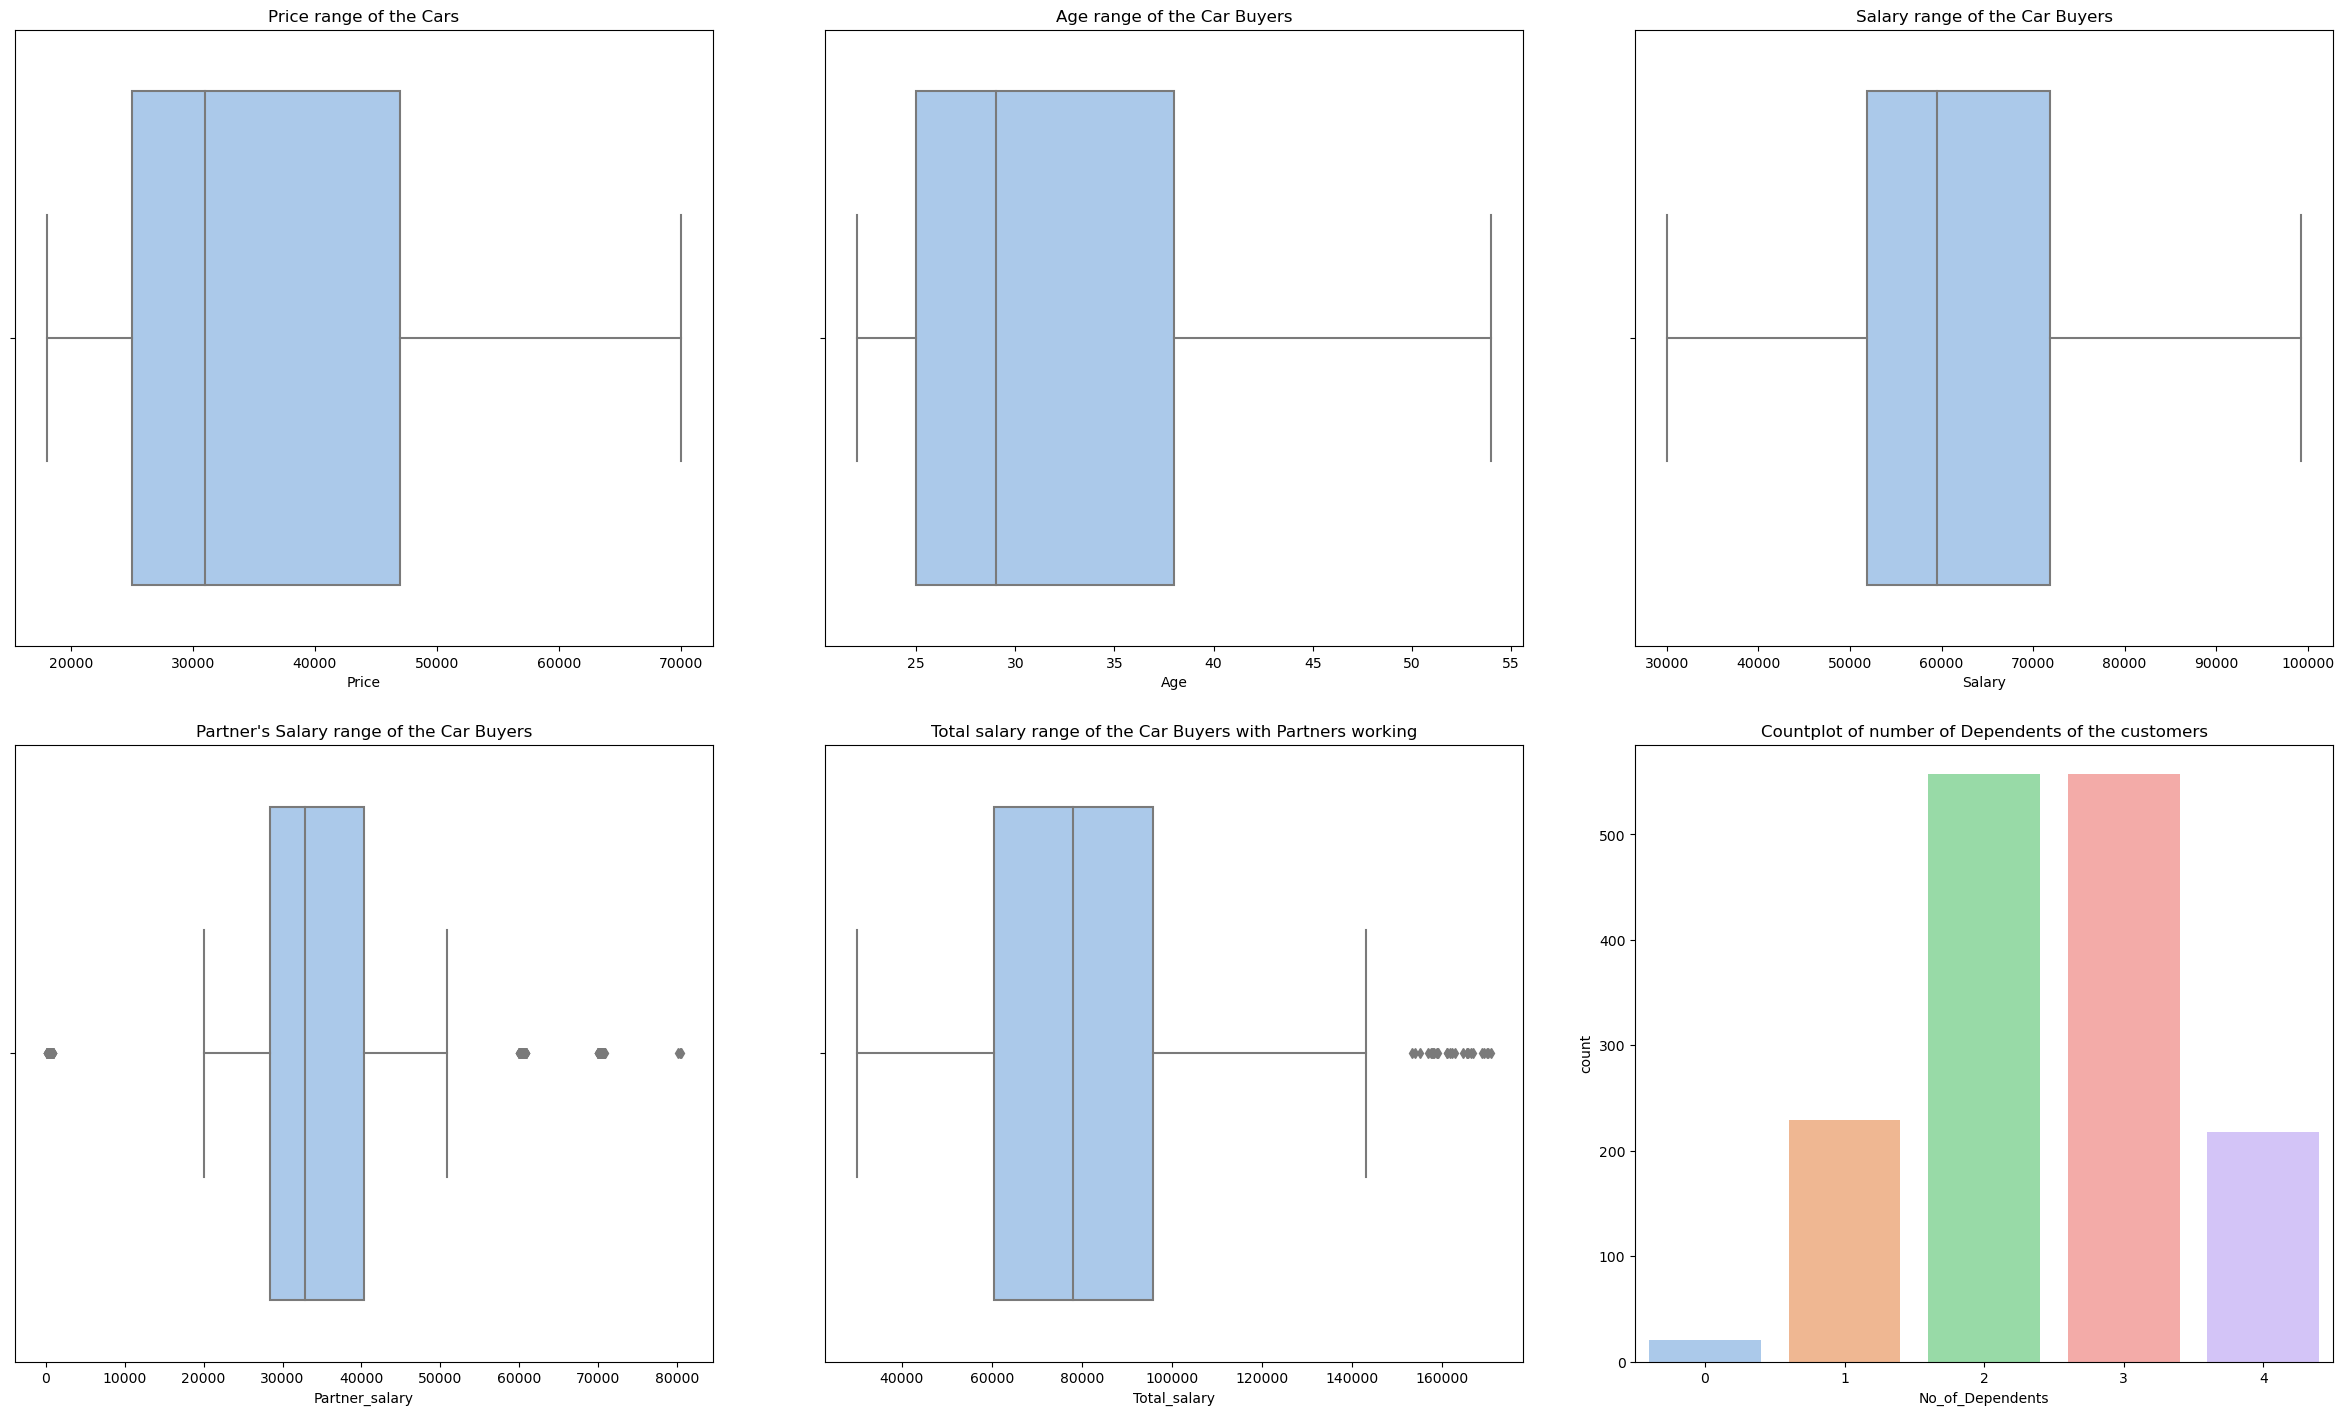

In [45]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(25,15)
fig.tight_layout(pad=5.0)
sns.boxplot(data=df,x='Price',ax=ax[0][0],palette='pastel').set(title='Price range of the Cars')
sns.boxplot(data=df,x='Age',ax=ax[0][1],palette='pastel').set(title='Age range of the Car Buyers')
sns.boxplot(data=df,x='Salary',ax=ax[0][2],palette='pastel').set(title='Salary range of the Car Buyers')
sns.boxplot(data=df[df['Partner_working']=='Yes'],x='Partner_salary',ax=ax[1][0],palette='pastel').set(title="Partner's Salary range of the Car Buyers")
sns.boxplot(data=df,x='Total_salary',ax=ax[1][1],palette='pastel').set(title='Total salary range of the Car Buyers with Partners working')
sns.countplot(data=df,x='No_of_Dependents',ax=ax[1][2],palette='pastel').set(title='Countplot of number of Dependents of the customers')

In [213]:
Q3=df['Total_salary'].quantile(.75)
Q2=df['Total_salary'].quantile(.5)
Q1=df['Total_salary'].quantile(.25)
IQR=Q3-Q1
MAX=Q3+(1.5*IQR)
print("Q3 is {} \nQ1 is {} \nIQR is {} \nMax Total_Salary is {} \n".format(Q3,Q1,IQR,MAX))
print("Outlier Max Salary",df['Total_salary'].max())

Q3 is 95900.0 
Q1 is 60500.0 
IQR is 35400.0 
Max Total_Salary is 149000.0 

Outlier Max Salary 171000


In [47]:
df['Price'].quantile([.25, .5, .75])

0.25    25000.0
0.50    31000.0
0.75    47000.0
Name: Price, dtype: float64

###### Exploring Categorical Variables

[Text(0.5, 1.0, 'Distribution of Car Buyers with Personal_Loan')]

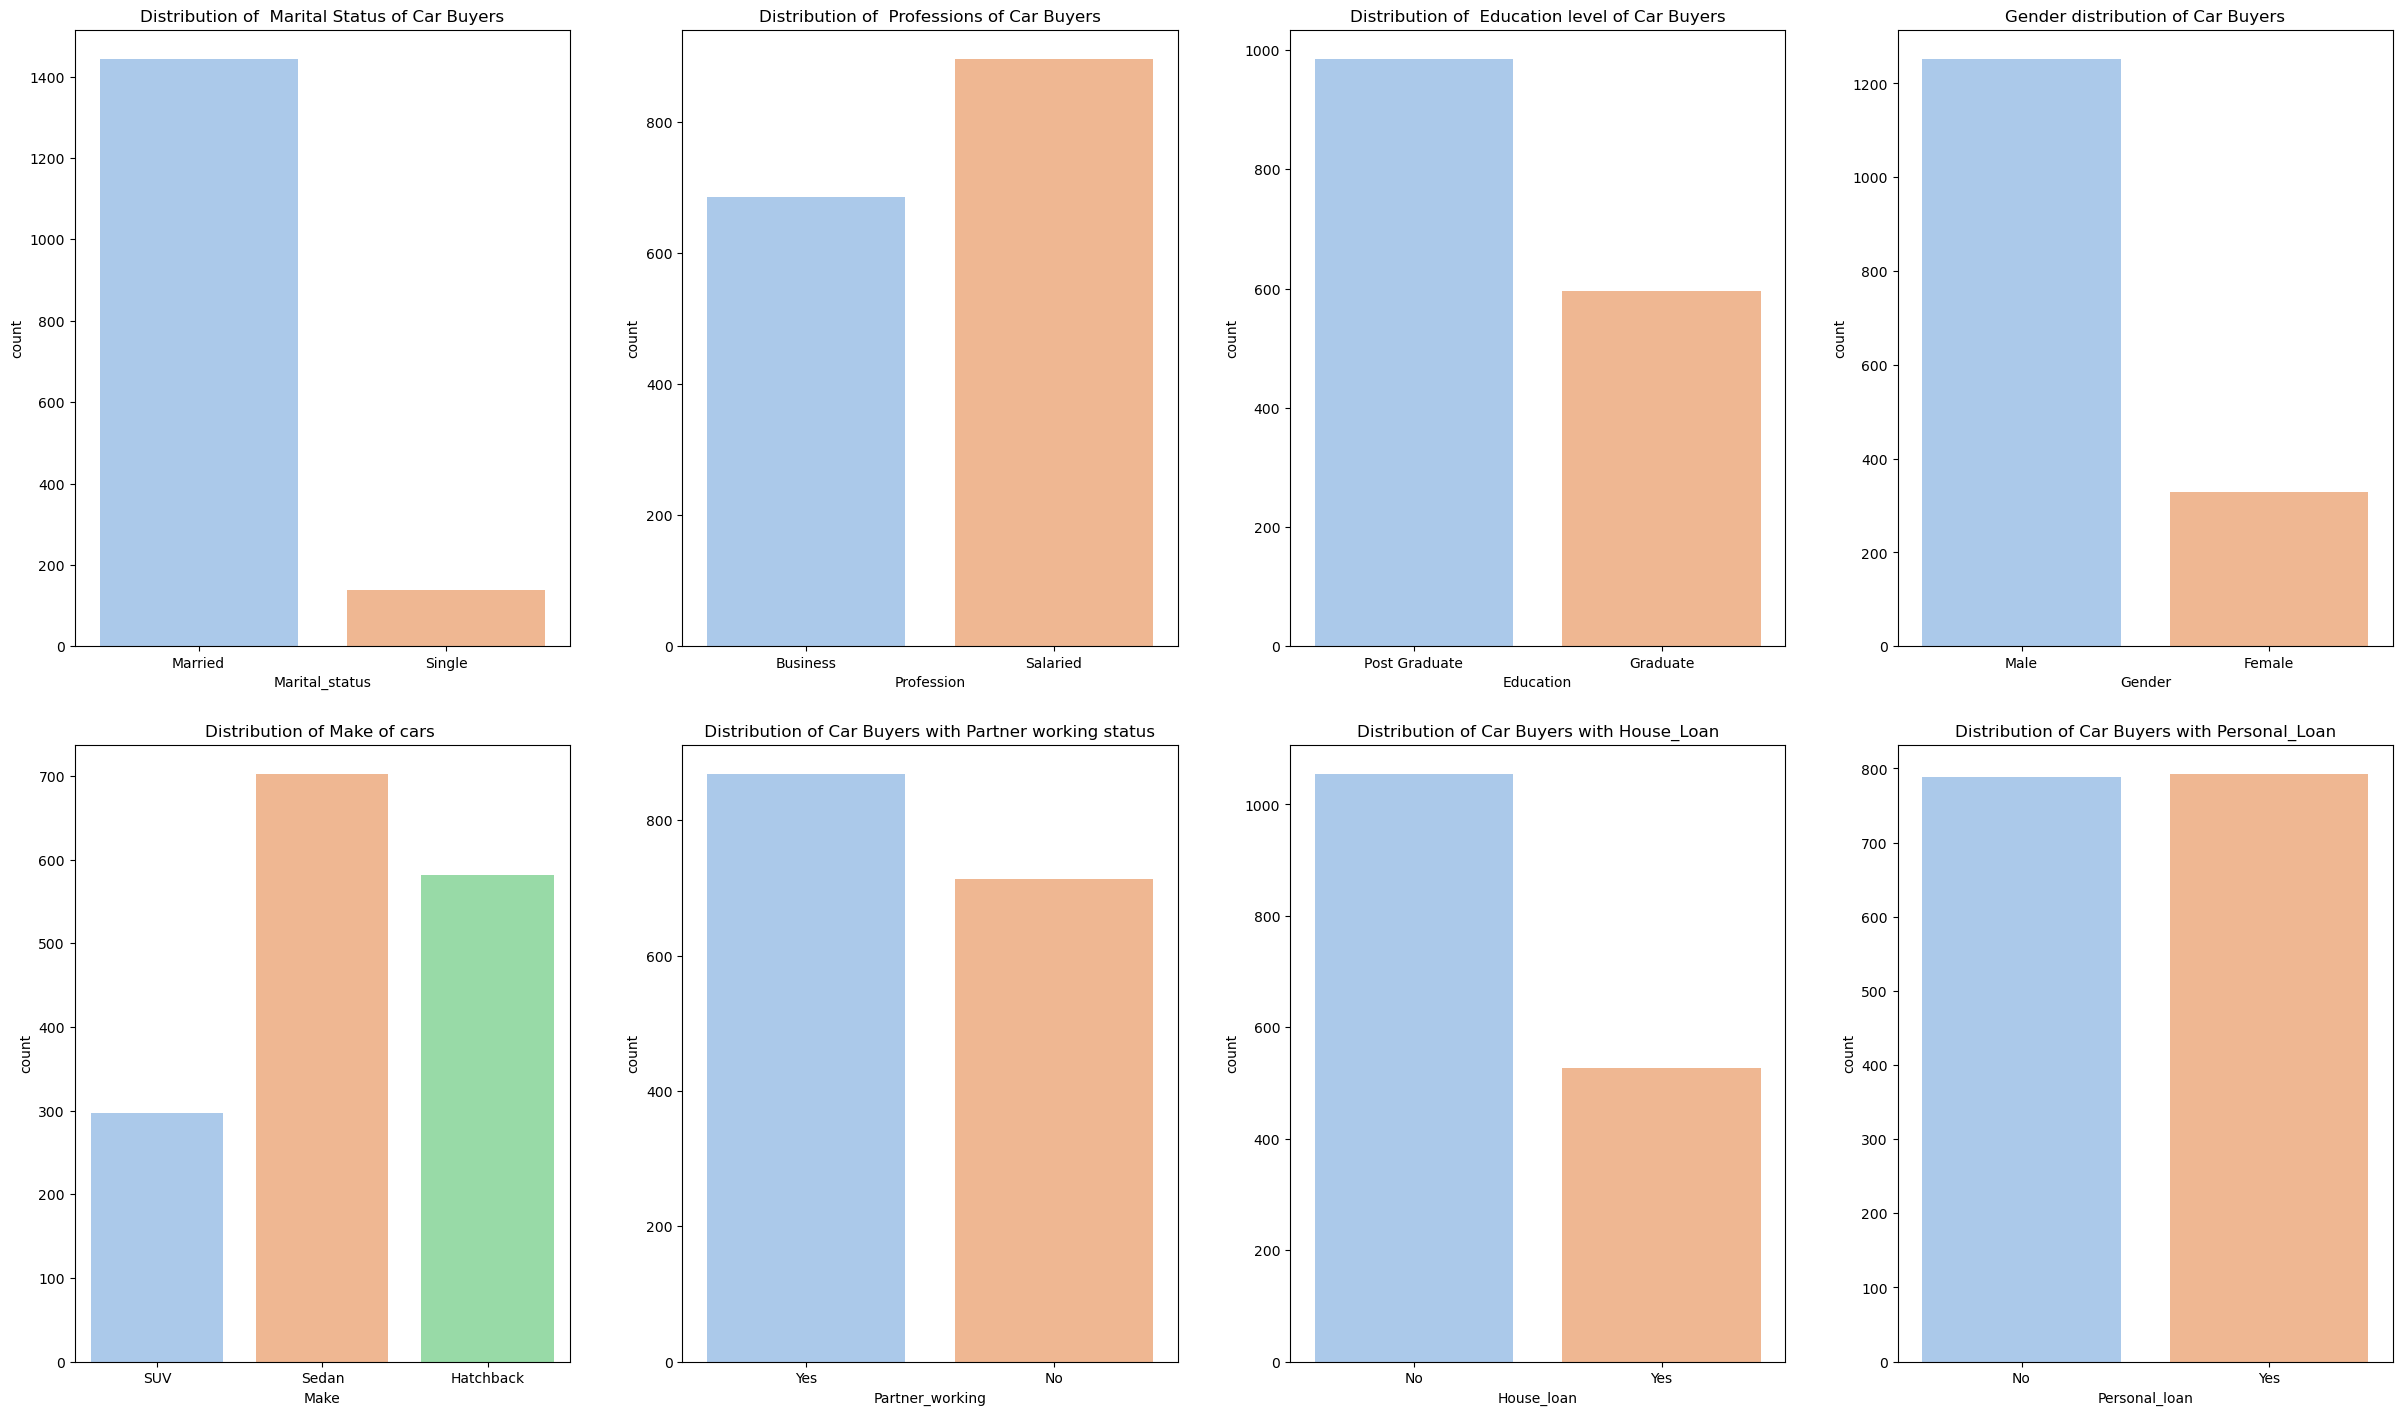

In [49]:
fig, ax = plt.subplots(2,4)
fig.set_size_inches(25,15)
fig.tight_layout(pad=5.0)
sns.countplot(data=df,x='Marital_status',ax=ax[0][0],palette='pastel').set(title='Distribution of  Marital Status of Car Buyers')
sns.countplot(data=df,x='Profession',ax=ax[0][1],palette='pastel').set(title='Distribution of  Professions of Car Buyers')
sns.countplot(data=df,x='Education',ax=ax[0][2],palette='pastel').set(title='Distribution of  Education level of Car Buyers')
sns.countplot(data=df,x='Gender',ax=ax[0][3],palette='pastel').set(title='Gender distribution of Car Buyers')
sns.countplot(data=df,x='Make',ax=ax[1][0],palette='pastel').set(title='Distribution of Make of cars ')
sns.countplot(data=df,x='Partner_working',ax=ax[1][1],palette='pastel').set(title=" Distribution of Car Buyers with Partner working status ")
sns.countplot(data=df,x='House_loan',ax=ax[1][2],palette='pastel').set(title='Distribution of Car Buyers with House_Loan')
sns.countplot(data=df,x='Personal_loan',ax=ax[1][3],palette='pastel').set(title='Distribution of Car Buyers with Personal_Loan')

###### D. Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data. 

In [50]:
object_list=list(df.select_dtypes(include=object).columns)

In [63]:
int_list=list(df.select_dtypes(include=int).columns)

In [65]:
float_set=list(df.select_dtypes(include=float).columns)

###### Bivariate Analysys Between Numerical Variables

<AxesSubplot:>

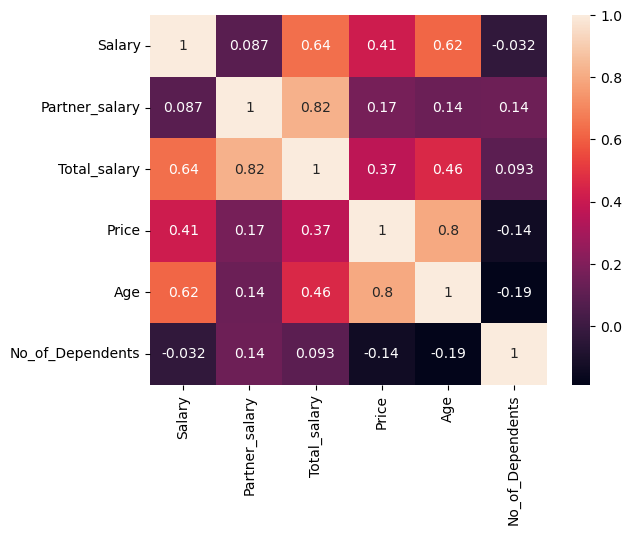

In [68]:
sns.heatmap(df[['Salary', 'Partner_salary', 'Total_salary', 'Price','Age','No_of_Dependents']].corr(),annot=True)

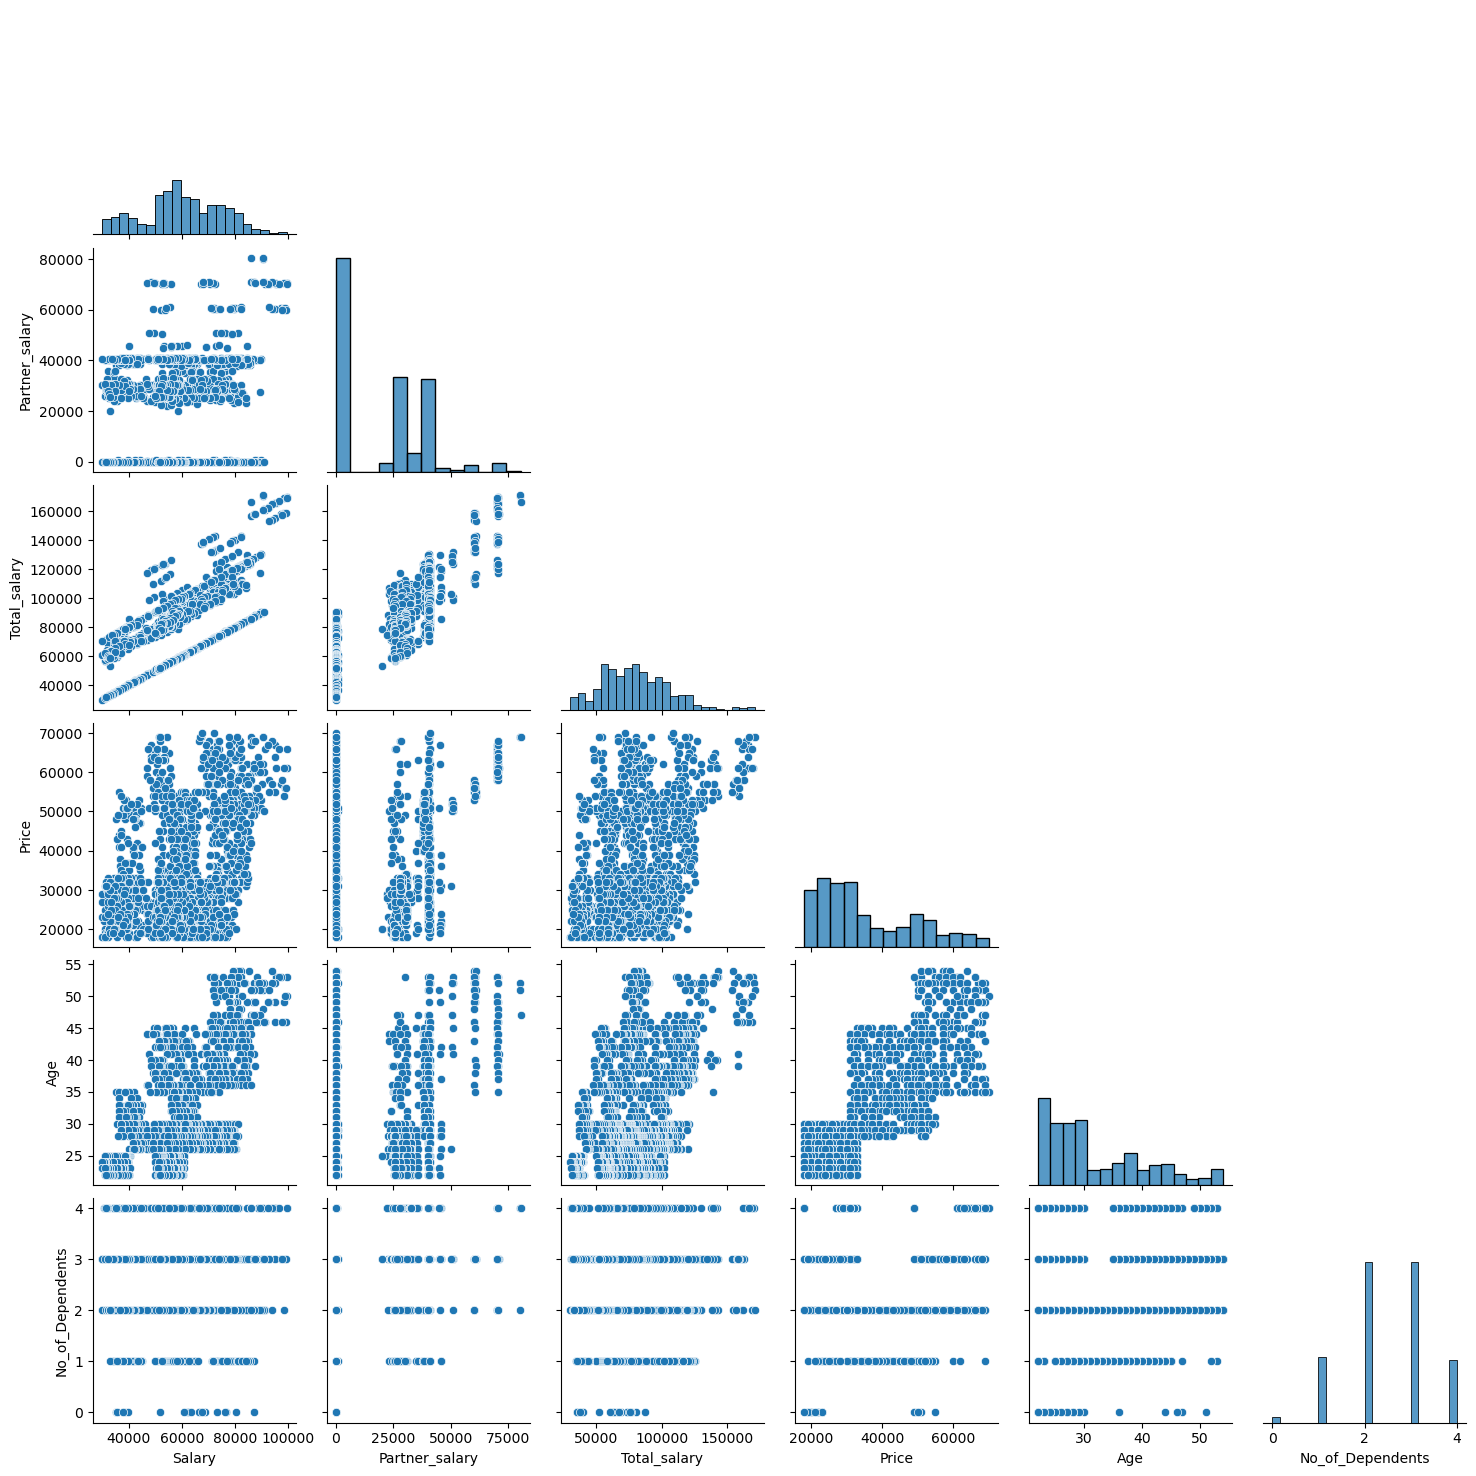

In [69]:
sns.pairplot(data=df[['Salary', 'Partner_salary', 'Total_salary', 'Price','Age','No_of_Dependents']],corner=True)

###### Bivariate Analysis Between Categorical Variables

[Text(0.5, 1.0, 'Distribution of No_of_Dependents Vs Make of Cars')]

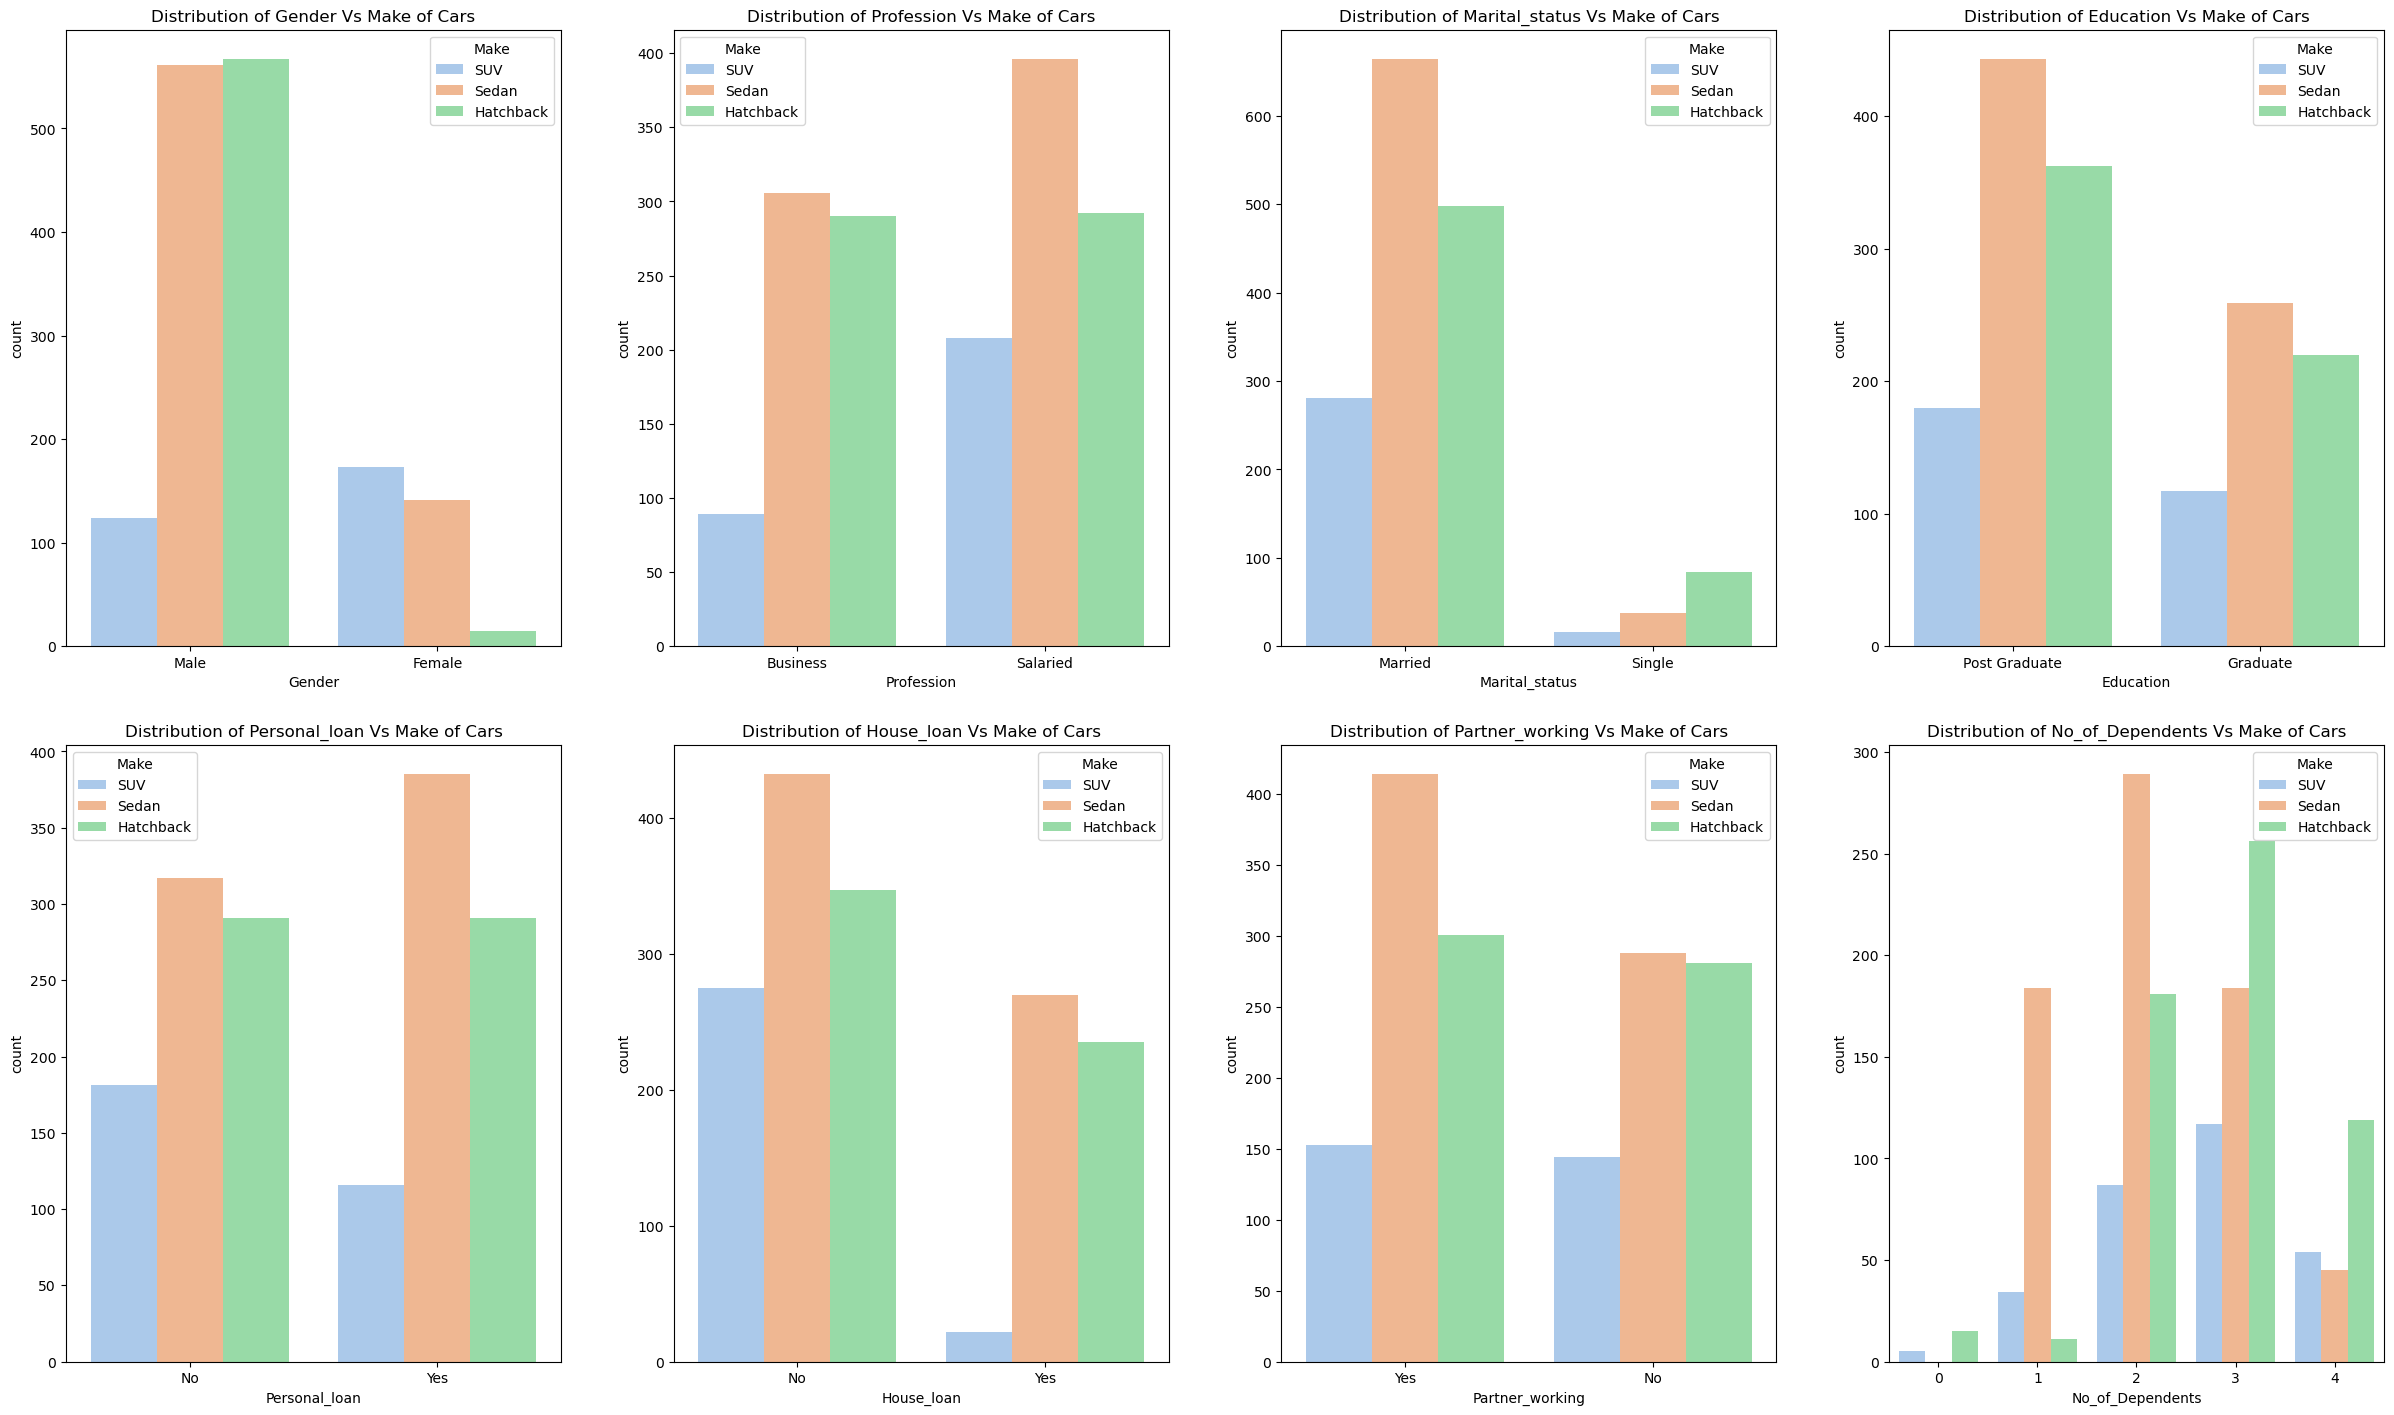

In [70]:
fig, ax = plt.subplots(2,4)
fig.set_size_inches(25,15)
fig.tight_layout(pad=5.0)
sns.countplot(data=df, x="Gender", hue="Make",ax=ax[0][0],palette='pastel').set(title='Distribution of Gender Vs Make of Cars')
sns.countplot(data=df, x="Profession", hue="Make",ax=ax[0][1],palette='pastel').set(title='Distribution of Profession Vs Make of Cars')
sns.countplot(data=df, x="Marital_status", hue="Make",ax=ax[0][2],palette='pastel').set(title='Distribution of Marital_status Vs Make of Cars')
sns.countplot(data=df, x="Education", hue="Make",ax=ax[0][3],palette='pastel').set(title='Distribution of Education Vs Make of Cars')
sns.countplot(data=df, x="Personal_loan", hue="Make",ax=ax[1][0],palette='pastel').set(title='Distribution of Personal_loan Vs Make of Cars')
sns.countplot(data=df, x= "House_loan", hue="Make",ax=ax[1][1],palette='pastel').set(title='Distribution of House_loan Vs Make of Cars')
sns.countplot(data=df, x= "Partner_working", hue="Make",ax=ax[1][2],palette='pastel').set(title='Distribution of Partner_working Vs Make of Cars')
sns.countplot(data=df, x= "No_of_Dependents", hue="Make",ax=ax[1][3],palette='pastel').set(title='Distribution of No_of_Dependents Vs Make of Cars')



In [214]:
df.groupby('Gender')['Make'].value_counts(normalize=True).reset_index(level='Gender')

Gender      Make
Make                       
SUV        Female  0.525836
Sedan      Female  0.428571
Hatchback  Female  0.045593
Hatchback    Male  0.471226
Sedan        Male  0.430359
SUV          Male  0.098415

In [215]:
df.groupby('Marital_status')['Make'].value_counts(normalize=True).reset_index(level='Marital_status')

Marital_status      Make
Make                              
Sedan            Married  0.460152
Hatchback        Married  0.345114
SUV              Married  0.194733
Hatchback         Single  0.608696
Sedan             Single  0.275362
SUV               Single  0.115942

In [216]:
df.groupby('Profession')['Make'].value_counts(normalize=True).reset_index(level='Profession')

Profession      Make
Make                          
Sedan       Business  0.446715
Hatchback   Business  0.423358
SUV         Business  0.129927
Sedan       Salaried  0.441964
Hatchback   Salaried  0.325893
SUV         Salaried  0.232143

In [217]:
df.groupby('Education')['Make'].value_counts(normalize=True).reset_index(level='Education')

Education      Make
Make                              
Sedan           Graduate  0.434564
Hatchback       Graduate  0.369128
SUV             Graduate  0.196309
Sedan      Post Graduate  0.449746
Hatchback  Post Graduate  0.367513
SUV        Post Graduate  0.182741

In [218]:
df.groupby('Gender')['Make'].value_counts(normalize=True).reset_index(level='Gender')

Gender      Make
Make                       
SUV        Female  0.525836
Sedan      Female  0.428571
Hatchback  Female  0.045593
Hatchback    Male  0.471226
Sedan        Male  0.430359
SUV          Male  0.098415

In [219]:
df.groupby('Personal_loan')['Make'].value_counts(normalize=True).reset_index(level='Personal_loan')

Personal_loan      Make
Make                             
Sedan                No  0.401774
Hatchback            No  0.368821
SUV                  No  0.229404
Sedan               Yes  0.486111
Hatchback           Yes  0.367424
SUV                 Yes  0.146465

In [220]:
df.groupby('House_loan')['Make'].value_counts(normalize=True).reset_index(level='House_loan')

House_loan      Make
Make                          
Sedan             No  0.409867
Hatchback         No  0.329222
SUV               No  0.260911
Sedan            Yes  0.512334
Hatchback        Yes  0.445920
SUV              Yes  0.041746

In [221]:
df.groupby('Partner_working')['Make'].value_counts(normalize=True).reset_index(level='Partner_working')

Partner_working      Make
Make                               
Sedan                  No  0.403927
Hatchback              No  0.394109
SUV                    No  0.201964
Sedan                 Yes  0.476959
Hatchback             Yes  0.346774
SUV                   Yes  0.176267

In [222]:
df.groupby('No_of_Dependents')['Make'].value_counts(normalize=True).reset_index(level='No_of_Dependents')

No_of_Dependents      Make
Make                                 
Hatchback                 0  0.750000
SUV                       0  0.250000
Sedan                     1  0.803493
SUV                       1  0.148472
Hatchback                 1  0.048035
Sedan                     2  0.518851
Hatchback                 2  0.324955
SUV                       2  0.156194
Hatchback                 3  0.459605
Sedan                     3  0.330341
SUV                       3  0.210054
Hatchback                 4  0.545872
SUV                       4  0.247706
Sedan                     4  0.206422

###### Bivariate Analysis Between Categorical and Numerical Variables

[Text(0.5, 1.0, 'Total_salary Vs Make')]

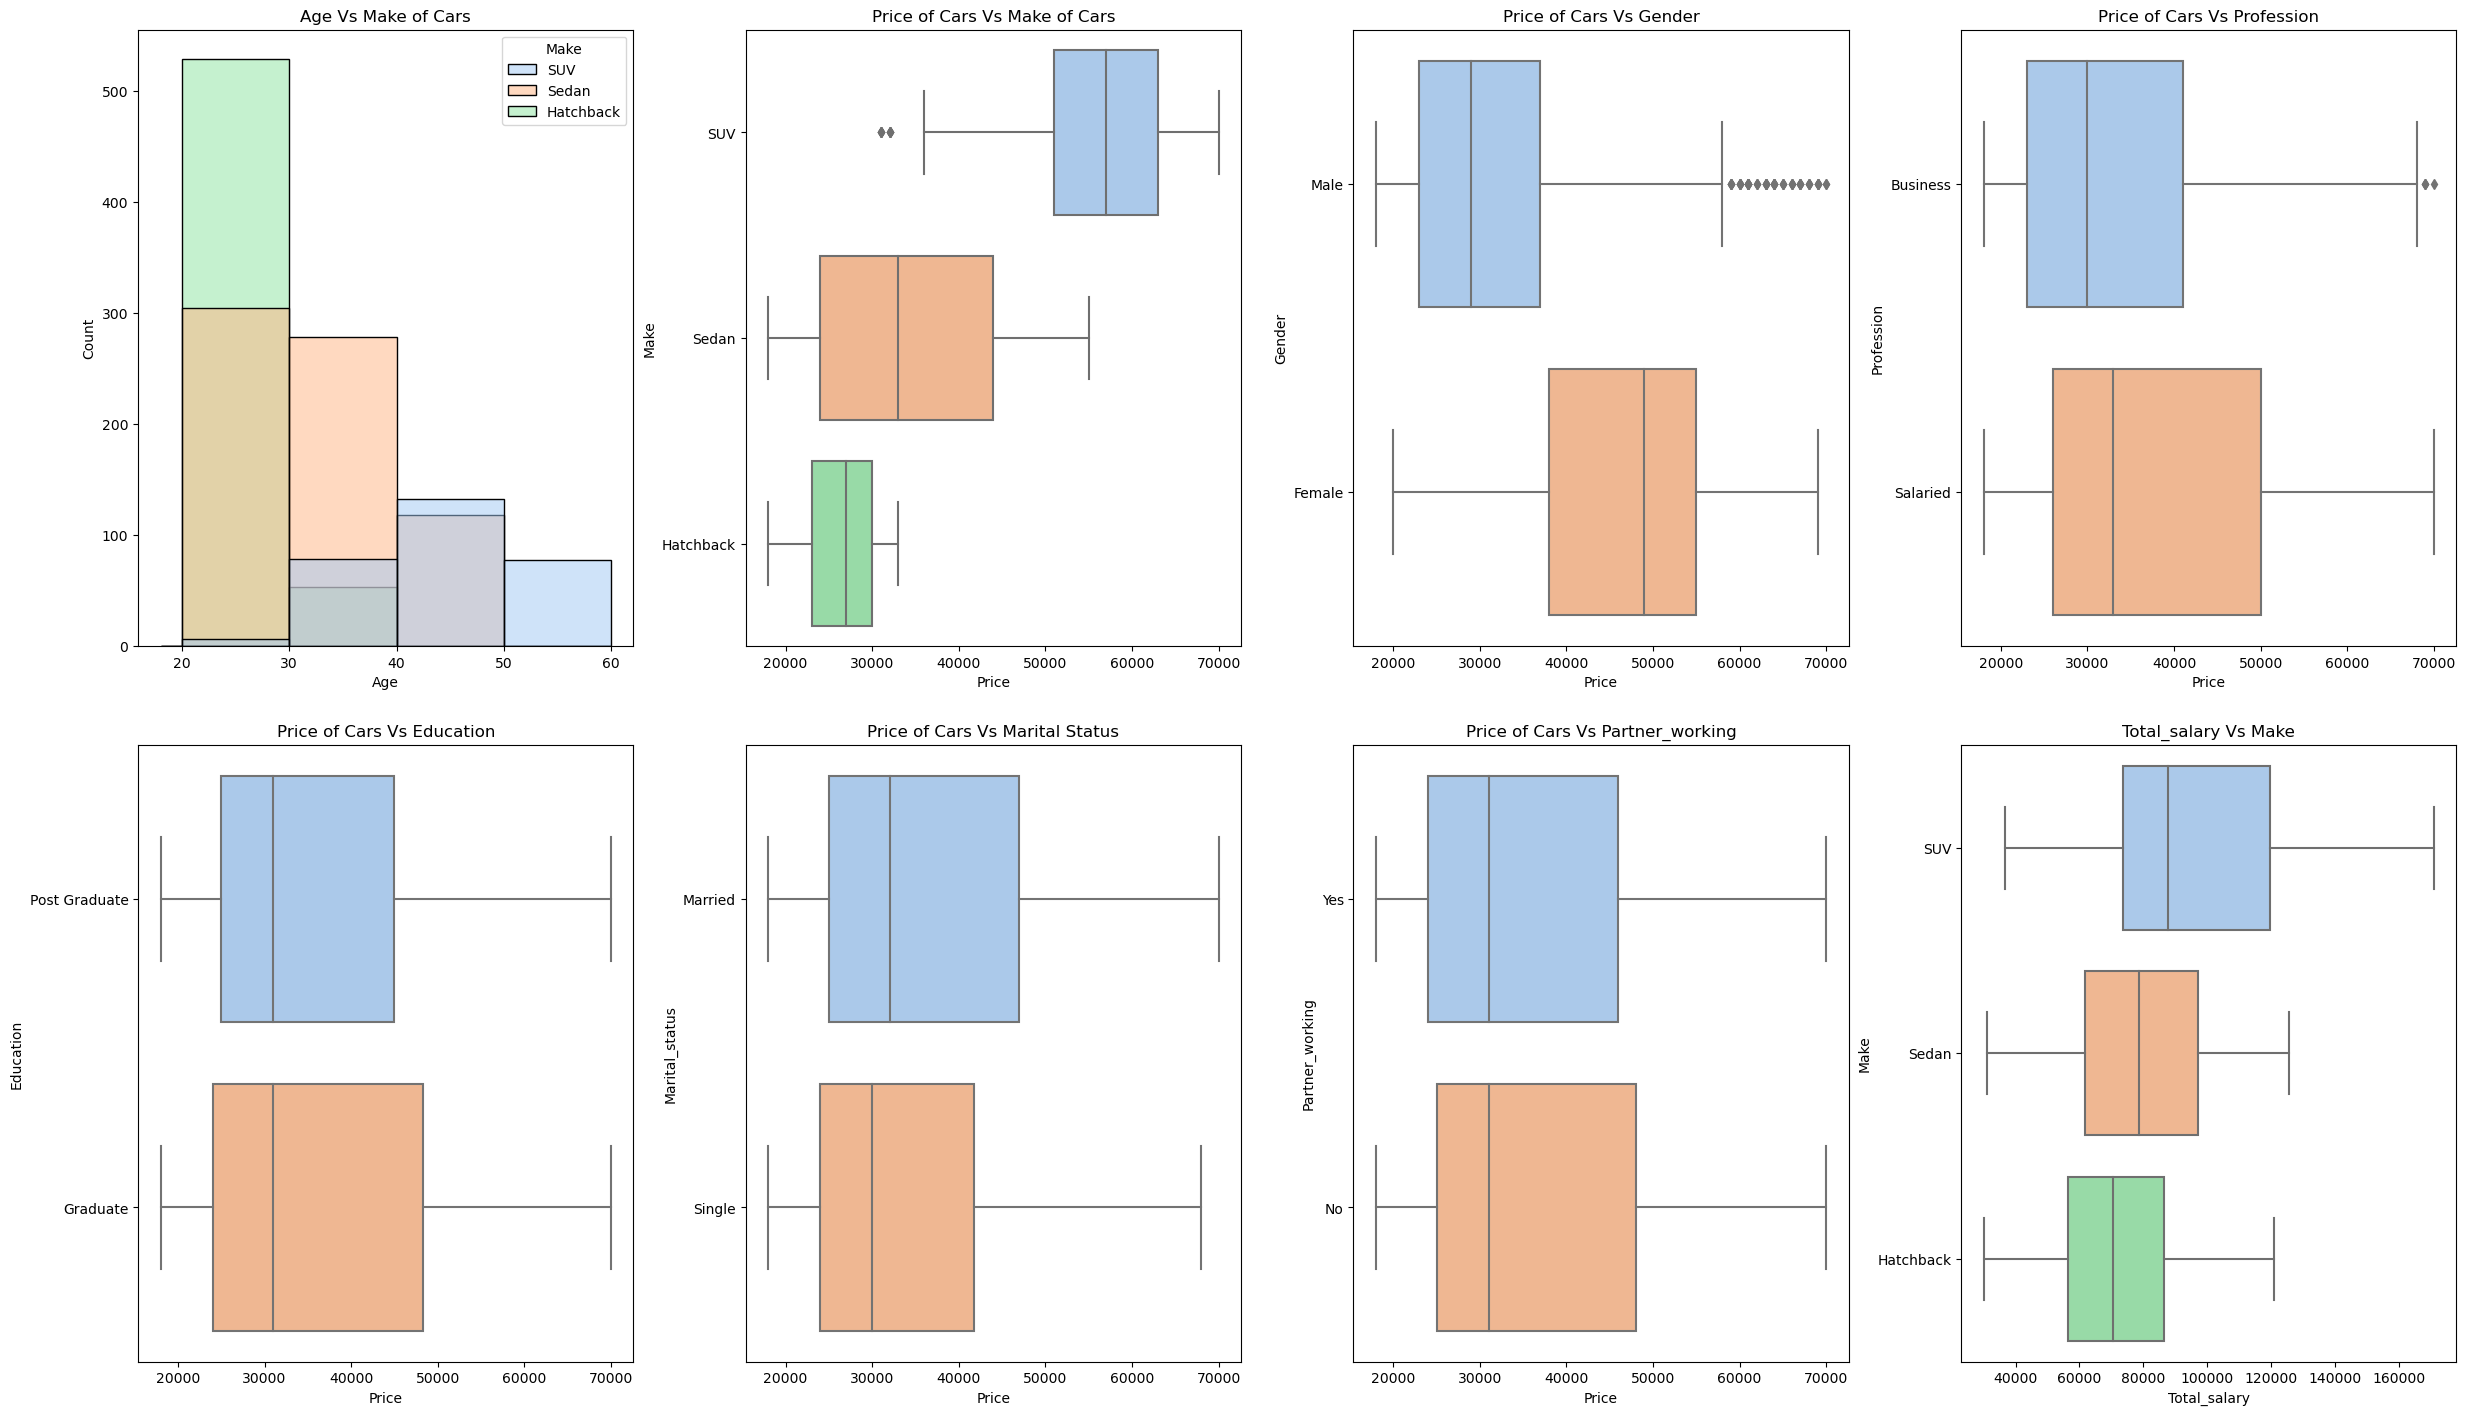

In [71]:
fig, ax = plt.subplots(2,4)
fig.set_size_inches(25,15)
fig.tight_layout(pad=5.0)
sns.histplot(data=df, x= "Age",hue="Make",bins=[18,20,30,40,50,60],ax=ax[0][0],palette='pastel').set(title='Age Vs Make of Cars')
sns.boxplot(data=df, x= "Price", y="Make",ax=ax[0][1],palette='pastel').set(title='Price of Cars Vs Make of Cars')
sns.boxplot(data=df, x= "Price", y="Gender",ax=ax[0][2],palette='pastel').set(title='Price of Cars Vs Gender')
sns.boxplot(data=df, x= "Price", y="Profession",ax=ax[0][3],palette='pastel').set(title='Price of Cars Vs Profession')
sns.boxplot(data=df, x= "Price", y="Education",ax=ax[1][0],palette='pastel').set(title='Price of Cars Vs Education')
sns.boxplot(data=df, x= "Price", y="Marital_status",ax=ax[1][1],palette='pastel').set(title='Price of Cars Vs Marital Status')
sns.boxplot(data=df, x= "Price", y="Partner_working",ax=ax[1][2],palette='pastel').set(title='Price of Cars Vs Partner_working')
sns.boxplot(data=df, x= "Total_salary", y="Make",ax=ax[1][3],palette='pastel').set(title='Total_salary Vs Make')

In [229]:
df.groupby('Gender')['Price'].describe()

count          mean           std      min      25%      50%  \
Gender                                                                  
Female   329.0  47705.167173  11244.836378  20000.0  38000.0  49000.0   
Male    1199.0  32817.347790  12299.239195  18000.0  24000.0  29000.0   

            75%      max  
Gender                    
Female  55000.0  69000.0  
Male    37500.0  70000.0

In [230]:
df.groupby('Profession')['Price'].describe()

count          mean           std      min      25%      50%  \
Profession                                                                 
Business    685.0  33353.284672  12911.331955  18000.0  23000.0  30000.0   
Salaried    896.0  37313.616071  13926.016563  18000.0  26000.0  33000.0   

                75%      max  
Profession                    
Business    41000.0  70000.0  
Salaried    50000.0  70000.0

In [231]:
df.groupby('Education')['Price'].describe()

count          mean           std      min      25%      50%  \
Education                                                                     
Graduate       596.0  35907.718121  13997.594301  18000.0  24000.0  31000.0   
Post Graduate  985.0  35410.152284  13412.328181  18000.0  25000.0  31000.0   

                   75%      max  
Education                        
Graduate       48250.0  70000.0  
Post Graduate  45000.0  70000.0

In [232]:
df.groupby('Partner_working')['Price'].describe()

count          mean           std      min      25%      50%  \
Partner_working                                                                 
No               713.0  36000.000000  13817.734086  18000.0  25000.0  31000.0   
Yes              868.0  35267.281106  13479.532555  18000.0  24000.0  31000.0   

                     75%      max  
Partner_working                    
No               48000.0  70000.0  
Yes              46000.0  70000.0

In [233]:
df.groupby('Make')['Price'].describe()

count          mean           std      min      25%      50%  \
Make                                                                      
Hatchback  582.0  26474.226804   4290.467640  18000.0  23000.0  27000.0   
SUV        297.0  55824.915825   9218.242714  31000.0  51000.0  57000.0   
Sedan      702.0  34603.988604  11152.164304  18000.0  24000.0  33000.0   

               75%      max  
Make                         
Hatchback  30000.0  33000.0  
SUV        63000.0  70000.0  
Sedan      44000.0  55000.0

In [235]:
df.groupby('Marital_status')['Price'].describe()

count         mean           std      min      25%      50%  \
Marital_status                                                                 
Married         1443.0  35800.41580  13723.202856  18000.0  25000.0  32000.0   
Single           138.0  33478.26087  12509.393487  18000.0  24000.0  30000.0   

                    75%      max  
Marital_status                    
Married         47000.0  70000.0  
Single          41750.0  68000.0

In [236]:
df.groupby('Make')['Total_salary'].describe()

count          mean           std      min      25%      50%  \
Make                                                                      
Hatchback  582.0  71018.041237  21017.605953  30000.0  56400.0  70450.0   
SUV        297.0  96591.582492  32140.509137  36800.0  73700.0  87600.0   
Sedan      702.0  79584.757835  22025.133708  31100.0  61650.0  78750.0   

                75%       max  
Make                           
Hatchback   86375.0  121000.0  
SUV        119600.0  171000.0  
Sedan       97175.0  125500.0

###### E. Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.

E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”

E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.



<AxesSubplot:xlabel='Make', ylabel='count'>

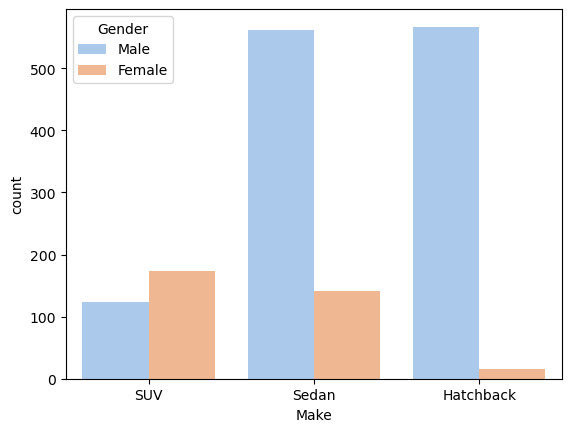

In [80]:
sns.countplot(data=df,x='Make',hue='Gender',palette='pastel')

In [81]:
df.groupby('Gender')['Make'].value_counts(normalize=True).reset_index(level='Gender')

Gender      Make
Make                       
SUV        Female  0.525836
Sedan      Female  0.428571
Hatchback  Female  0.045593
Hatchback    Male  0.452875
Sedan        Male  0.448083
SUV          Male  0.099042

<AxesSubplot:xlabel='Make', ylabel='count'>

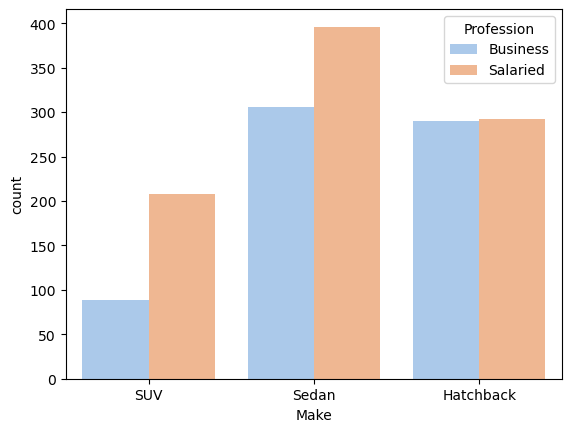

In [82]:
sns.countplot(data=df,x='Make',hue='Profession',palette='pastel')

In [83]:
df.groupby('Profession')['Make'].value_counts(normalize=True).reset_index(level='Profession')

Profession      Make
Make                          
Sedan       Business  0.446715
Hatchback   Business  0.423358
SUV         Business  0.129927
Sedan       Salaried  0.441964
Hatchback   Salaried  0.325893
SUV         Salaried  0.232143

<AxesSubplot:xlabel='Make', ylabel='count'>

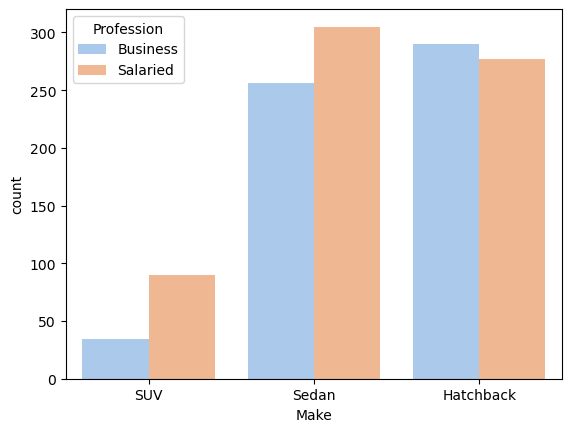

In [84]:
sns.countplot(data=df[df['Gender']=='Male'],x='Make',hue='Profession',palette='pastel')

In [85]:
df[df['Gender']=='Male'].groupby('Profession')['Make'].value_counts()

Profession  Make     
Business    Hatchback    290
            Sedan        256
            SUV           34
Salaried    Sedan        305
            Hatchback    277
            SUV           90
Name: Make, dtype: int64

###### F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.

Give justification along with presenting metrics/charts used for arriving at the conclusions.

F1) Gender

F2) Personal_loan



<AxesSubplot:xlabel='Price', ylabel='Gender'>

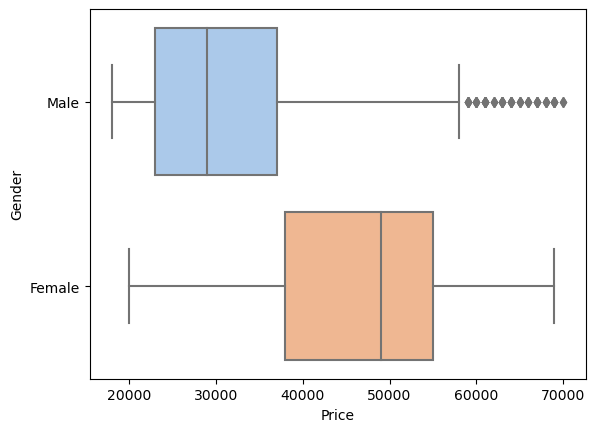

In [86]:
sns.boxplot(data=df,y='Gender',x='Price',palette='pastel')

<AxesSubplot:xlabel='Gender', ylabel='Price'>

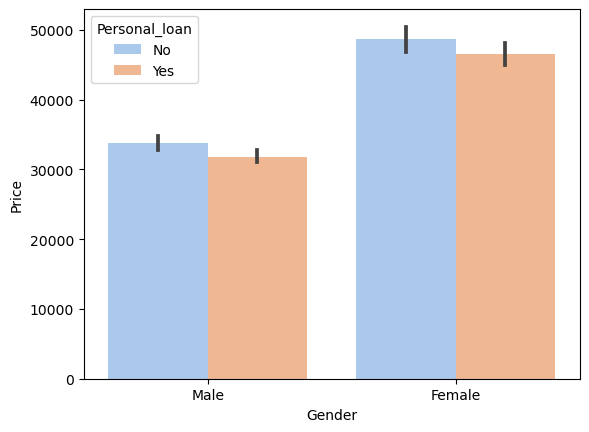

In [241]:
sns.barplot(data=df,x='Gender',y='Price',hue='Personal_loan',palette='pastel')

In [242]:
df.groupby(['Gender','Personal_loan'])['Price'].describe()

count          mean           std      min      25%  \
Gender Personal_loan                                                        
Female No             180.0  48677.777778  12241.360221  20000.0  37750.0   
       Yes            149.0  46530.201342   9821.072936  27000.0  39000.0   
Male   No             580.0  33856.896552  13153.085784  18000.0  24000.0   
       Yes            619.0  31843.295638  11366.204924  18000.0  23000.0   

                          50%      75%      max  
Gender Personal_loan                             
Female No             50000.0  58000.0  69000.0  
       Yes            47000.0  52000.0  69000.0  
Male   No             30000.0  40000.0  70000.0  
       Yes            29000.0  36000.0  70000.0

In [88]:
MEAN=round(df[df['Gender']=='Male']['Price'].mean(),2)
Q3=df[df['Gender']=='Male']['Price'].quantile(.75)
Q2=df[df['Gender']=='Male']['Price'].quantile(.50)
Q1=df[df['Gender']=='Male']['Price'].quantile(.25)
IQR=Q3-Q1
MIN=df[df['Gender']=='Male']['Price'].min()
MAX=Q3+(1.5*IQR)
OUTLIER_MAX=df[df['Gender']=='Male']['Price'].max()
print("Males \nQ3 is {} \nQ2 is {} \nQ1 is {} \nMIN is {} \nMax  is {} \nOutlierMax  is {} \nMean  is {} \n".format(Q3,Q2,Q1,MIN,MAX,OUTLIER_MAX,MEAN))
MEAN=round(df[df['Gender']=='Female']['Price'].mean(),2)
Q3=df[df['Gender']=='Female']['Price'].quantile(.75)
Q2=df[df['Gender']=='Female']['Price'].quantile(.50)
Q1=df[df['Gender']=='Female']['Price'].quantile(.25)
MIN=df[df['Gender']=='Female']['Price'].min()
MAX=df[df['Gender']=='Female']['Price'].max()
print("Females \nQ3 is {} \nQ2 is {} \nQ1 is {} \nMIN is {} \nMax  is {} \nOutlierMax  is {} \nMean  is {} \n".format(Q3,Q2,Q1,MIN,MAX,OUTLIER_MAX,MEAN))

Males 
Q3 is 37000.0 
Q2 is 29000.0 
Q1 is 23000.0 
MIN is 18000.0 
Max  is 58000.0 
OutlierMax  is 70000.0 
Mean  is 32416.13 

Females 
Q3 is 55000.0 
Q2 is 49000.0 
Q1 is 38000.0 
MIN is 20000.0 
Max  is 69000.0 
OutlierMax  is 70000.0 
Mean  is 47705.17 



In [89]:
df[df['Gender']=='Female']['Price'].quantile(.95)

66000.0

<AxesSubplot:xlabel='Price', ylabel='Personal_loan'>

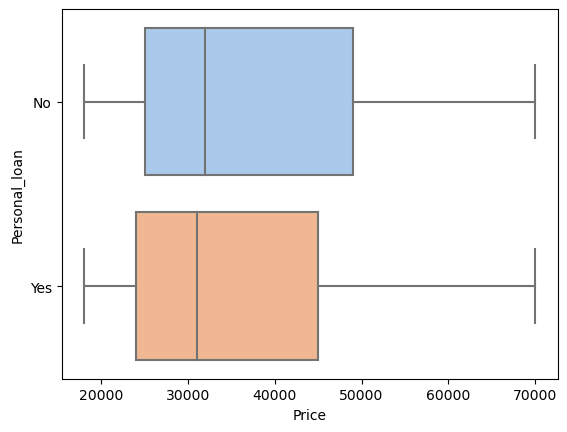

In [90]:
sns.boxplot(data=df,y='Personal_loan',x='Price',palette='pastel')

In [91]:
MEAN=round(df[df['Personal_loan']=='Yes']['Price'].mean(),2)
Q3=df[df['Personal_loan']=='Yes']['Price'].quantile(.75)
Q2=df[df['Personal_loan']=='Yes']['Price'].quantile(.50)
Q1=df[df['Personal_loan']=='Yes']['Price'].quantile(.25)
MIN=df[df['Personal_loan']=='Yes']['Price'].min()
MAX=df[df['Personal_loan']=='Yes']['Price'].max()
print("Personal Loan Yes \nQ3 is {} \nQ2 is {} \nQ1 is {} \nMIN is {} \nMax  is {}\nMean  is {} \n".format(Q3,Q2,Q1,MIN,MAX,MEAN))
MEAN=round(df[df['Personal_loan']=='No']['Price'].mean(),2)
Q3=df[df['Personal_loan']=='No']['Price'].quantile(.75)
Q2=df[df['Personal_loan']=='No']['Price'].quantile(.50)
Q1=df[df['Personal_loan']=='No']['Price'].quantile(.25)
MIN=df[df['Personal_loan']=='No']['Price'].min()
MAX=df[df['Personal_loan']=='No']['Price'].max()
print("Personal Loan No \nQ3 is {} \nQ2 is {} \nQ1 is {} \nMIN is {} \nMax  is {}\nMean  is {} \n".format(Q3,Q2,Q1,MIN,MAX,MEAN))

Personal Loan Yes 
Q3 is 45000.0 
Q2 is 31000.0 
Q1 is 24000.0 
MIN is 18000.0 
Max  is 70000.0
Mean  is 34457.07 

Personal Loan No 
Q3 is 49000.0 
Q2 is 32000.0 
Q1 is 25000.0 
MIN is 18000.0 
Max  is 70000.0
Mean  is 36742.71 



###### G. From the current data set comment if having a working partner leads to the purchase of a higher-priced car.


 

Text(0.5, 1.0, 'Partner Working Vs Price of Cars')

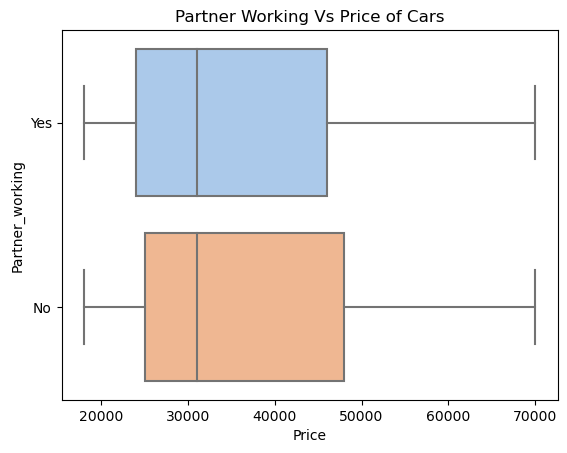

In [92]:
sns.boxplot(data=df,y='Partner_working',x='Price',palette='pastel').set_title("Partner Working Vs Price of Cars")

In [93]:
MEAN=round(df[df['Partner_working']=='Yes']['Price'].mean(),2)
Q3=df[df['Partner_working']=='Yes']['Price'].quantile(.75)
Q2=df[df['Partner_working']=='Yes']['Price'].quantile(.50)
Q1=df[df['Partner_working']=='Yes']['Price'].quantile(.25)
MIN=df[df['Partner_working']=='Yes']['Price'].min()
MAX=df[df['Partner_working']=='Yes']['Price'].max()
print("Partner working Yes \nQ3 is {} \nQ2 is {} \nQ1 is {} \nMIN is {} \nMax  is {}\nMean  is {} \n".format(Q3,Q2,Q1,MIN,MAX,MEAN))
MEAN=round(df[df['Partner_working']=='No']['Price'].mean(),2)
Q3=df[df['Partner_working']=='No']['Price'].quantile(.75)
Q2=df[df['Partner_working']=='No']['Price'].quantile(.50)
Q1=df[df['Partner_working']=='No']['Price'].quantile(.25)
MIN=df[df['Partner_working']=='No']['Price'].min()
MAX=df[df['Partner_working']=='No']['Price'].max()
print("Partner working No \nQ3 is {} \nQ2 is {} \nQ1 is {} \nMIN is {} \nMax  is {}\nMean  is {} \n".format(Q3,Q2,Q1,MIN,MAX,MEAN))

Partner working Yes 
Q3 is 46000.0 
Q2 is 31000.0 
Q1 is 24000.0 
MIN is 18000.0 
Max  is 70000.0
Mean  is 35267.28 

Partner working No 
Q3 is 48000.0 
Q2 is 31000.0 
Q1 is 25000.0 
MIN is 18000.0 
Max  is 70000.0
Mean  is 36000.0 



###### H. The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.


[Text(0.5, 1.0, 'Distribution of Gender Vs Make of Cars for Single people')]

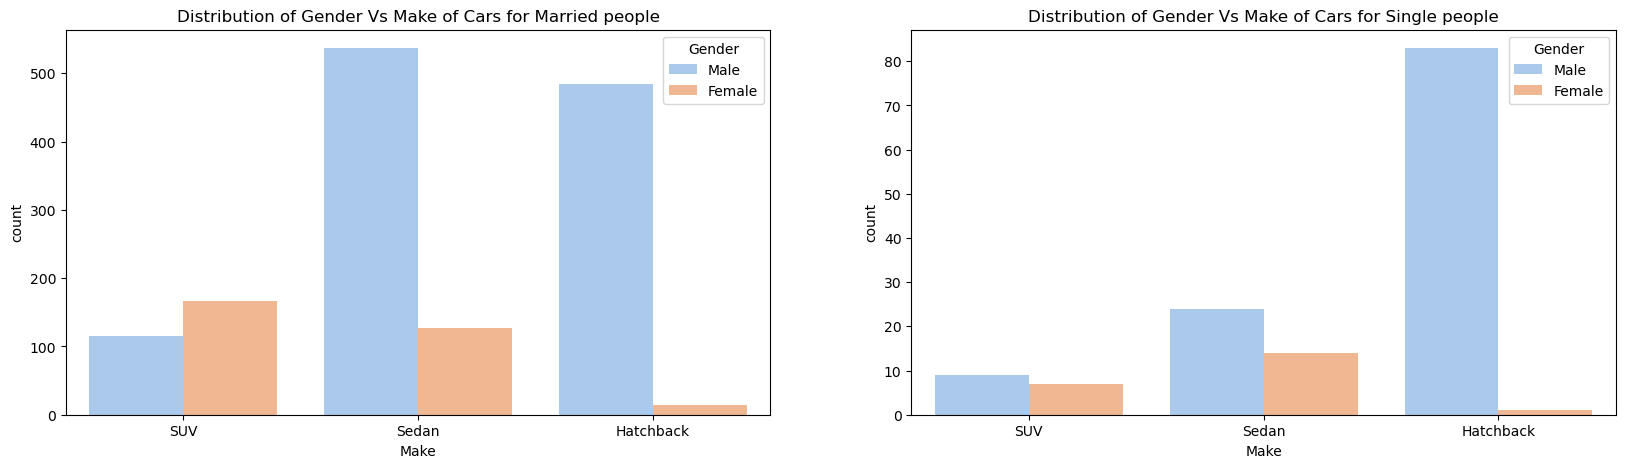

In [94]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,5)
sns.countplot(data=df[df['Marital_status']=='Married'],x='Make',hue='Gender',ax=ax[0],palette='pastel').set(title='Distribution of Gender Vs Make of Cars for Married people')
sns.countplot(data=df[df['Marital_status']=='Single'],x='Make',hue='Gender',ax=ax[1],palette='pastel').set(title='Distribution of Gender Vs Make of Cars for Single people')


[Text(0.5, 1.0, 'Distribution of Gender Vs Price for Single Buyers')]

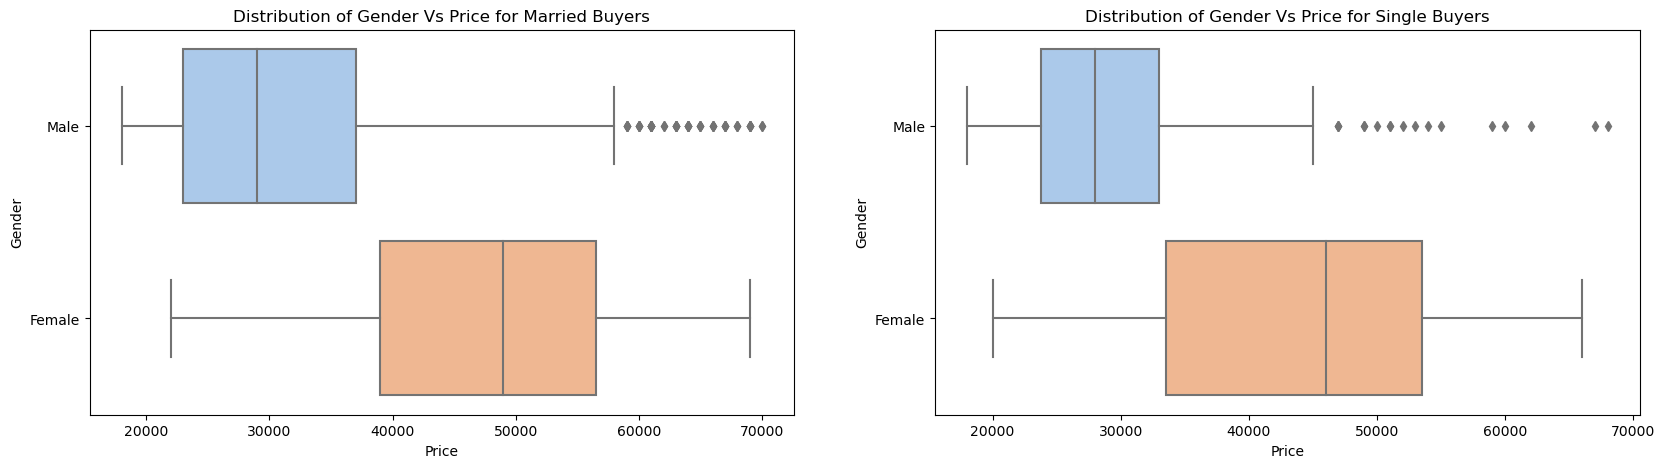

In [95]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,5)
sns.boxplot(data=df[df['Marital_status']=='Married'],y='Gender',x='Price',ax=ax[0],palette='pastel').set(title='Distribution of Gender Vs Price for Married Buyers')
sns.boxplot(data=df[df['Marital_status']=='Single'],y='Gender',x='Price',ax=ax[1],palette='pastel').set(title='Distribution of Gender Vs Price for Single Buyers')

In [277]:
df.groupby(['Gender','Marital_status'])['Make'].value_counts().reset_index(level=['Gender','Marital_status'])

Gender Marital_status  Make
Make                                  
SUV        Female        Married   166
Sedan      Female        Married   127
Hatchback  Female        Married    14
Sedan      Female         Single    14
SUV        Female         Single     7
Hatchback  Female         Single     1
Sedan        Male        Married   493
Hatchback    Male        Married   484
SUV          Male        Married   111
Hatchback    Male         Single    81
Sedan        Male         Single    23
SUV          Male         Single     7

In [98]:
df[(df['Marital_status']=='Married')& (df['Gender']=='Male')]['Price'].describe()

count     1136.000000
mean     32525.528169
std      12464.478505
min      18000.000000
25%      23000.000000
50%      29000.000000
75%      37000.000000
max      70000.000000
Name: Price, dtype: float64

In [99]:
Q3=df[(df['Marital_status']=='Married')& (df['Gender']=='Male')]['Price'].quantile(.75)
Q2=df[(df['Marital_status']=='Married')& (df['Gender']=='Male')]['Price'].quantile(.50)
Q1=df[(df['Marital_status']=='Married')& (df['Gender']=='Male')]['Price'].quantile(.25)
IQR=Q3-Q1
MIN=df[(df['Marital_status']=='Married')& (df['Gender']=='Male')]['Price'].min()
MAX=Q3+(1.5*IQR)
OUTLIER_MAX=df[(df['Marital_status']=='Married')& (df['Gender']=='Male')]['Price'].max()
print("MIN IS is {}\nMAX is {} \nOUTLIER MAX is {}".format(MIN,MAX,OUTLIER_MAX))

MIN IS is 18000.0
MAX is 58000.0 
OUTLIER MAX is 70000.0


In [100]:
df[(df['Marital_status']=='Married')& (df['Gender']=='Female')]['Price'].describe()

count      307.000000
mean     47918.566775
std      11138.311111
min      22000.000000
25%      39000.000000
50%      49000.000000
75%      56500.000000
max      69000.000000
Name: Price, dtype: float64

In [101]:
df[(df['Marital_status']=='Single')& (df['Gender']=='Male')]['Price'].describe()


count      116.000000
mean     31344.827586
std      11353.684289
min      18000.000000
25%      23750.000000
50%      28000.000000
75%      33000.000000
max      68000.000000
Name: Price, dtype: float64

In [102]:
Q3=df[(df['Marital_status']=='Single')& (df['Gender']=='Male')]['Price'].quantile(.75)
Q2=df[(df['Marital_status']=='Single')& (df['Gender']=='Male')]['Price'].quantile(.50)
Q1=df[(df['Marital_status']=='Single')& (df['Gender']=='Male')]['Price'].quantile(.25)
IQR=Q3-Q1
MIN=df[(df['Marital_status']=='Single')& (df['Gender']=='Male')]['Price'].min()
MAX=Q3+(1.5*IQR)
OUTLIER_MAX=df[(df['Marital_status']=='Single')& (df['Gender']=='Male')]['Price'].max()
print("MIN IS is {}\nMAX is {} \nOUTLIER MAX is {}".format(MIN,MAX,OUTLIER_MAX))

MIN IS is 18000.0
MAX is 46875.0 
OUTLIER MAX is 68000.0


In [103]:
df[(df['Marital_status']=='Single')& (df['Gender']=='Female')]['Price'].describe()

count       22.000000
mean     44727.272727
std      12540.151963
min      20000.000000
25%      33500.000000
50%      46000.000000
75%      53500.000000
max      66000.000000
Name: Price, dtype: float64

# Problem2

###### GODIGT Bank also has a set of customers who were given credit cards based on risk policy and customer category class but due to huge competition in the credit card market, the bank is observing high attrition in credit card spending. The bank makes money only if customers spend more on credit cards. Given the attrition, the Bank wants to revisit its credit card policy and make sure that the card given to the customer is the right credit card. The bank will make a profit only through the customers that show higher intent towards a recommended credit card. (Higher intent means consumers would want to use the card and hence not be attrite.)

###### Data  Description and Information

In [280]:
df=pd.read_excel('godigt_cc_data.xlsx')

In [281]:
df.shape

(8448, 28)

In [282]:
df.duplicated().sum()

0

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [283]:
df.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [284]:
df.columns

###### Dropping Unneccesary Columns

Index(['userid', 'card_no', 'card_bin_no', 'Issuer', 'card_type',
       'card_source_date', 'high_networth', 'active_30', 'active_60',
       'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       'annual_income_at_source', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       'avg_spends_l3m', 'Occupation_at_source', 'cc_limit'],
      dtype='object')

In [285]:
df.drop(columns=['userid', 'card_no', 'card_bin_no'],inplace=True,axis=1)

In [113]:
list1=['card_source_date','annual_income_at_source','avg_spends_l3m','cc_limit','bank_vintage']

In [290]:
list_cat=[]

for i in df.columns :
    if i not in list1:
        print('{},{}'.format(i,df[i].unique()))
        list_cat.append(i)



Issuer,['Visa' 'Mastercard' 'Amex']
card_type,['edge' 'prosperity' 'rewards' 'indianoil' 'cashback' 'shoprite'
 'chartered' 'aura' 'gold' 'smartearn' 'prime' 'pulse' 'platinum'
 'centurion' 'elite']
high_networth,['B' 'A' 'C' 'E' 'D']
active_30,[0 1]
active_60,[1 0]
active_90,[1 0]
cc_active30,[0 1]
cc_active60,[0 1]
cc_active90,[0 1]
hotlist_flag,['N' 'Y']
widget_products,[1 4 6 3 5 7 2 0]
engagement_products,[3 1 2 0 5 4 6 7 8]
other_bank_cc_holding,['Y' 'N']
T+1_month_activity,[0 1]
T+2_month_activity,[0 1]
T+3_month_activity,[0 1]
T+6_month_activity,[0 1]
T+12_month_activity,[0 1]
Transactor_revolver,['T' 'R' nan]
Occupation_at_source,['Self Employed' 0 'Student' 'Salaried' 'Retired' 'Housewife']


In [291]:

###### Changing  data type to Categorical variable for ease of visulaization
df[list_cat]=df[list_cat].astype(object)

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Issuer                   8448 non-null   object        
 1   card_type                8448 non-null   object        
 2   card_source_date         8448 non-null   datetime64[ns]
 3   high_networth            8448 non-null   object        
 4   active_30                8448 non-null   object        
 5   active_60                8448 non-null   object        
 6   active_90                8448 non-null   object        
 7   cc_active30              8448 non-null   object        
 8   cc_active60              8448 non-null   object        
 9   cc_active90              8448 non-null   object        
 10  hotlist_flag             8448 non-null   object        
 11  widget_products          8448 non-null   object        
 12  engagement_products      8448 non-

In [117]:
list_values=[]

for i in df.columns :
    if i not in list1:
        print('{},{}'.format(i,df[i].unique()))
        list_values.append(i)

Issuer,['Visa' 'Mastercard' 'Amex']
card_type,['edge' 'prosperity' 'rewards' 'indianoil' 'cashback' 'shoprite'
 'chartered' 'aura' 'gold' 'smartearn' 'prime' 'pulse' 'platinum'
 'centurion' 'elite']
high_networth,['B' 'A' 'C' 'E' 'D']
active_30,[0 1]
active_60,[1 0]
active_90,[1 0]
cc_active30,[0 1]
cc_active60,[0 1]
cc_active90,[0 1]
hotlist_flag,['N' 'Y']
widget_products,[1 4 6 3 5 7 2 0]
engagement_products,[3 1 2 0 5 4 6 7 8]
other_bank_cc_holding,['Y' 'N']
T+1_month_activity,[0 1]
T+2_month_activity,[0 1]
T+3_month_activity,[0 1]
T+6_month_activity,[0 1]
T+12_month_activity,[0 1]
Transactor_revolver,['T' 'R' nan]
Occupation_at_source,['Self Employed' 0 'Student' 'Salaried' 'Retired' 'Housewife']


In [298]:
df.describe()



annual_income_at_source  bank_vintage  avg_spends_l3m       cc_limit
count             8.448000e+03   8448.000000     8448.000000    8448.000000
mean              1.674595e+06     33.164181    49527.365530  251706.912879
std               1.064307e+06     15.868344    46244.954836  229114.856385
min               2.000950e+05      6.000000        0.000000       0.000000
25%               1.061104e+06     19.000000    17110.000000   90000.000000
50%               1.372134e+06     33.000000    37943.000000  150000.000000
75%               1.881734e+06     47.000000    66095.750000  350000.000000
max               4.999508e+06     60.000000   289292.000000  990000.000000

In [299]:
list_object=list(df.select_dtypes (include='object').columns)

In [300]:
list_num=list(df.select_dtypes (include='int').columns)

In [296]:
list_object

['Issuer',
 'card_type',
 'high_networth',
 'active_30',
 'active_60',
 'active_90',
 'cc_active30',
 'cc_active60',
 'cc_active90',
 'hotlist_flag',
 'widget_products',
 'engagement_products',
 'other_bank_cc_holding',
 'T+1_month_activity',
 'T+2_month_activity',
 'T+3_month_activity',
 'T+6_month_activity',
 'T+12_month_activity',
 'Transactor_revolver',
 'Occupation_at_source']

In [301]:
list_num

['annual_income_at_source', 'bank_vintage', 'avg_spends_l3m', 'cc_limit']

###### Univariate Analysis

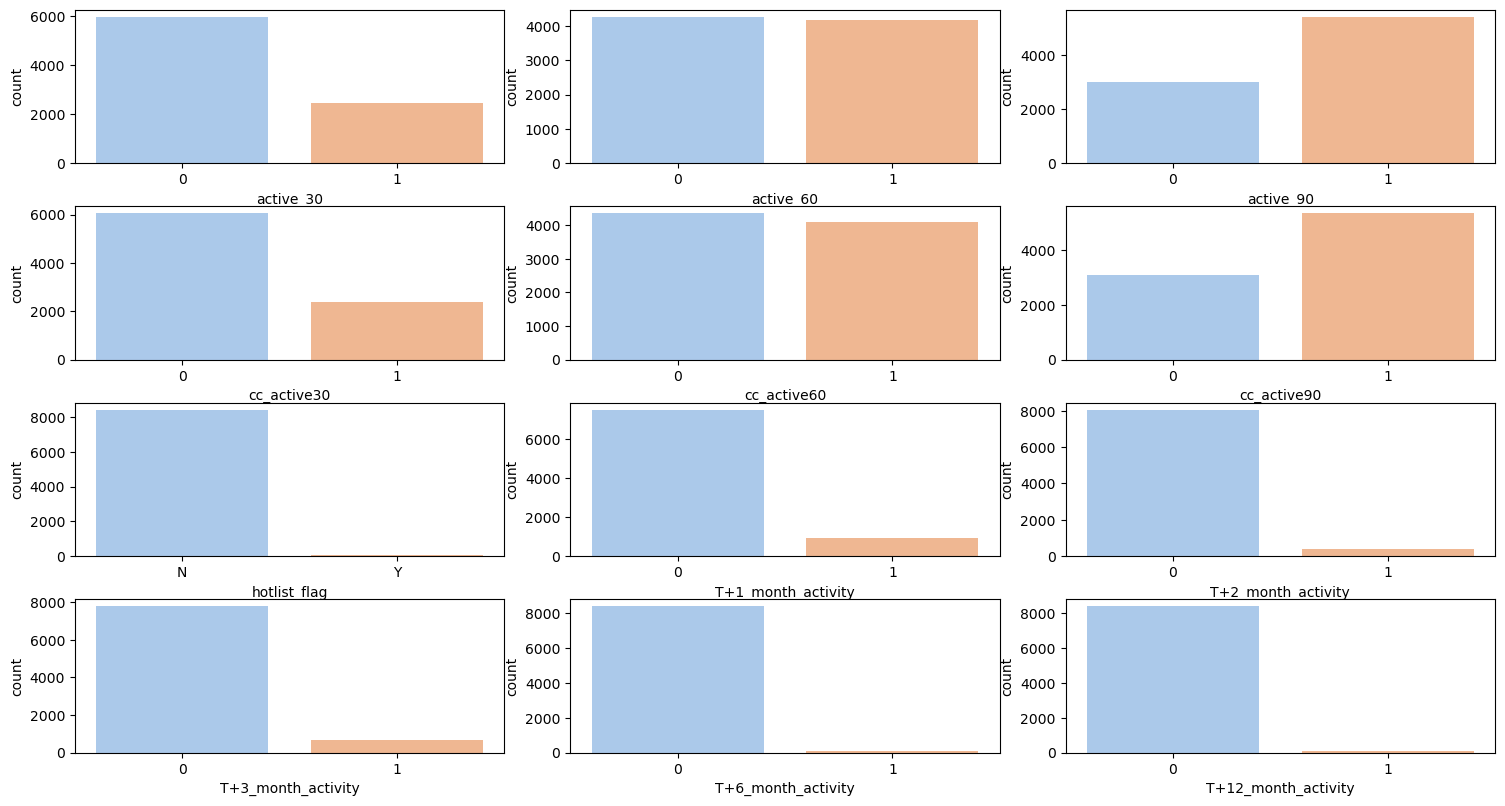

In [302]:
fig, ax = plt.subplots(4,3)
fig.set_size_inches(15,8)
fig.tight_layout(pad=1.0)
sns.countplot(data=df,x=list_object[3],ax=ax[0][0],palette='pastel')
sns.countplot(data=df,x=list_object[4],ax=ax[0][1],palette='pastel')
sns.countplot(data=df,x=list_object[5],ax=ax[0][2],palette='pastel')
sns.countplot(data=df,x=list_object[6],ax=ax[1][0],palette='pastel')
sns.countplot(data=df,x=list_object[7],ax=ax[1][1],palette='pastel')
sns.countplot(data=df,x=list_object[8],ax=ax[1][2],palette='pastel')
sns.countplot(data=df,x=list_object[9],ax=ax[2][0],palette='pastel')
sns.countplot(data=df,x=list_object[13],ax=ax[2][1],palette='pastel')
sns.countplot(data=df,x=list_object[14],ax=ax[2][2],palette='pastel')
sns.countplot(data=df,x=list_object[15],ax=ax[3][0],palette='pastel')
sns.countplot(data=df,x=list_object[16],ax=ax[3][1],palette='pastel')
sns.countplot(data=df,x=list_object[17],ax=ax[3][2],palette='pastel')
plt.show()

Text(0, 0.5, '')

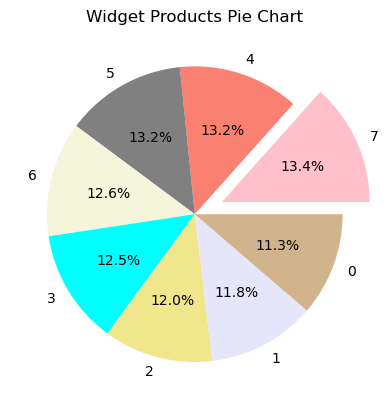

In [124]:
df['widget_products'].value_counts().plot(kind='pie',autopct='%0.1f%%',colors=['pink','salmon','grey','beige','cyan','khaki','lavender','tan'],explode=[0.2, 0, 0, 0,0,0,0,0])
plt.title('Widget Products Pie Chart')
plt.ylabel('')

Text(0, 0.5, '')

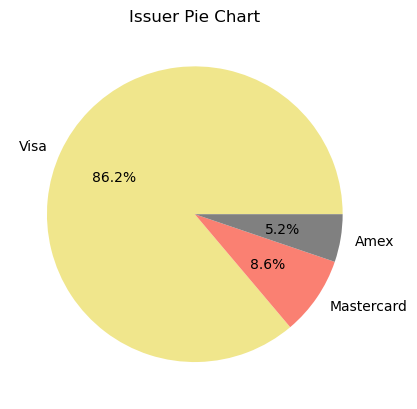

In [125]:
df['Issuer'].value_counts().plot(kind='pie',autopct='%0.1f%%',colors=['khaki','salmon','grey'])
plt.title('Issuer Pie Chart')
plt.ylabel('')

Text(0, 0.5, '')

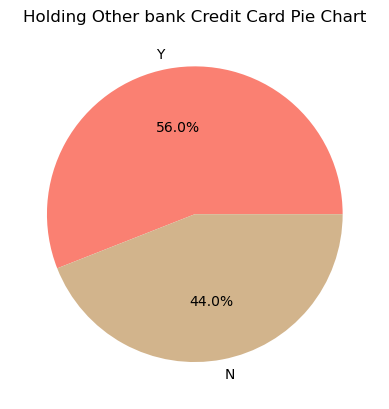

In [126]:
df['other_bank_cc_holding'].value_counts().plot(kind='pie',autopct='%0.1f%%',colors=['salmon','tan'])
plt.title('Holding Other bank Credit Card Pie Chart')
plt.ylabel('')

Text(0, 0.5, '')

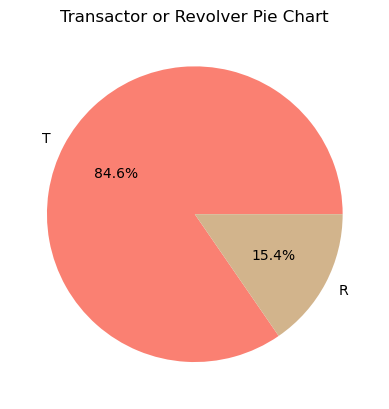

In [127]:
df['Transactor_revolver'].value_counts().plot(kind='pie',autopct='%0.1f%%',colors=['salmon','tan'])
plt.title('Transactor or Revolver Pie Chart')
plt.ylabel('')

In [128]:
df['Issuer'].value_counts(normalize=True)

Visa          0.861624
Mastercard    0.086174
Amex          0.052202
Name: Issuer, dtype: float64

In [129]:
df['Transactor_revolver'].value_counts(normalize=True)

T    0.846017
R    0.153983
Name: Transactor_revolver, dtype: float64

Text(0, 0.5, '')

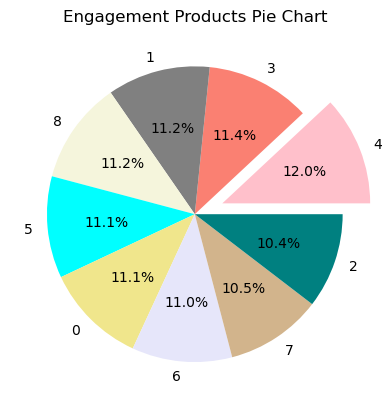

In [130]:
df['engagement_products'].value_counts().plot(kind='pie',autopct='%0.1f%%',explode=[0.2, 0, 0, 0,0,0,0,0,0,],colors=['pink','salmon','grey','beige','cyan','khaki','lavender','tan','teal'])
plt.title('Engagement Products Pie Chart')
plt.ylabel('')

In [131]:
df['other_bank_cc_holding'].value_counts(normalize=True)

Y    0.559659
N    0.440341
Name: other_bank_cc_holding, dtype: float64

In [132]:
df['hotlist_flag'].value_counts(normalize=True)

N    0.995502
Y    0.004498
Name: hotlist_flag, dtype: float64

In [133]:
df['active_30'].value_counts(normalize=True)

0    0.707623
1    0.292377
Name: active_30, dtype: float64

In [134]:
df['active_60'].value_counts(normalize=True)

0    0.505208
1    0.494792
Name: active_60, dtype: float64

In [135]:
df['active_90'].value_counts(normalize=True)

1    0.642045
0    0.357955
Name: active_90, dtype: float64

In [136]:
df['cc_active30'].value_counts(normalize=True)

0    0.715909
1    0.284091
Name: cc_active30, dtype: float64

In [137]:
df['cc_active60'].value_counts(normalize=True)

0    0.515507
1    0.484493
Name: cc_active60, dtype: float64

In [138]:
df['cc_active90'].value_counts(normalize=True)

1    0.632339
0    0.367661
Name: cc_active90, dtype: float64

Text(0.5, 1.0, 'Occupation Pie Chart')

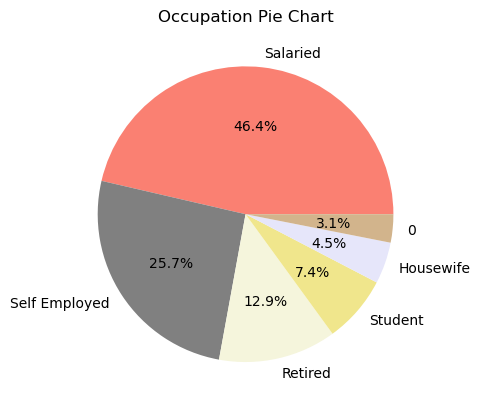

In [139]:
df['Occupation_at_source'].value_counts(normalize=True).plot(kind='pie',autopct='%0.1f%%',colors=['salmon','grey','beige','khaki','lavender','tan','teal'])
plt.xticks(rotation=45)
plt.ylabel('')
plt.title('Occupation Pie Chart')

Text(0.5, 1.0, 'Card Type Pie Chart')

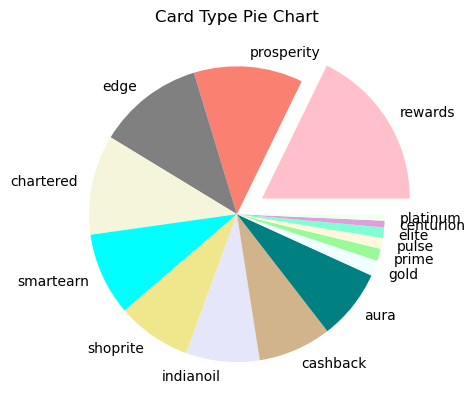

In [140]:
df['card_type'].value_counts(normalize=True).plot(kind='pie',explode=[0.2, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0],colors=['pink','salmon','grey','beige','cyan','khaki','lavender','tan','teal','azure','palegreen','cornsilk','aquamarine','plum','honeydew'])
plt.xticks(rotation=45)
plt.ylabel('')
plt.title('Card Type Pie Chart')

Text(0.5, 1.0, 'High Net Worth Pie Chart')

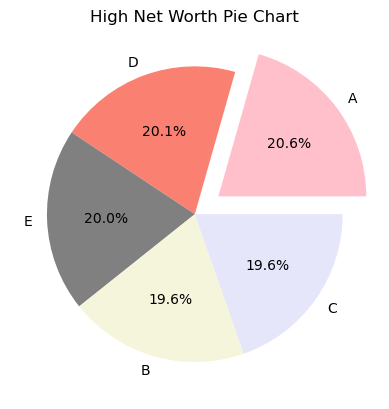

In [141]:
df['high_networth'].value_counts(normalize=True).plot(kind='pie',autopct='%0.1f%%',explode=[0.2,0,0,0,0],colors=['pink','salmon','grey','beige','lavender'])
plt.xticks(rotation=45)
plt.ylabel('')
plt.title('High Net Worth Pie Chart')

In [142]:
df['T+1_month_activity'].value_counts(normalize=True)

0    0.888731
1    0.111269
Name: T+1_month_activity, dtype: float64

In [143]:
df['T+2_month_activity'].value_counts(normalize=True)

0    0.95206
1    0.04794
Name: T+2_month_activity, dtype: float64

In [144]:
df['T+3_month_activity'].value_counts(normalize=True)

0    0.919626
1    0.080374
Name: T+3_month_activity, dtype: float64

In [145]:
df['T+6_month_activity'].value_counts(normalize=True)

0    0.991122
1    0.008878
Name: T+6_month_activity, dtype: float64

In [146]:
df['T+12_month_activity'].value_counts(normalize=True)

0    0.99053
1    0.00947
Name: T+12_month_activity, dtype: float64

[Text(0.5, 1.0, 'Current credit card limit')]

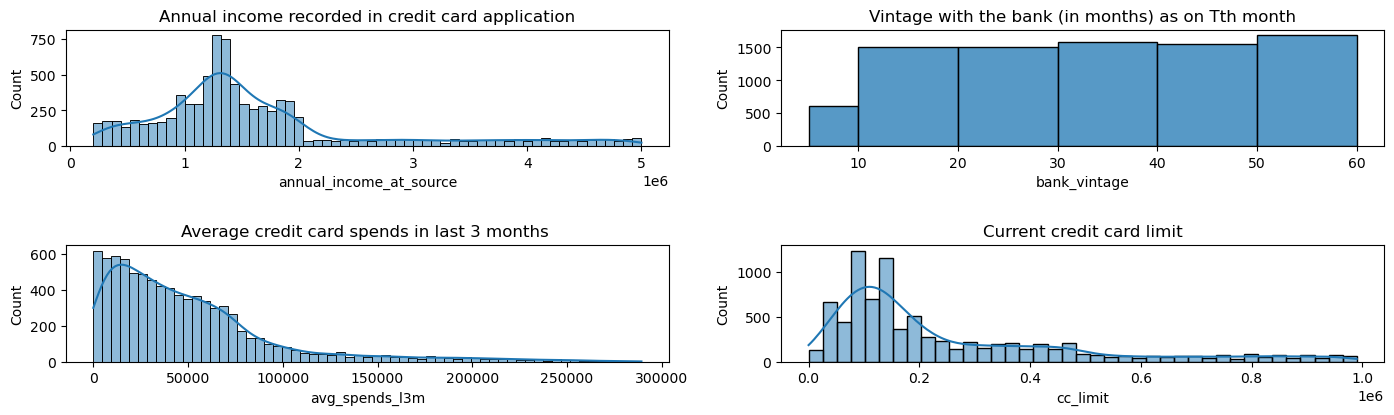

In [303]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,5)
fig.tight_layout(pad=5.0)
sns.histplot(data=df,x=list_num[0],kde=True,ax=ax[0][0],palette='pastel').set(title='Annual income recorded in credit card application')
sns.histplot(data=df,x=list_num[1],bins=[5,10,20,30,40,50,60],ax=ax[0][1],palette='pastel').set(title='Vintage with the bank (in months) as on Tth month')
sns.histplot(data=df,x=list_num[2],kde=True,ax=ax[1][0],palette='pastel').set(title='Average credit card spends in last 3 months ')
sns.histplot(data=df,x=list_num[3],kde=True,ax=ax[1][1],palette='pastel').set(title='Current credit card limit')

[Text(0.5, 1.0, 'Current Credit Card limit')]

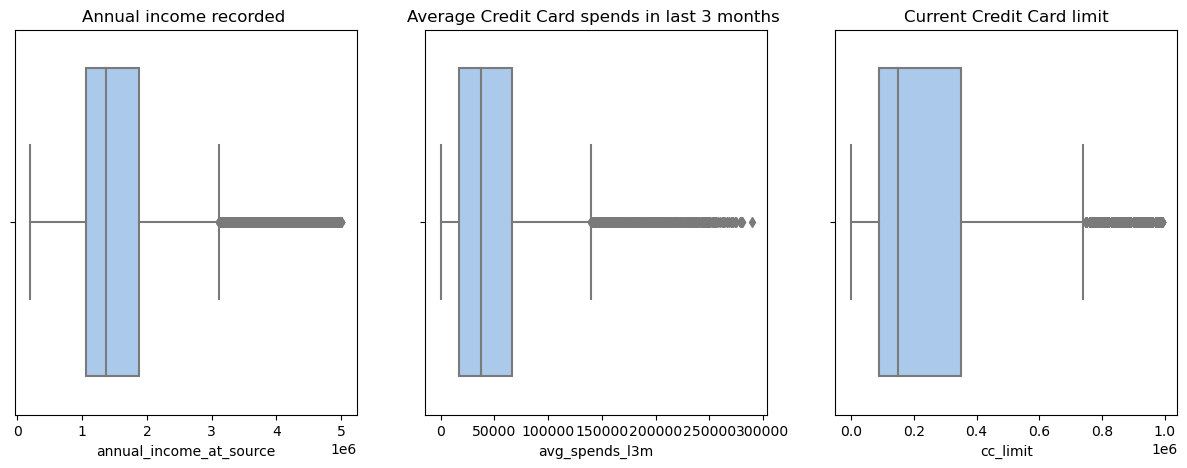

In [304]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15,5)
sns.boxplot(data=df,x=list_num[0],ax=ax[0],palette='pastel').set(title='Annual income recorded ')
sns.boxplot(data=df,x=list_num[2],ax=ax[1],palette='pastel').set(title='Average Credit Card spends in last 3 months ')
sns.boxplot(data=df,x=list_num[3],ax=ax[2],palette='pastel').set(title='Current Credit Card limit')

In [149]:
df['avg_spends_l3m'].describe()

MEAN=round(df['avg_spends_l3m'].mean(),2)
Q3=df['avg_spends_l3m'].quantile(.75)
Q2=df['avg_spends_l3m'].quantile(.50)
Q1=df['avg_spends_l3m'].quantile(.25)
IQR=Q3-Q1
MIN=df['avg_spends_l3m'].min()
MAX=Q3+(1.5*IQR)
OUTLIER_MAX=df['avg_spends_l3m'].max()
print("Males \nQ3 is {} \nQ2 is {} \nQ1 is {} \nMIN is {} \nMax  is {} \nOutlierMax  is {} \nMean  is {} \n".format(Q3,Q2,Q1,MIN,MAX,OUTLIER_MAX,MEAN))

Males 
Q3 is 66095.75 
Q2 is 37943.0 
Q1 is 17110.0 
MIN is 0 
Max  is 139574.375 
OutlierMax  is 289292 
Mean  is 49527.37 



In [150]:
df['cc_limit'].describe()

count      8448.000000
mean     251706.912879
std      229114.856385
min           0.000000
25%       90000.000000
50%      150000.000000
75%      350000.000000
max      990000.000000
Name: cc_limit, dtype: float64

In [151]:
df['annual_income_at_source'].describe()

count    8.448000e+03
mean     1.674595e+06
std      1.064307e+06
min      2.000950e+05
25%      1.061104e+06
50%      1.372134e+06
75%      1.881734e+06
max      4.999508e+06
Name: annual_income_at_source, dtype: float64

In [152]:
df['bank_vintage'].describe()



count    8448.000000
mean       33.164181
std        15.868344
min         6.000000
25%        19.000000
50%        33.000000
75%        47.000000
max        60.000000
Name: bank_vintage, dtype: float64

###### bivariate analysis categorical and numerical

[Text(0.5, 1.0, 'Average spends in last 3 months Vs Holding Other bank Credit Card')]

<Figure size 3000x500 with 0 Axes>

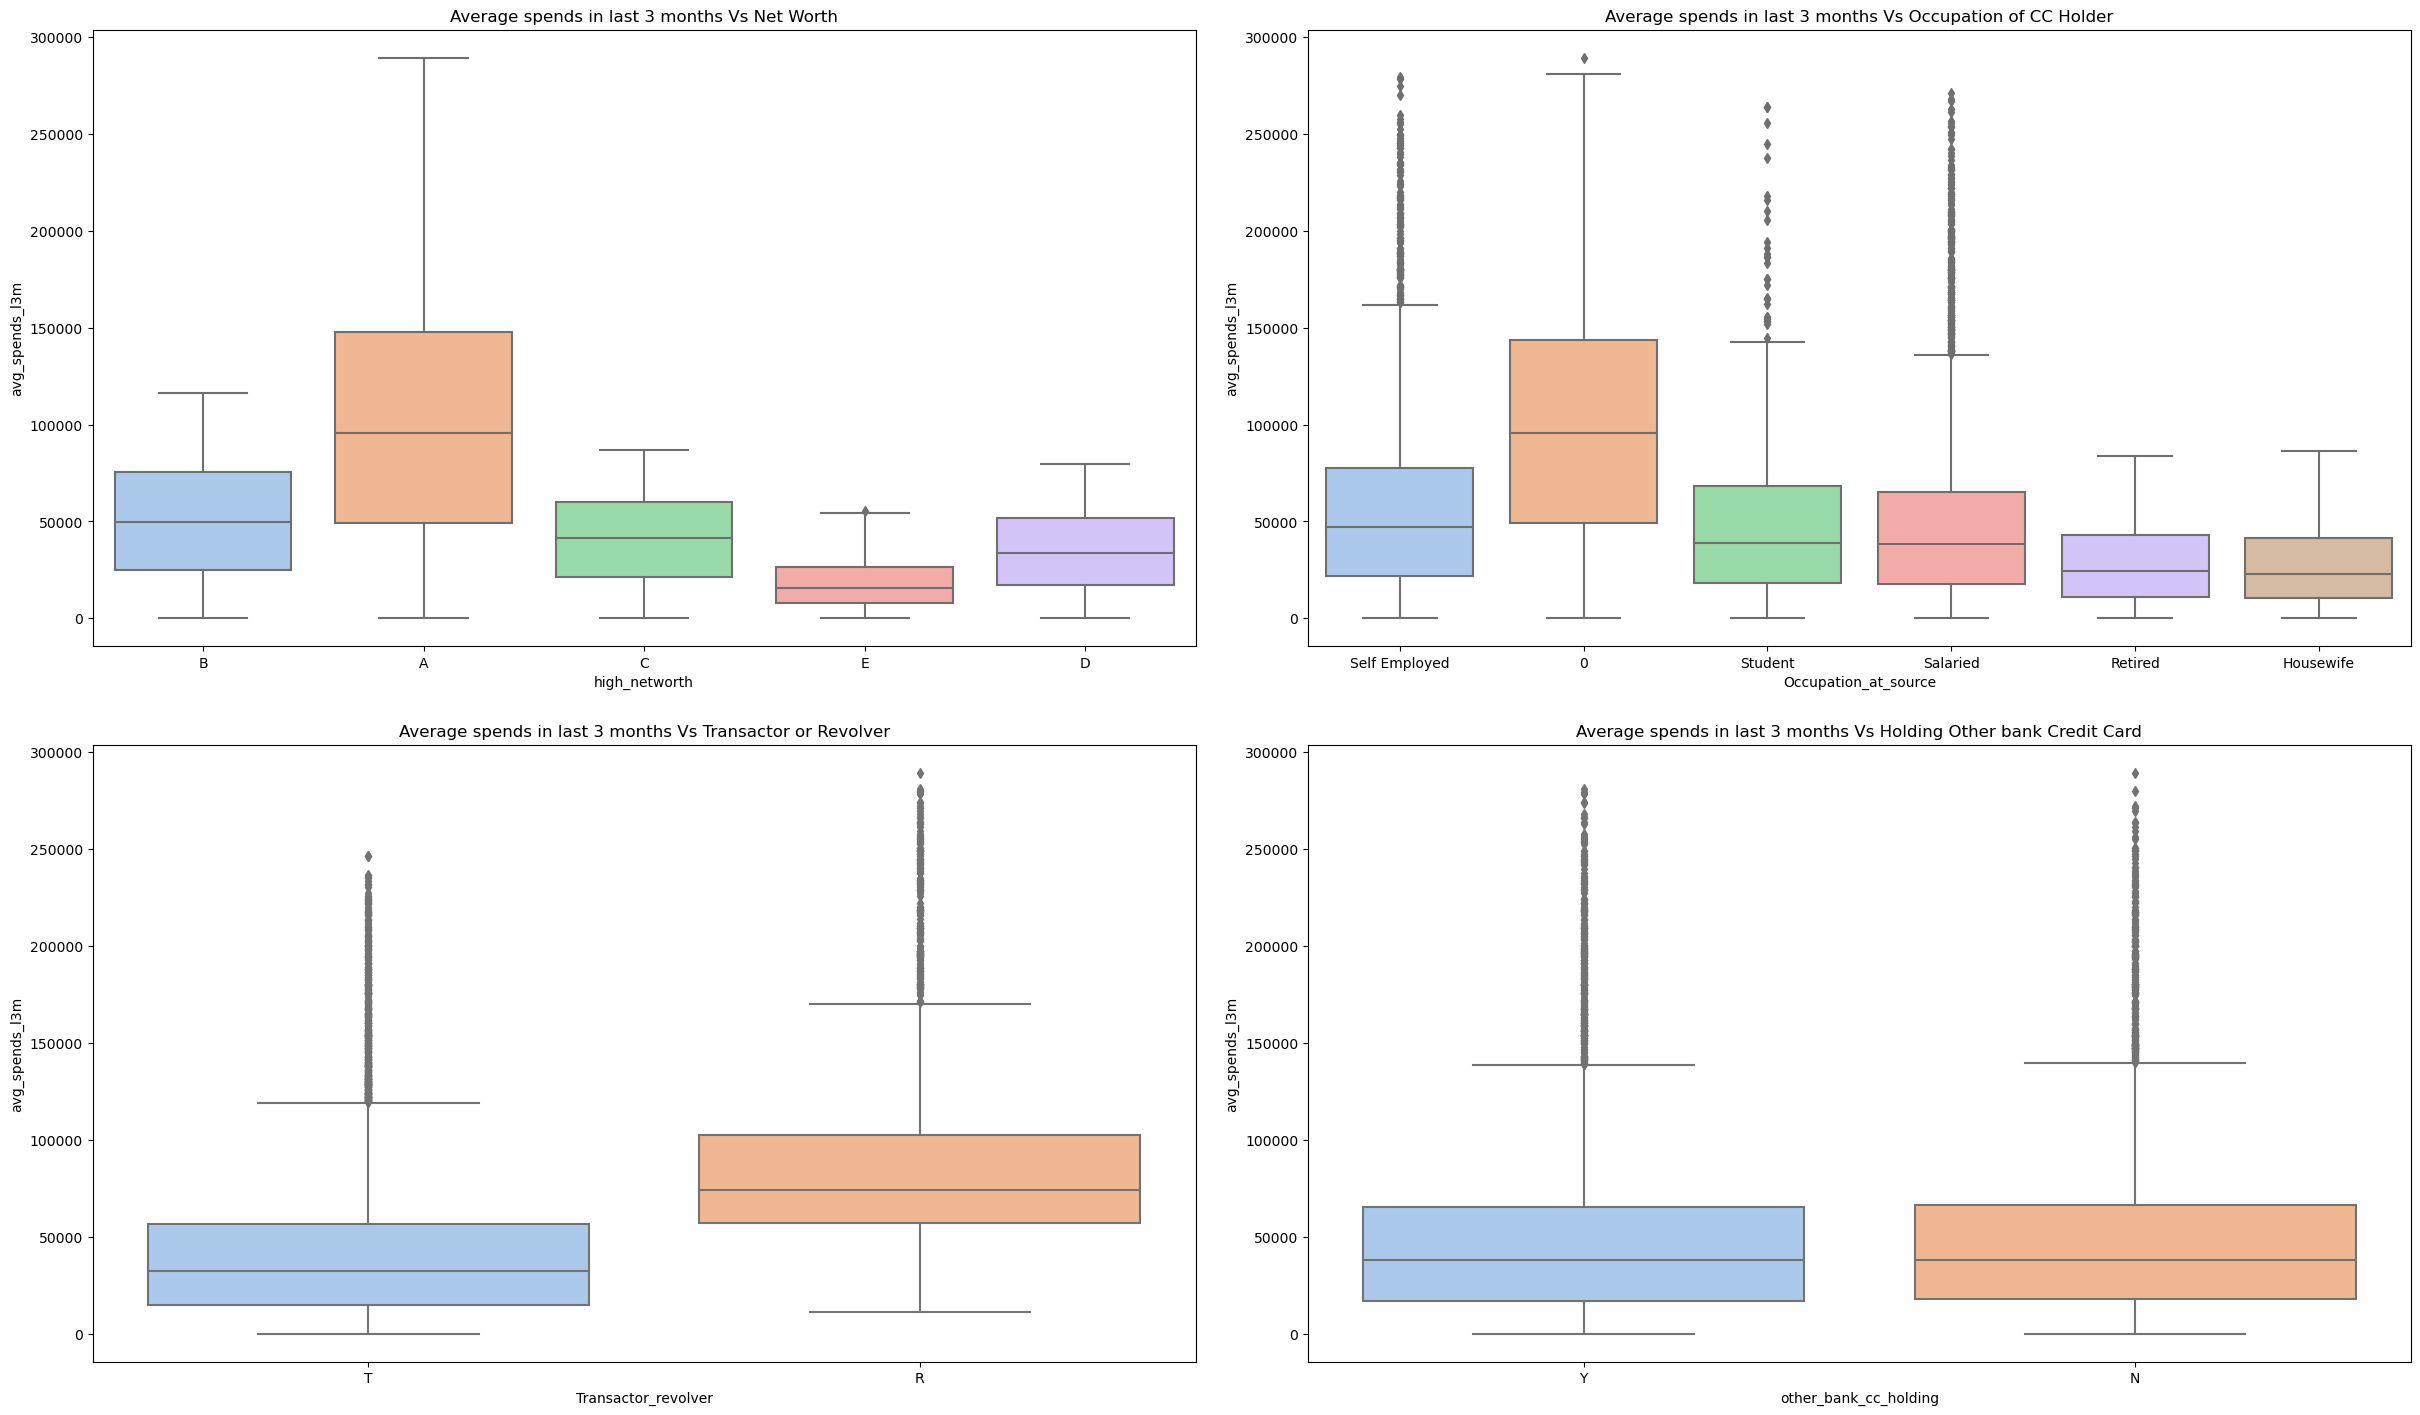

In [153]:
plt.figure(figsize=(30,5));
fig, ax = plt.subplots(2,2)
fig.set_size_inches(25,15)
fig.tight_layout(pad=5.0)
sns.boxplot(data=df, x="high_networth", y="avg_spends_l3m",ax=ax[0][0],palette='pastel').set(title='Average spends in last 3 months Vs Net Worth')
sns.boxplot(data=df, x="Occupation_at_source", y="avg_spends_l3m",ax=ax[0][1],palette='pastel').set(title='Average spends in last 3 months Vs Occupation of CC Holder')
sns.boxplot(data=df, x="Transactor_revolver", y="avg_spends_l3m",ax=ax[1][0],palette='pastel').set(title='Average spends in last 3 months Vs Transactor or Revolver')
sns.boxplot(data=df, x="other_bank_cc_holding", y="avg_spends_l3m",ax=ax[1][1],palette='pastel').set(title='Average spends in last 3 months Vs Holding Other bank Credit Card')

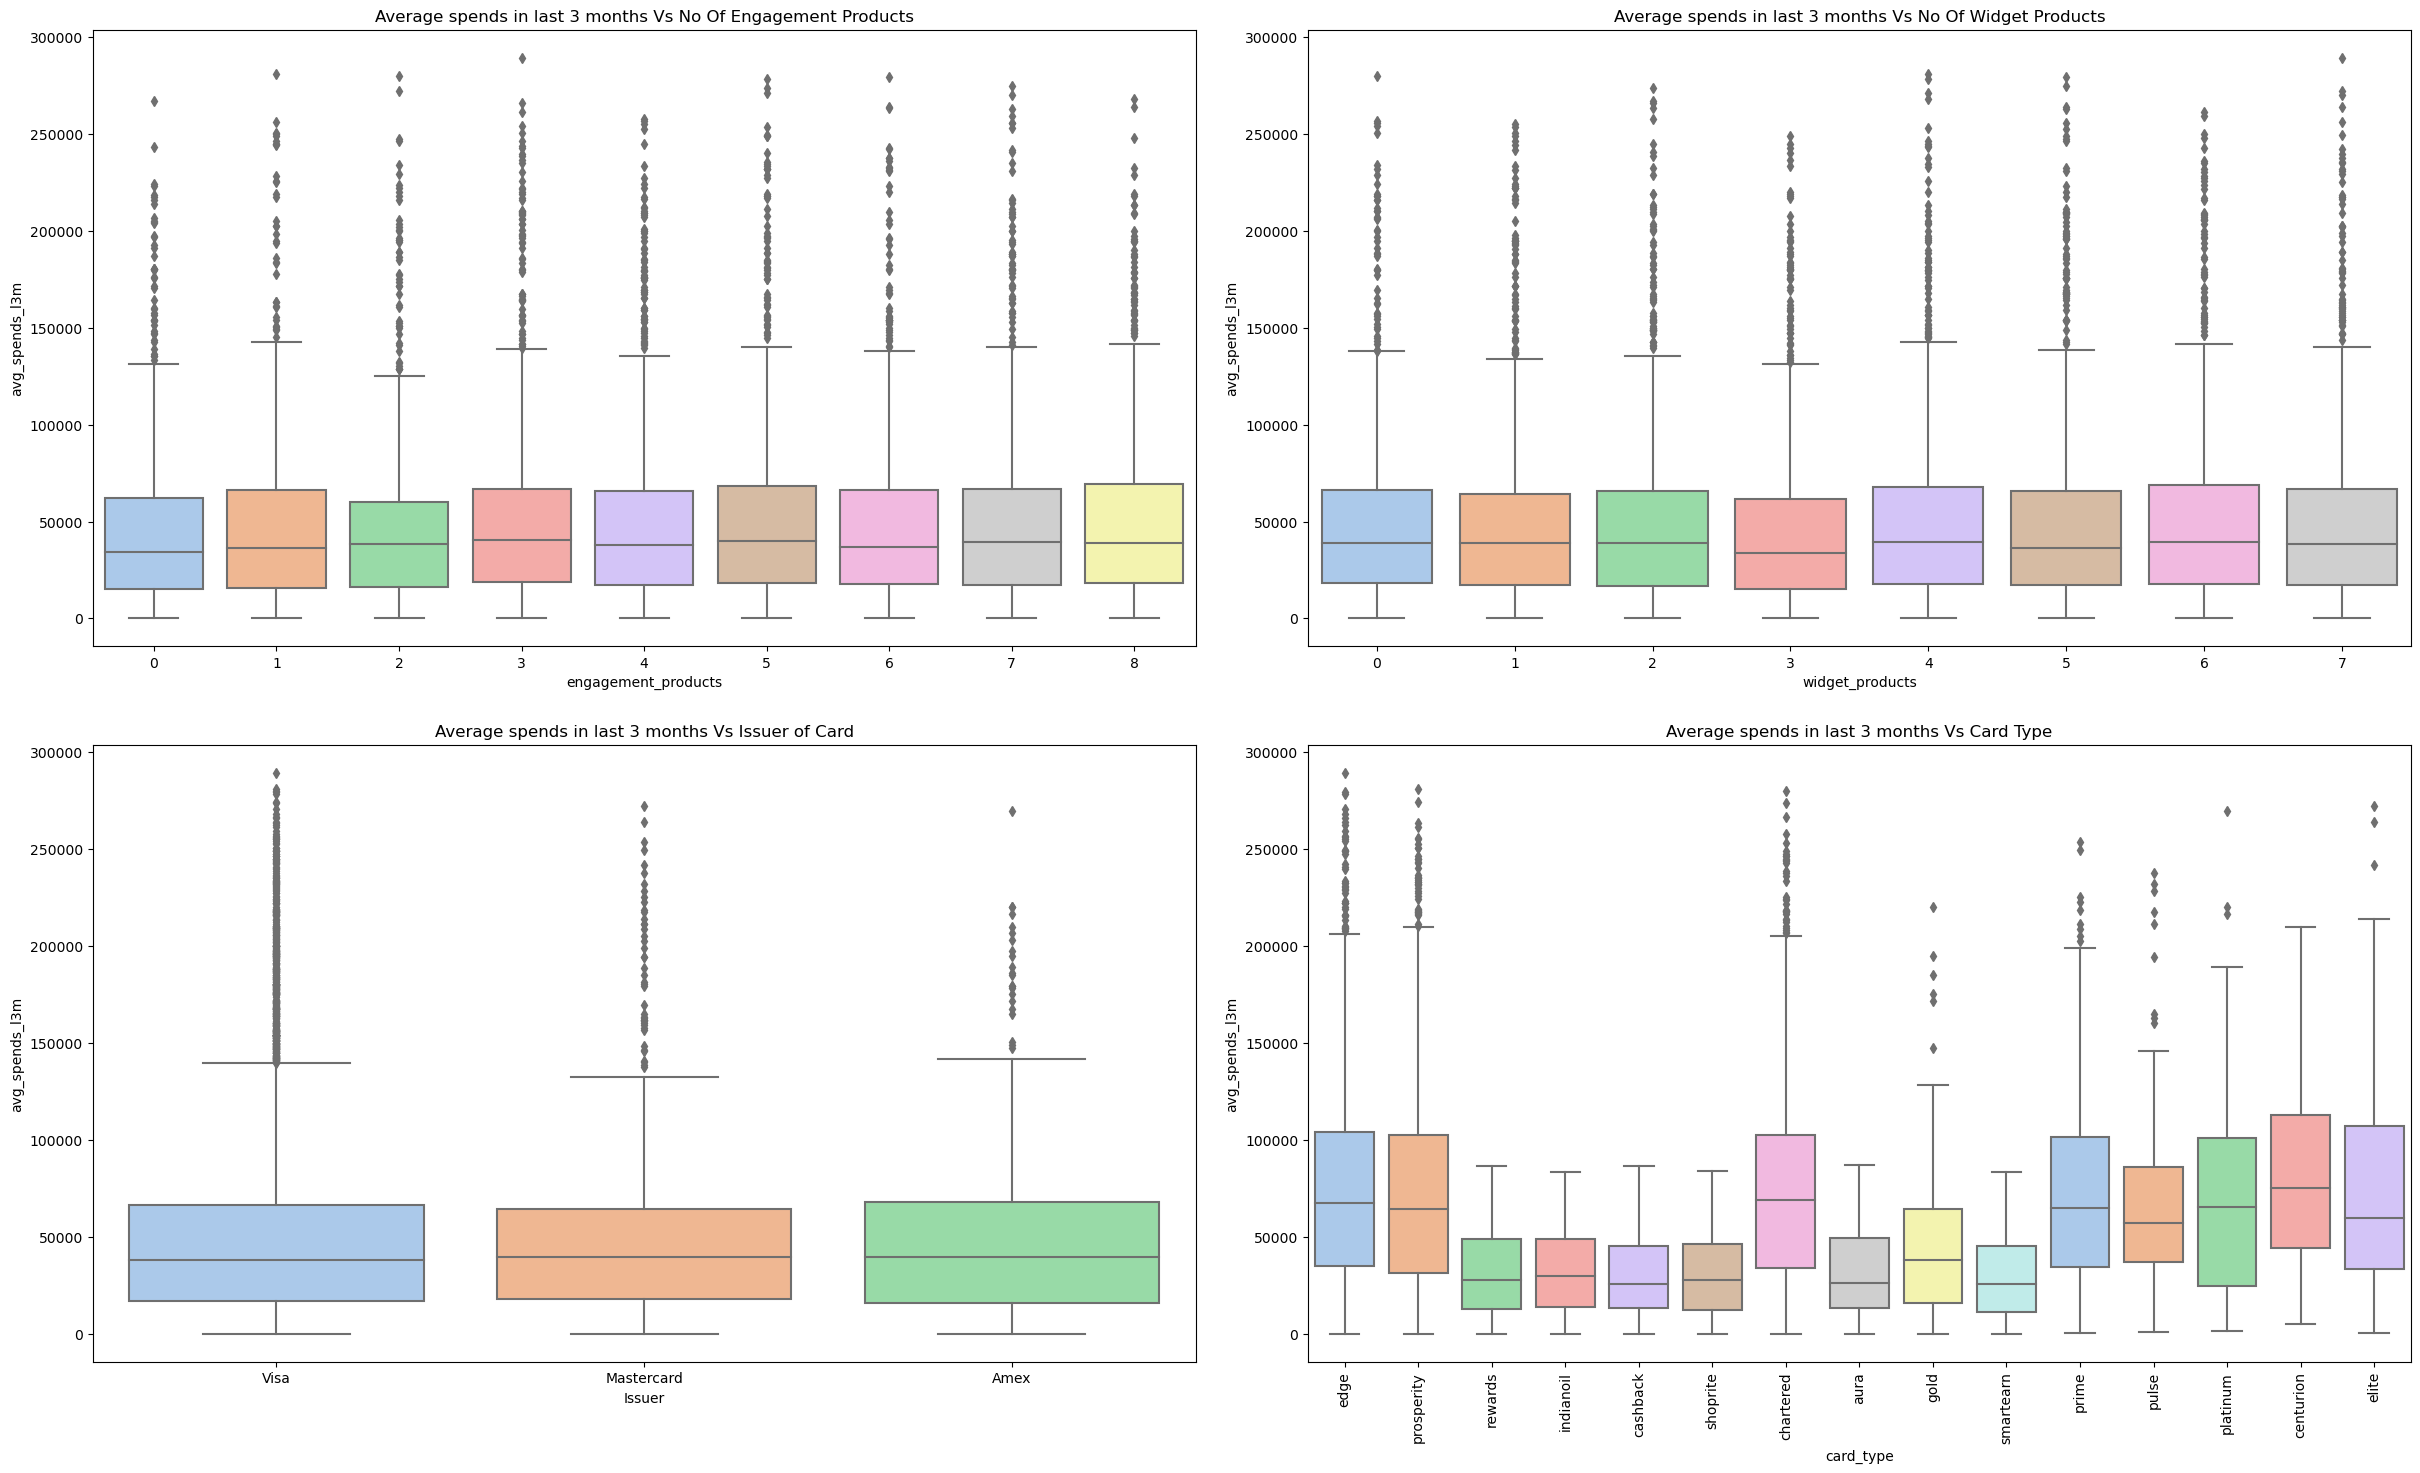

In [154]:
fig, ax = plt.subplots(2,2);
fig.set_size_inches(25,15);
fig.tight_layout(pad=5.0);
sns.boxplot(data=df, x="engagement_products", y="avg_spends_l3m",ax=ax[0][0],palette='pastel').set(title='Average spends in last 3 months Vs No Of Engagement Products')
sns.boxplot(data=df, x= "widget_products", y="avg_spends_l3m",ax=ax[0][1],palette='pastel').set(title='Average spends in last 3 months Vs No Of Widget Products')
sns.boxplot(data=df, x= "Issuer", y="avg_spends_l3m",ax=ax[1][0],palette='pastel').set(title='Average spends in last 3 months Vs Issuer of Card')
sns.boxplot(data=df, x= "card_type", y="avg_spends_l3m",ax=ax[1][1],palette='pastel').set(title='Average spends in last 3 months Vs Card Type')
plt.xticks(rotation=90);

In [305]:
df.groupby('Occupation_at_source')['avg_spends_l3m'].describe()

count           mean           std    min       25%  \
Occupation_at_source                                                         
0                      261.0  102053.823755  69798.136606    0.0  49064.00   
Housewife              384.0   27425.973958  20028.496576  100.0  10399.25   
Retired               1089.0   28574.860422  20833.986020    0.0  11170.00   
Salaried              3918.0   48890.819551  44471.557133    0.0  17502.75   
Self Employed         2175.0   58797.316322  51045.104786    0.0  21561.00   
Student                621.0   49409.251208  43747.875435   28.0  18349.00   

                          50%        75%       max  
Occupation_at_source                                
0                     95690.0  143386.00  289292.0  
Housewife             22781.5   41317.25   86264.0  
Retired               24295.0   43205.00   83668.0  
Salaried              38476.0   65037.25  271023.0  
Self Employed         47071.0   77683.00  279341.0  
Student               38824.0   68437.00  264012.0

In [306]:
df.groupby('Issuer')['avg_spends_l3m'].describe()

count          mean           std  min      25%      50%  \
Issuer                                                                  
Amex         441.0  48976.571429  44551.647878  0.0  15905.0  39695.0   
Mastercard   728.0  49915.589286  46607.778175  0.0  17909.5  39408.5   
Visa        7279.0  49521.907817  46315.005799  0.0  17068.5  37809.0   

                75%       max  
Issuer                         
Amex        67804.0  269864.0  
Mastercard  64167.5  272357.0  
Visa        66202.0  289292.0

In [307]:
df.groupby('card_type')['avg_spends_l3m'].describe()

count          mean           std     min       25%      50%  \
card_type                                                                   
aura         652.0  31580.196319  21730.032786     0.0  13413.50  26268.0   
cashback     676.0  30049.690828  20703.771590    55.0  13004.75  25697.0   
centurion     62.0  82440.564516  54189.790493  4946.0  43982.50  74958.5   
chartered    923.0  77330.923077  56190.938632     0.0  33766.50  68814.0   
edge         980.0  78981.873469  59623.693676     0.0  35109.75  67348.0   
elite         96.0  76668.229167  59896.511722   164.0  33211.25  59942.5   
gold         145.0  46164.641379  40073.104032     0.0  15678.00  37801.0   
indianoil    680.0  32356.322059  21170.720848     0.0  13970.00  29690.5   
platinum      59.0  73599.711864  61219.517594  1136.0  24366.50  65236.0   
prime        112.0  80403.357143  60025.561989   165.0  34244.75  65102.5   
prosperity  1007.0  75789.428004  58580.591556     0.0  31076.50  64256.0   
pulse        101.0  69031.188119  53757.780652   668.0  37108.00  57167.0   
rewards     1502.0  31516.928096  21808.108755     0.0  12854.50  27582.5   
shoprite     688.0  30667.816860  21344.512671     0.0  11984.50  27958.0   
smartearn    765.0  29384.892810  21377.256497     0.0  11068.00  25497.0   

                  75%       max  
card_type                        
aura         49225.50   86961.0  
cashback     45073.50   86781.0  
centurion   112814.25  209917.0  
chartered   102743.00  280148.0  
edge        103997.50  289292.0  
elite       107191.00  272357.0  
gold         64394.00  220091.0  
indianoil    48919.00   83668.0  
platinum    101207.50  269864.0  
prime       101457.25  253555.0  
prosperity  102767.00  280854.0  
pulse        85835.00  237655.0  
rewards      48673.75   86528.0  
shoprite     46437.00   83733.0  
smartearn    45051.00   83437.0

In [308]:
df.groupby('other_bank_cc_holding')['avg_spends_l3m'].describe()

count          mean           std  min       25%  \
other_bank_cc_holding                                                      
N                      3720.0  50036.536828  46361.142824  0.0  17711.25   
Y                      4728.0  49126.748519  46154.289445  0.0  16627.00   

                           50%       75%       max  
other_bank_cc_holding                               
N                      38157.5  66528.50  289292.0  
Y                      37750.0  65511.75  280854.0

In [342]:
df.groupby('card_type')['cc_limit'].describe()


count           mean            std       min       25%  \
card_type                                                              
aura         652.0  106411.042945   47038.269880   20000.0   80000.0   
cashback     676.0  106094.674556   45715.544659   20000.0   80000.0   
centurion     62.0  421612.903226  216326.965255  150000.0  262500.0   
chartered    923.0  466283.856988  225837.927867       0.0  290000.0   
edge         980.0  468806.122449  229048.088236  150000.0  287500.0   
elite         96.0  463854.166667  231809.221885  150000.0  270000.0   
gold         145.0  245517.241379  212805.111136   20000.0  100000.0   
indianoil    680.0  108161.764706   48682.225361   20000.0   80000.0   
platinum      59.0  439661.016949  201972.737164  150000.0  295000.0   
prime        112.0  446517.857143  225067.396598   40000.0  270000.0   
prosperity  1007.0  465660.377358  226907.062383  150000.0  290000.0   
pulse        101.0  472475.247525  229291.979540  150000.0  310000.0   
rewards     1502.0  111517.976032   48620.811945   20000.0   80000.0   
shoprite     688.0  107732.558140   47543.174138   20000.0   70000.0   
smartearn    765.0  106509.803922   48124.255301   20000.0   70000.0   

                 50%       75%       max  
card_type                                 
aura        110000.0  140000.0  210000.0  
cashback    105000.0  140000.0  210000.0  
centurion   375000.0  490000.0  980000.0  
chartered   410000.0  615000.0  990000.0  
edge        410000.0  640000.0  990000.0  
elite       420000.0  582500.0  960000.0  
gold        150000.0  350000.0  980000.0  
indianoil   110000.0  140000.0  210000.0  
platinum    390000.0  545000.0  920000.0  
prime       390000.0  595000.0  980000.0  
prosperity  410000.0  600000.0  990000.0  
pulse       410000.0  640000.0  990000.0  
rewards     110000.0  140000.0  210000.0  
shoprite    110000.0  140000.0  210000.0  
smartearn   100000.0  140000.0  210000.0

[Text(0.5, 1.0, 'Credit Card Limit VsCard type')]

<Figure size 3000x500 with 0 Axes>

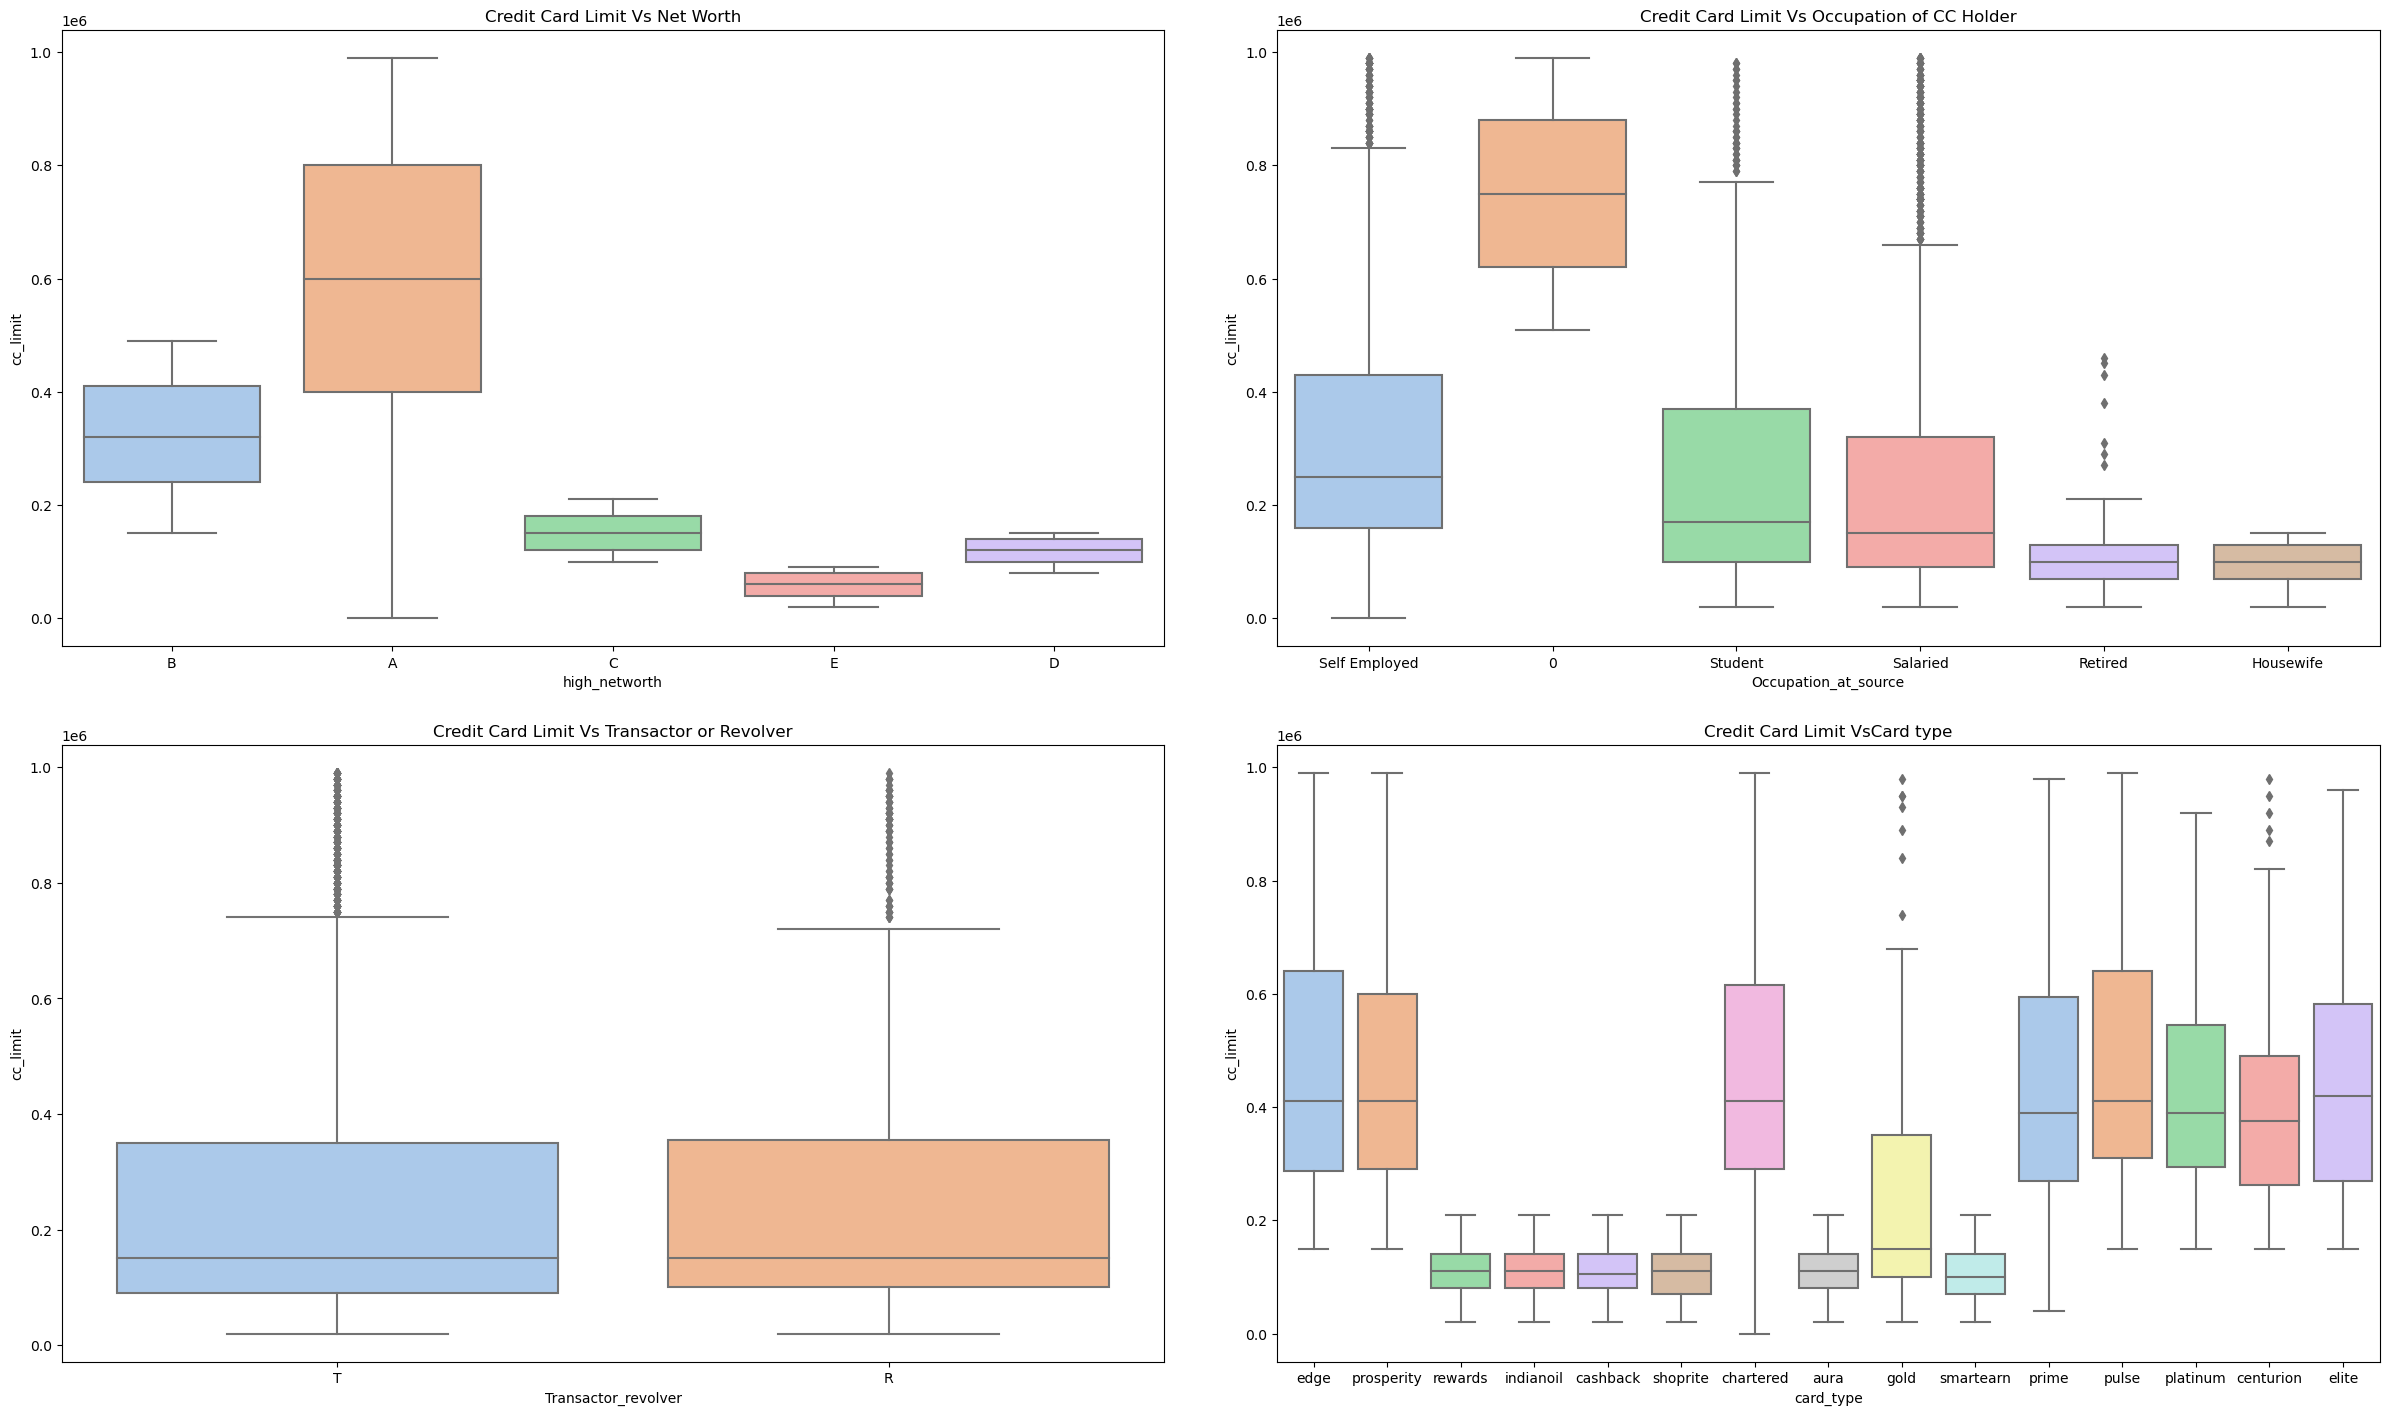

In [343]:
plt.figure(figsize=(30,5));
fig, ax = plt.subplots(2,2)
fig.set_size_inches(25,15)
fig.tight_layout(pad=5.0)
sns.boxplot(data=df, x="high_networth", y="cc_limit",ax=ax[0][0],palette='pastel').set(title='Credit Card Limit Vs Net Worth')
sns.boxplot(data=df, x="Occupation_at_source", y="cc_limit",ax=ax[0][1],palette='pastel').set(title='Credit Card Limit Vs Occupation of CC Holder')
sns.boxplot(data=df, x="Transactor_revolver", y="cc_limit",ax=ax[1][0],palette='pastel').set(title='Credit Card Limit Vs Transactor or Revolver')
sns.boxplot(data=df, x="card_type", y="cc_limit",ax=ax[1][1],palette='pastel').set(title='Credit Card Limit VsCard type')

###### bivariate analysis numerical and numerical

[Text(0.5, 1.0, 'Average spends Vs Credit Card Limit')]

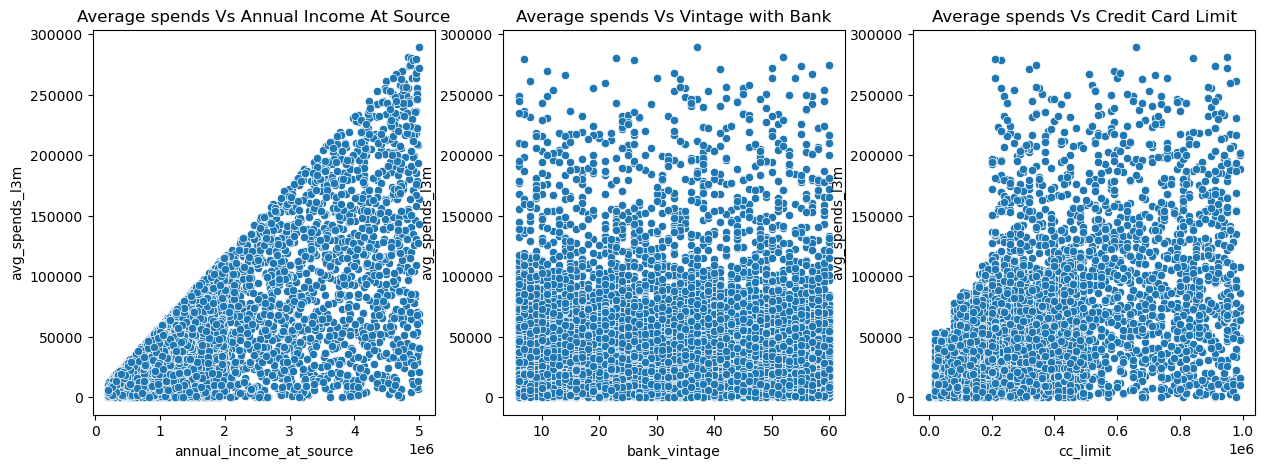

In [160]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15,5)
sns.scatterplot(data=df,x='annual_income_at_source',y='avg_spends_l3m',ax=ax[0]).set(title='Average spends Vs Annual Income At Source')
sns.scatterplot(data=df,x='bank_vintage',y='avg_spends_l3m',ax=ax[1]).set(title='Average spends Vs Vintage with Bank')
sns.scatterplot(data=df,x='cc_limit',y='avg_spends_l3m',ax=ax[2]).set(title='Average spends Vs Credit Card Limit')

<AxesSubplot:>

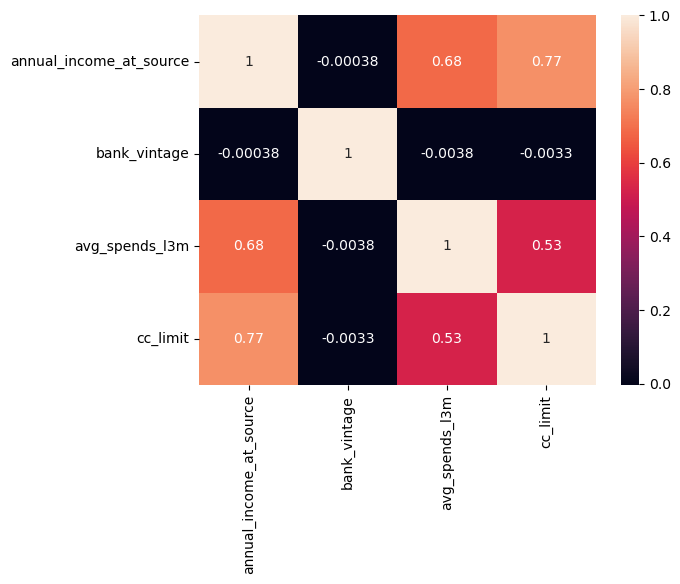

In [315]:
sns.heatmap(df.corr(),annot=True)

[Text(0.5, 1.0, 'Average spends Vs Activity 12th month')]

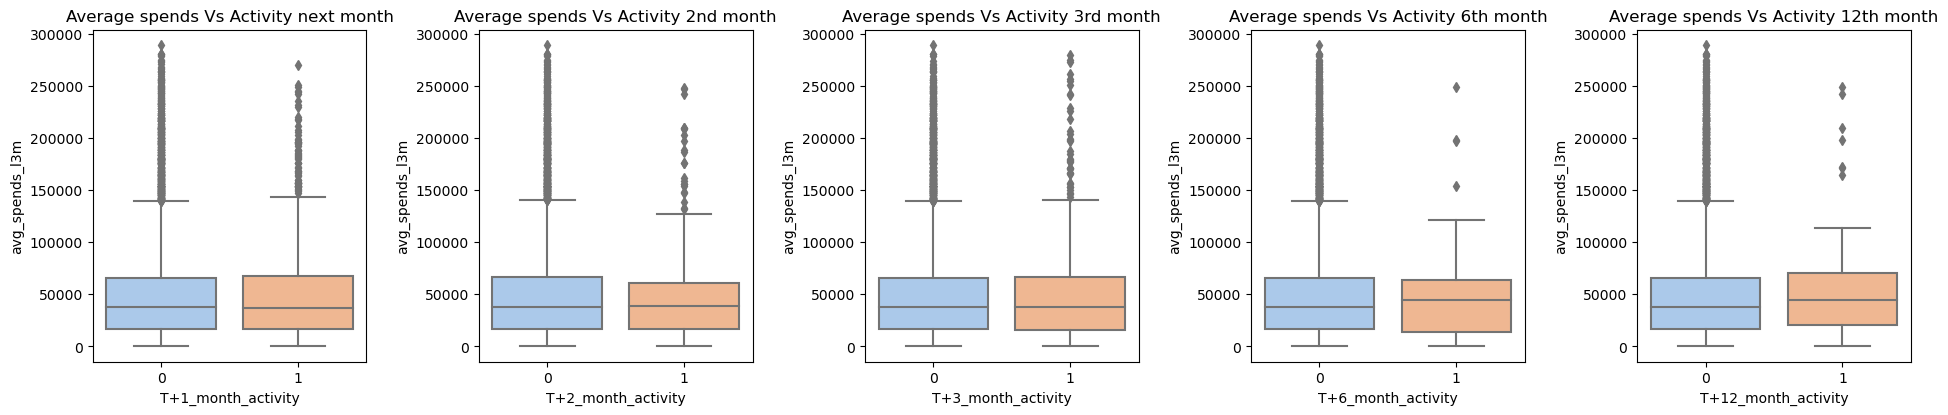

In [162]:
fig, ax = plt.subplots(1,5)
fig.set_size_inches(20,5)
fig.tight_layout(pad=5.0)
sns.boxplot(data=df, x="T+1_month_activity", y="avg_spends_l3m",ax=ax[0],palette='pastel').set(title='Average spends Vs Activity next month')
sns.boxplot(data=df, x="T+2_month_activity", y="avg_spends_l3m",ax=ax[1],palette='pastel').set(title='Average spends Vs Activity 2nd month')
sns.boxplot(data=df, x="T+3_month_activity", y="avg_spends_l3m",ax=ax[2],palette='pastel').set(title='Average spends Vs Activity 3rd month')
sns.boxplot(data=df, x="T+6_month_activity", y="avg_spends_l3m",ax=ax[3],palette='pastel').set(title='Average spends Vs Activity 6th month')
sns.boxplot(data=df, x="T+12_month_activity", y="avg_spends_l3m",ax=ax[4],palette='pastel').set(title='Average spends Vs Activity 12th month')

[Text(0.5, 1.0, 'Average spends Vs CC actvity last 90 days')]

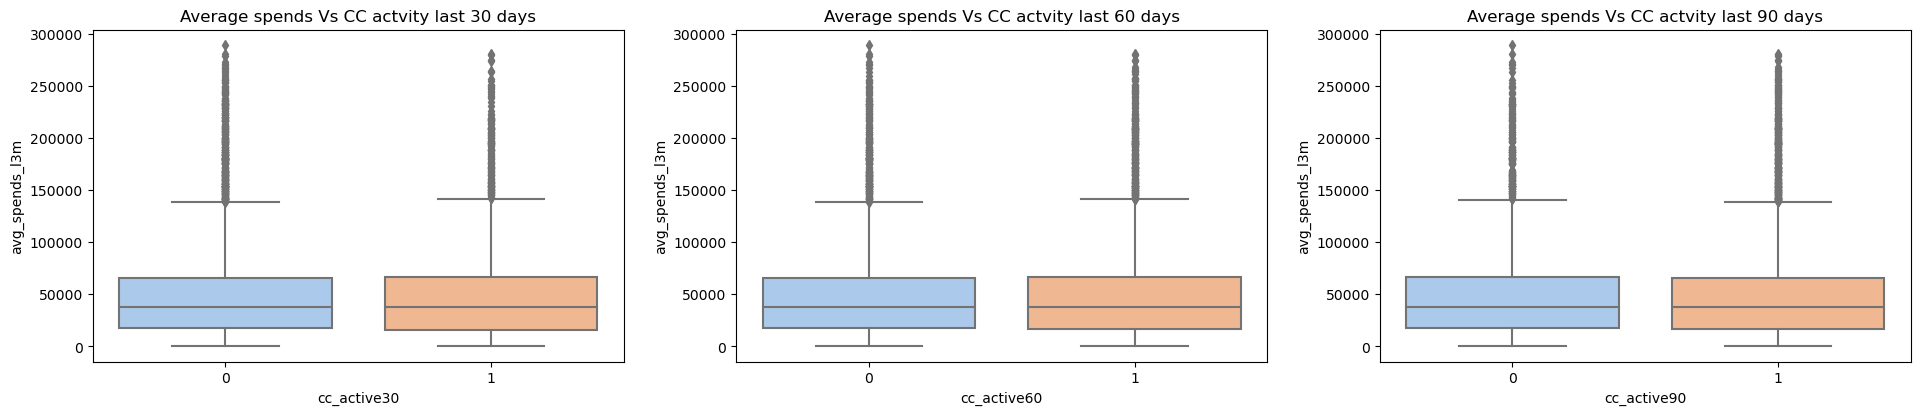

In [163]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.tight_layout(pad=5.0)
sns.boxplot(data=df, x= "cc_active30", y="avg_spends_l3m",ax=ax[0],palette='pastel').set(title='Average spends Vs CC actvity last 30 days')
sns.boxplot(data=df, x= "cc_active60", y="avg_spends_l3m",ax=ax[1],palette='pastel').set(title='Average spends Vs CC actvity last 60 days')
sns.boxplot(data=df, x= "cc_active90", y="avg_spends_l3m",ax=ax[2],palette='pastel').set(title='Average spends Vs CC actvity last 90 days')

[Text(0.5, 1.0, ' Income Vs Activity 12th month')]

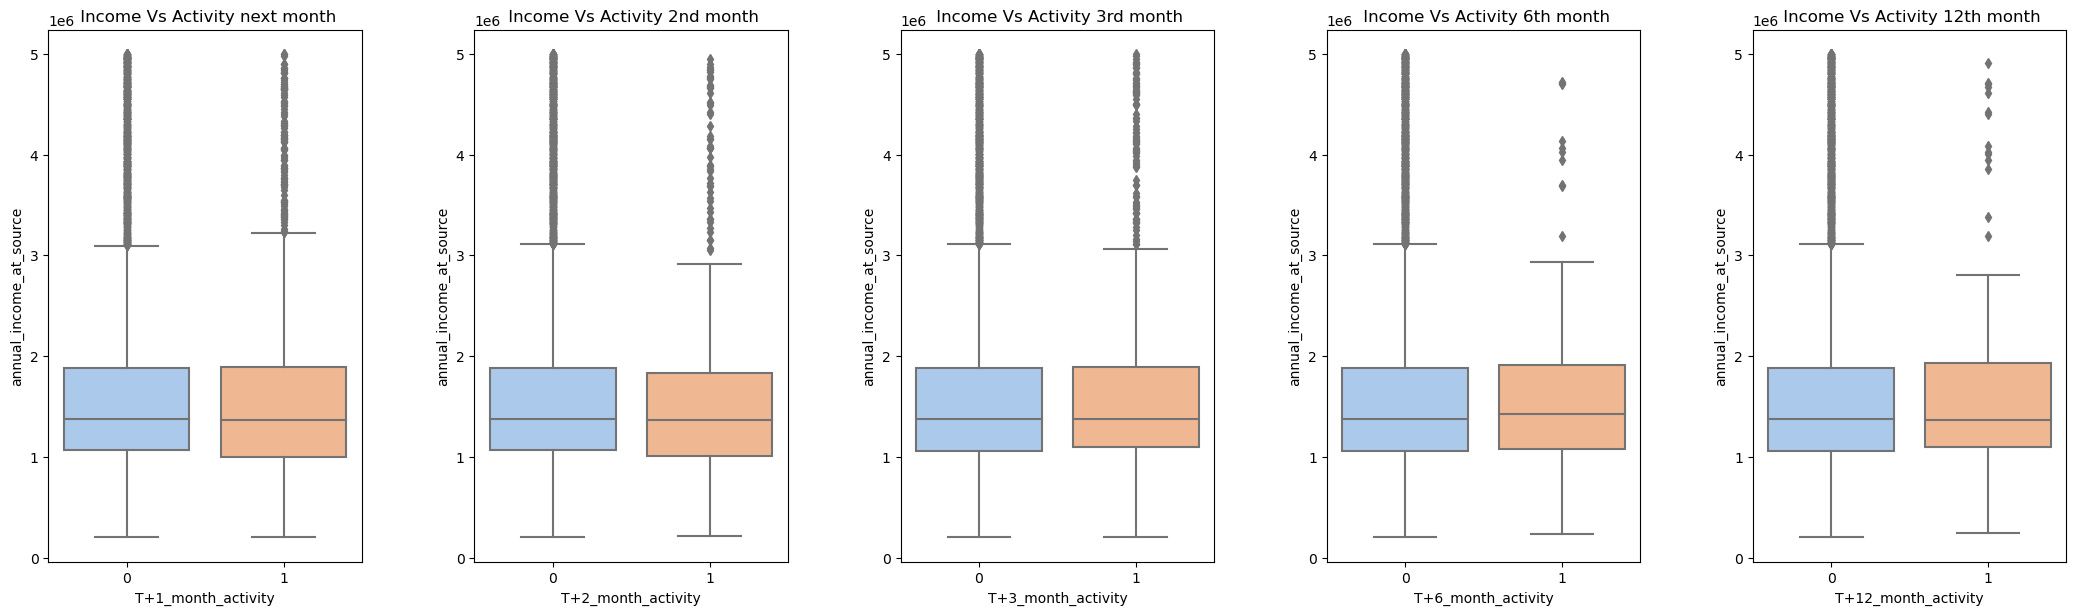

In [164]:
fig, ax = plt.subplots(1,5)
fig.set_size_inches(22,7)
fig.tight_layout(pad=5.0)
sns.boxplot(data=df, x="T+1_month_activity", y="annual_income_at_source",ax=ax[0],palette='pastel').set(title=' Income Vs Activity next month')
sns.boxplot(data=df, x="T+2_month_activity", y="annual_income_at_source",ax=ax[1],palette='pastel').set(title=' Income Vs Activity 2nd month')
sns.boxplot(data=df, x="T+3_month_activity", y="annual_income_at_source",ax=ax[2],palette='pastel').set(title=' Income Vs Activity 3rd month')
sns.boxplot(data=df, x="T+6_month_activity", y="annual_income_at_source",ax=ax[3],palette='pastel').set(title=' Income Vs Activity 6th month')
sns.boxplot(data=df, x="T+12_month_activity", y="annual_income_at_source",ax=ax[4],palette='pastel').set(title=' Income Vs Activity 12th month')

[Text(0.5, 1.0, ' Income Vs CC actvity last 90 days')]

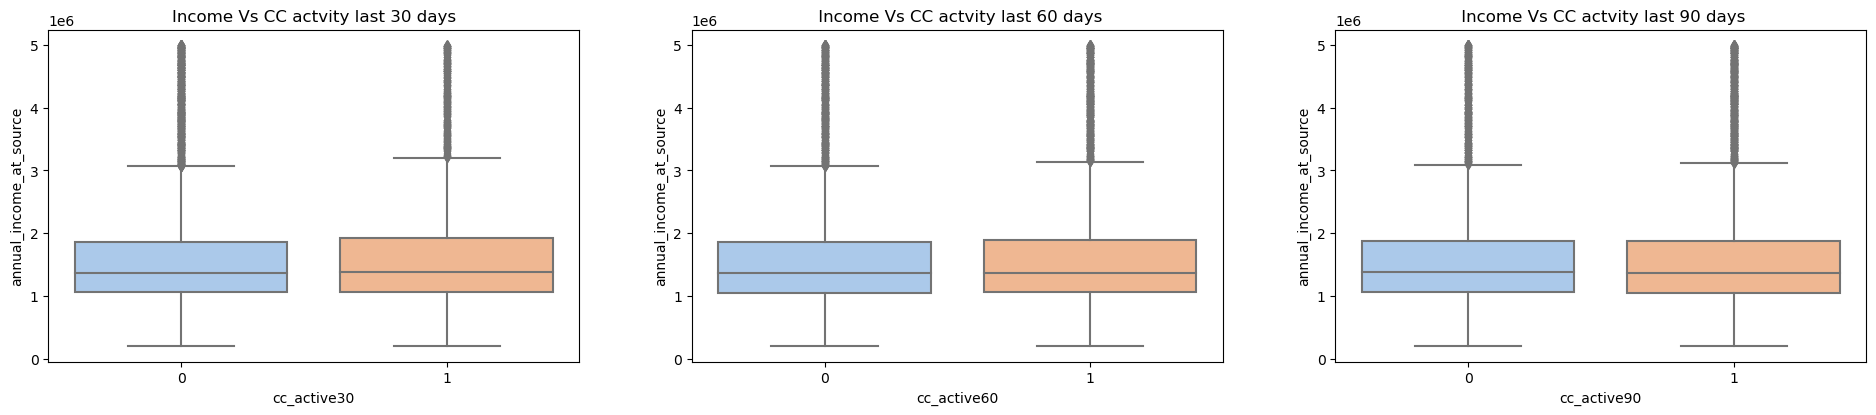

In [176]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.tight_layout(pad=5.0)
sns.boxplot(data=df, x= "cc_active30", y="annual_income_at_source",ax=ax[0],palette='pastel').set(title='Income Vs CC actvity last 30 days')
sns.boxplot(data=df, x= "cc_active60", y="annual_income_at_source",ax=ax[1],palette='pastel').set(title=' Income Vs CC actvity last 60 days')
sns.boxplot(data=df, x= "cc_active90", y="annual_income_at_source",ax=ax[2],palette='pastel').set(title=' Income Vs CC actvity last 90 days')

[Text(0.5, 1.0, 'Credit Card Limit Vs Activity 12th month')]

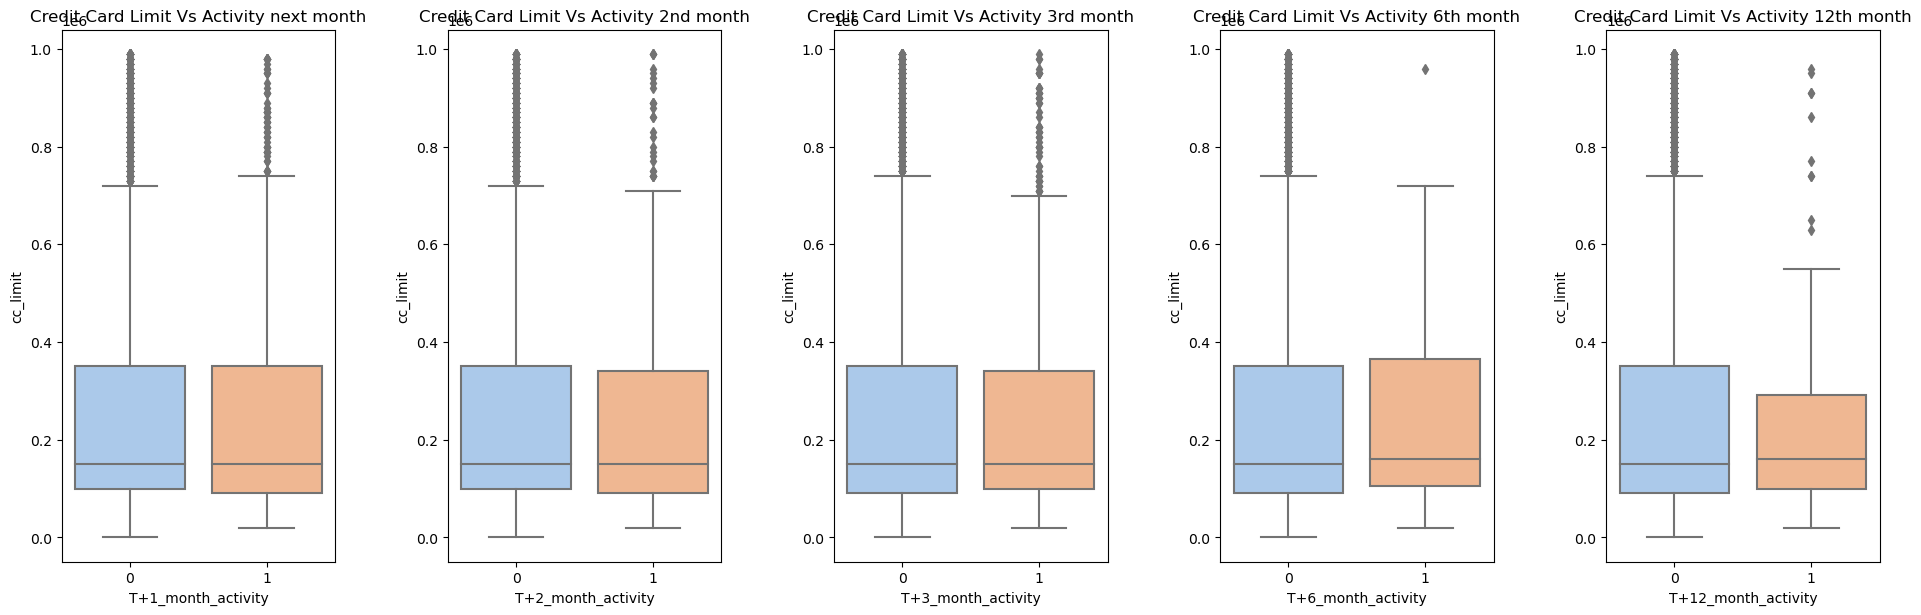

In [166]:
fig, ax = plt.subplots(1,5)
fig.set_size_inches(20,7)
fig.tight_layout(pad=5.0)
sns.boxplot(data=df, x="T+1_month_activity", y="cc_limit",ax=ax[0],palette='pastel').set(title='Credit Card Limit Vs Activity next month')
sns.boxplot(data=df, x="T+2_month_activity", y="cc_limit",ax=ax[1],palette='pastel').set(title='Credit Card Limit Vs Activity 2nd month')
sns.boxplot(data=df, x="T+3_month_activity", y="cc_limit",ax=ax[2],palette='pastel').set(title='Credit Card Limit Vs Activity 3rd month')
sns.boxplot(data=df, x="T+6_month_activity", y="cc_limit",ax=ax[3],palette='pastel').set(title='Credit Card Limit Vs Activity 6th month')
sns.boxplot(data=df, x="T+12_month_activity", y="cc_limit",ax=ax[4],palette='pastel').set(title='Credit Card Limit Vs Activity 12th month')

[Text(0.5, 1.0, 'Credit Card Limit Vs CC actvity last 90 days')]

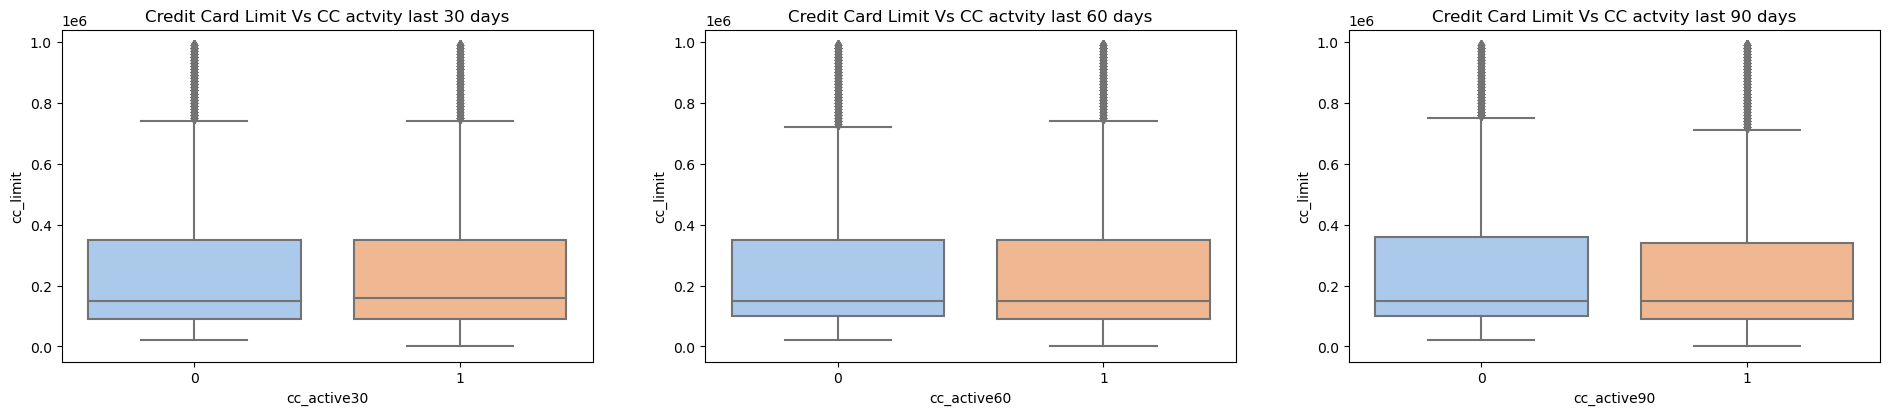

In [167]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.tight_layout(pad=5.0)
sns.boxplot(data=df, x= "cc_active30", y="cc_limit",ax=ax[0],palette='pastel').set(title='Credit Card Limit Vs CC actvity last 30 days')
sns.boxplot(data=df, x= "cc_active60", y="cc_limit",ax=ax[1],palette='pastel').set(title='Credit Card Limit Vs CC actvity last 60 days')
sns.boxplot(data=df, x= "cc_active90", y="cc_limit",ax=ax[2],palette='pastel').set(title='Credit Card Limit Vs CC actvity last 90 days')

[Text(0.5, 1.0, ' Occupation Vs Activity 12th month')]

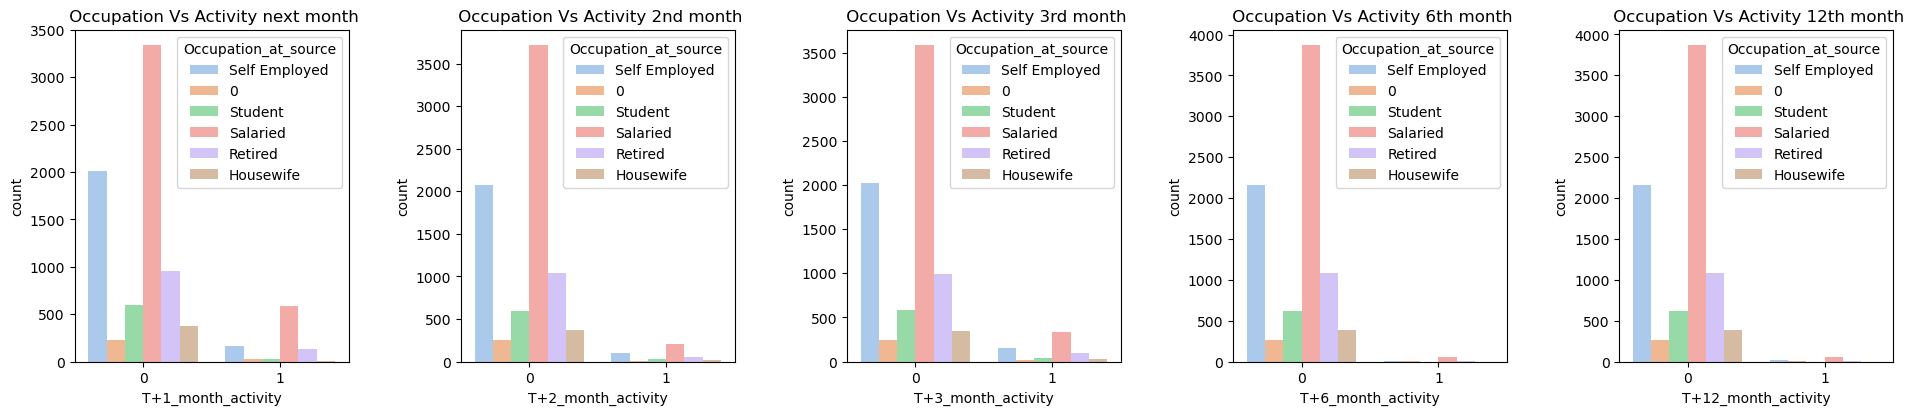

In [168]:
fig, ax = plt.subplots(1,5)
fig.set_size_inches(20,5)
fig.tight_layout(pad=5.0)
sns.countplot(data=df, x="T+1_month_activity", hue="Occupation_at_source",ax=ax[0],palette='pastel').set(title=' Occupation Vs Activity next month')
sns.countplot(data=df, x="T+2_month_activity", hue="Occupation_at_source",ax=ax[1],palette='pastel').set(title=' Occupation Vs Activity 2nd month')
sns.countplot(data=df, x="T+3_month_activity", hue="Occupation_at_source",ax=ax[2],palette='pastel').set(title=' Occupation Vs Activity 3rd month')
sns.countplot(data=df, x="T+6_month_activity", hue="Occupation_at_source",ax=ax[3],palette='pastel').set(title=' Occupation Vs Activity 6th month')
sns.countplot(data=df, x="T+12_month_activity",hue="Occupation_at_source",ax=ax[4],palette='pastel').set(title=' Occupation Vs Activity 12th month')

[Text(0.5, 1.0, 'Occupation Vs CC actvity last 90 days')]

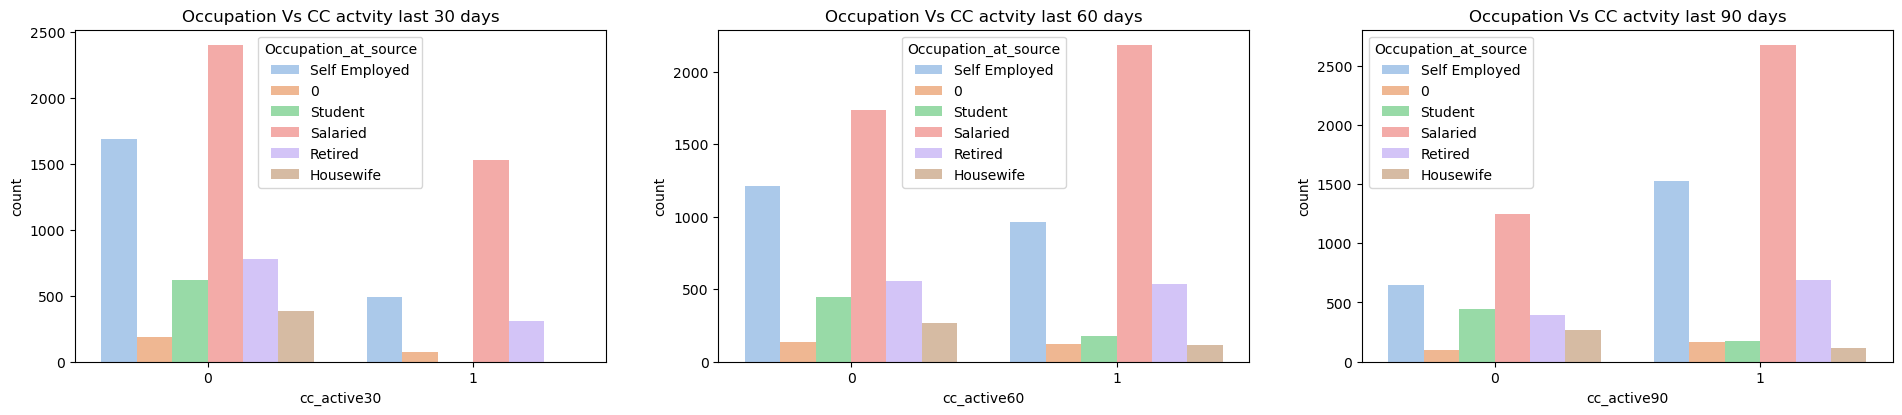

In [169]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.tight_layout(pad=5.0)
sns.countplot(data=df, x= "cc_active30", hue="Occupation_at_source",ax=ax[0],palette='pastel').set(title='Occupation Vs CC actvity last 30 days')
sns.countplot(data=df, x= "cc_active60", hue="Occupation_at_source",ax=ax[1],palette='pastel').set(title='Occupation Vs CC actvity last 60 days')
sns.countplot(data=df, x= "cc_active90", hue="Occupation_at_source",ax=ax[2],palette='pastel').set(title='Occupation Vs CC actvity last 90 days')

[Text(0.5, 1.0, 'Networth Vs Activity 12th month')]

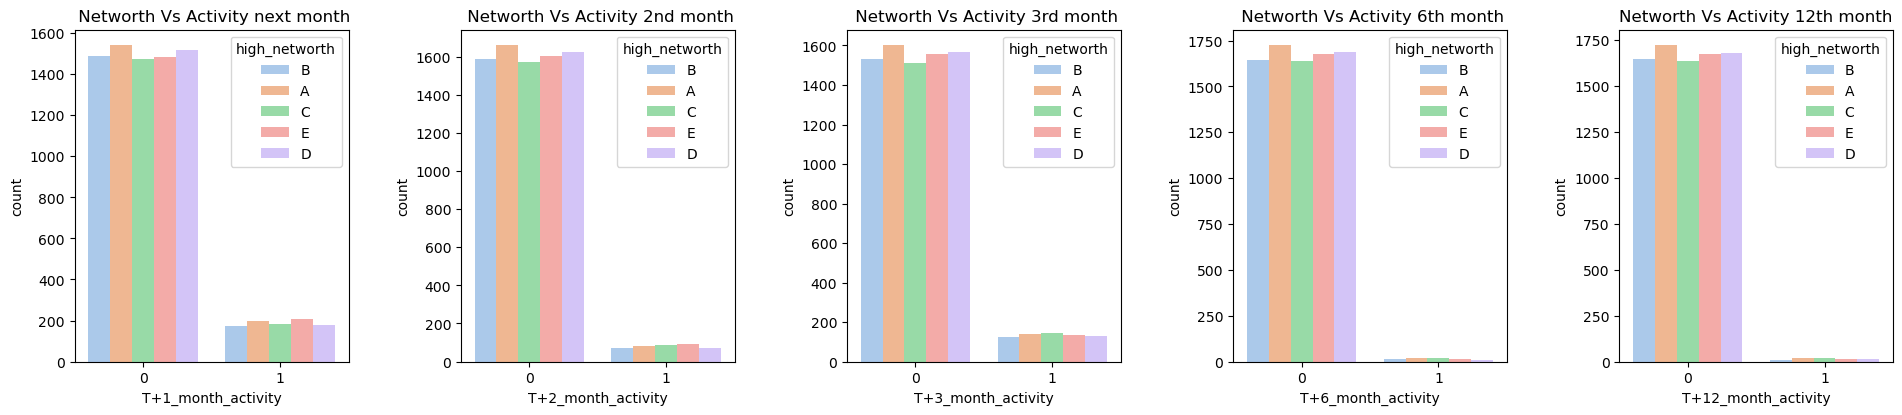

In [170]:
fig, ax = plt.subplots(1,5)
fig.set_size_inches(20,5)
fig.tight_layout(pad=5.0)
sns.countplot(data=df, x="T+1_month_activity", hue="high_networth",ax=ax[0],palette='pastel').set(title=' Networth Vs Activity next month')
sns.countplot(data=df, x="T+2_month_activity", hue="high_networth",ax=ax[1],palette='pastel').set(title=' Networth Vs Activity 2nd month')
sns.countplot(data=df, x="T+3_month_activity", hue="high_networth",ax=ax[2],palette='pastel').set(title=' Networth Vs Activity 3rd month')
sns.countplot(data=df, x="T+6_month_activity", hue="high_networth",ax=ax[3],palette='pastel').set(title=' Networth Vs Activity 6th month')
sns.countplot(data=df, x="T+12_month_activity",hue="high_networth",ax=ax[4],palette='pastel').set(title='Networth Vs Activity 12th month')

[Text(0.5, 1.0, 'Net worth Vs CC actvity last 30 days')]

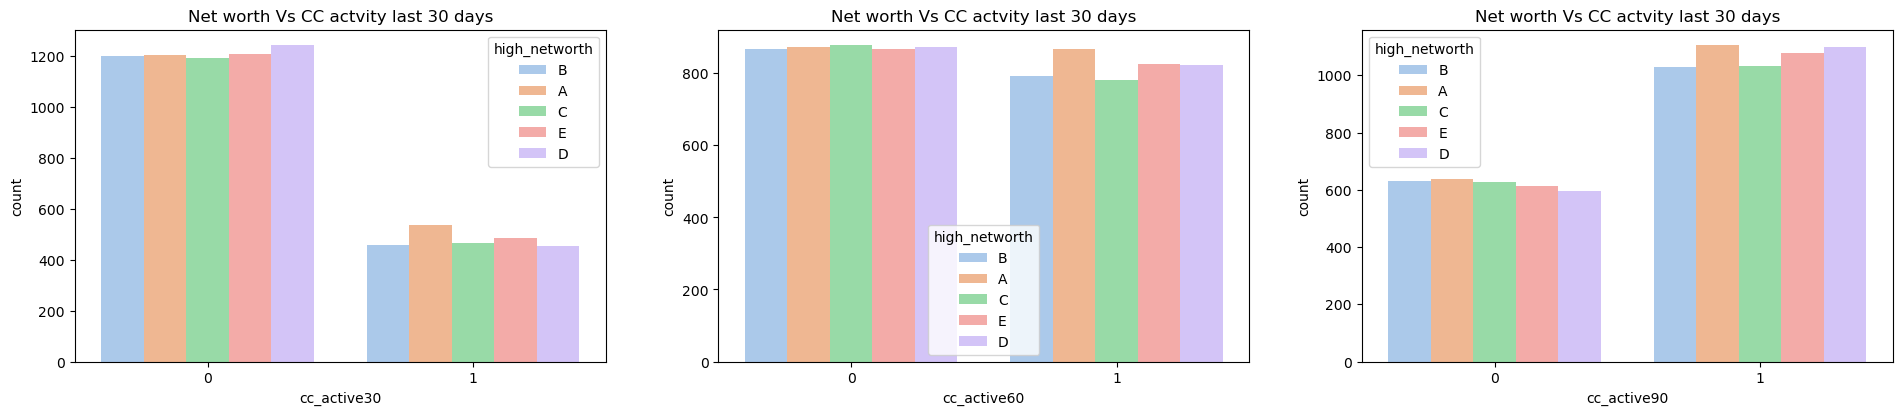

In [171]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.tight_layout(pad=5.0)
sns.countplot(data=df, x= "cc_active30", hue="high_networth",ax=ax[0],palette='pastel').set(title='Net worth Vs CC actvity last 30 days')
sns.countplot(data=df, x= "cc_active60", hue="high_networth",ax=ax[1],palette='pastel').set(title='Net worth Vs CC actvity last 30 days')
sns.countplot(data=df, x= "cc_active90", hue="high_networth",ax=ax[2],palette='pastel').set(title='Net worth Vs CC actvity last 30 days')

[Text(0.5, 1.0, ' Card Type Vs Activity 12th month')]

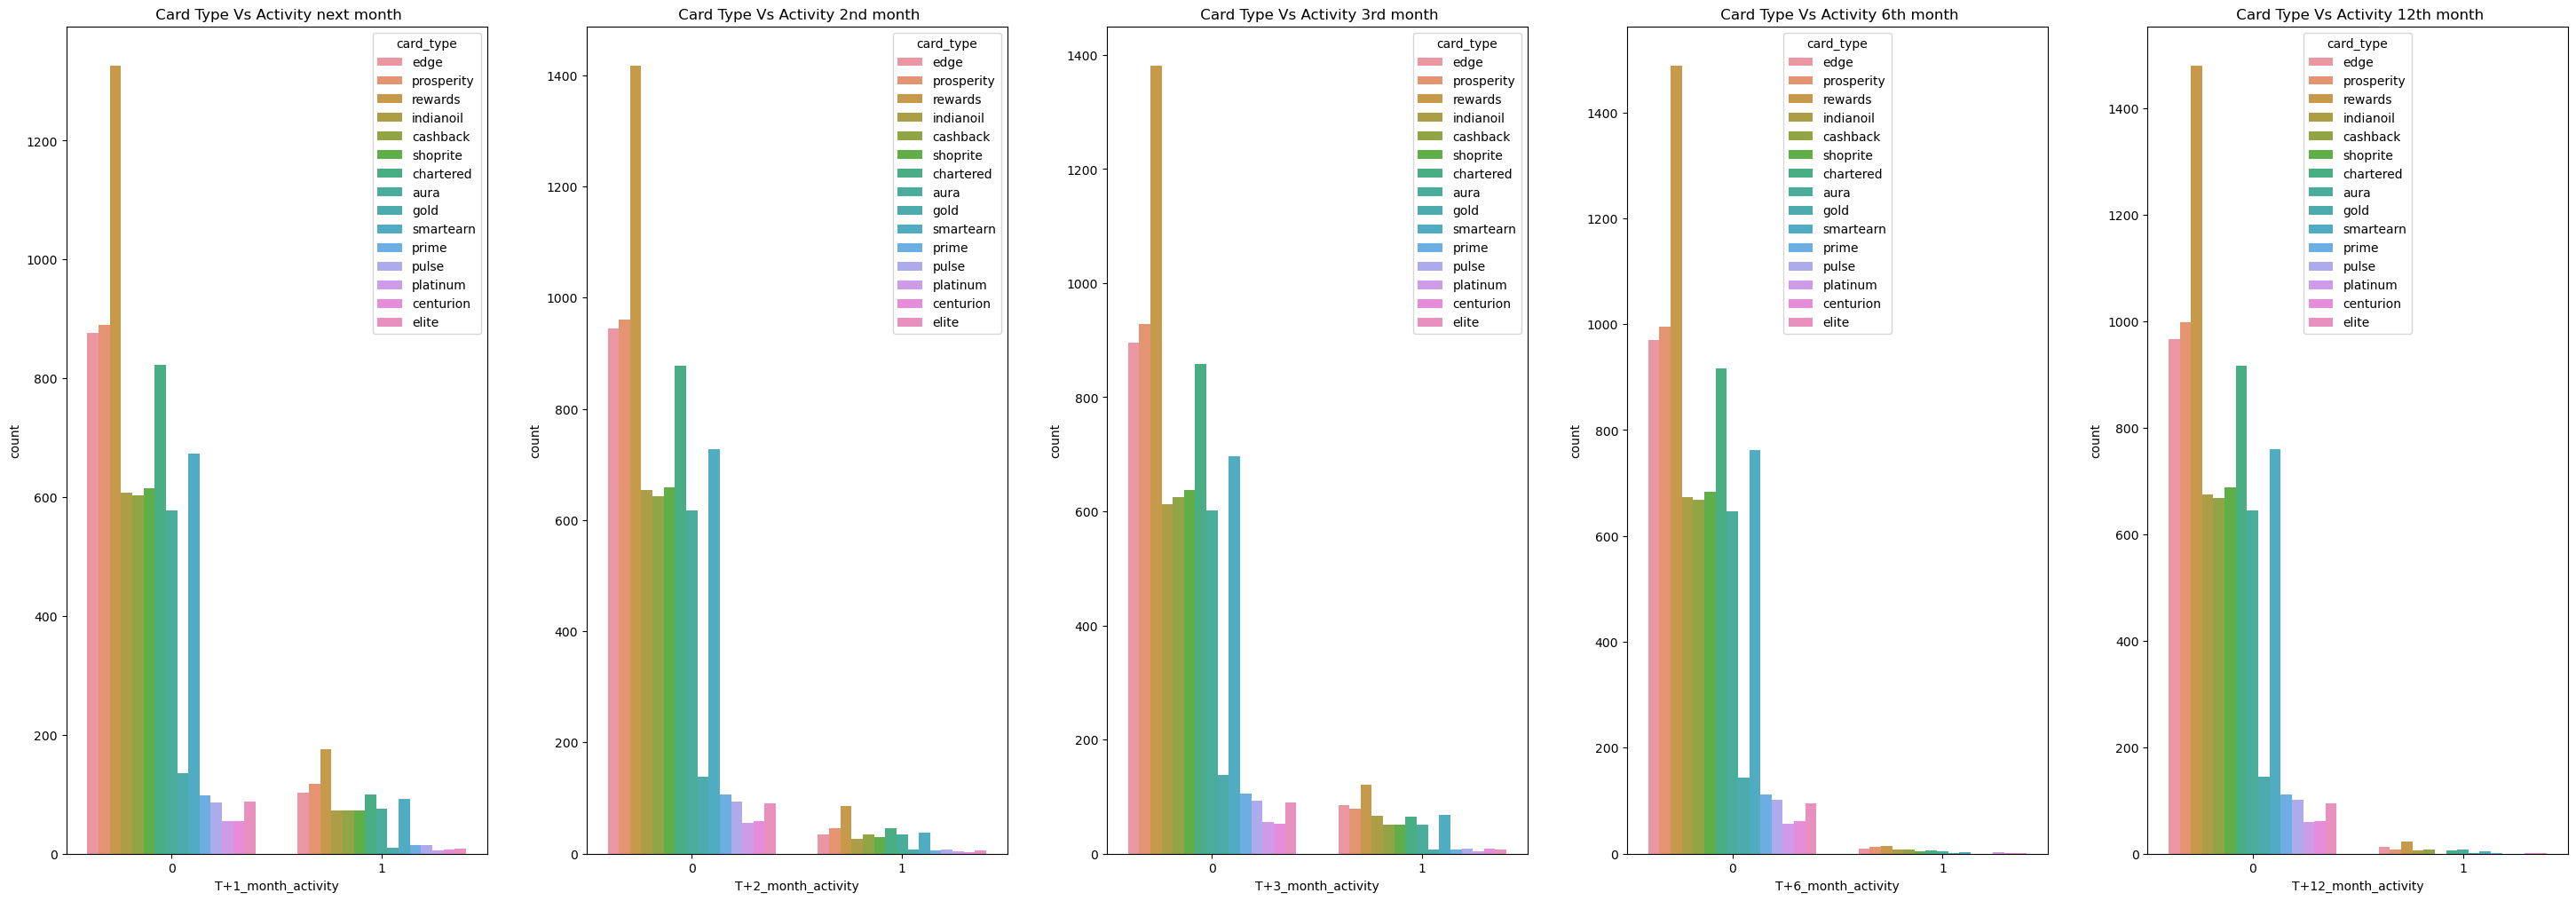

In [172]:
fig, ax = plt.subplots(1,5)
fig.set_size_inches(30,11)
fig.tight_layout(pad=5.0)
sns.countplot(data=df, x="T+1_month_activity", hue="card_type",ax=ax[0]).set(title=' Card Type Vs Activity next month')
sns.countplot(data=df, x="T+2_month_activity", hue="card_type",ax=ax[1]).set(title=' Card Type Vs Activity 2nd month')
sns.countplot(data=df, x="T+3_month_activity", hue="card_type",ax=ax[2]).set(title=' Card Type Vs Activity 3rd month')
sns.countplot(data=df, x="T+6_month_activity", hue="card_type",ax=ax[3]).set(title=' Card Type Vs Activity 6th month')
sns.countplot(data=df, x="T+12_month_activity",hue="card_type",ax=ax[4]).set(title=' Card Type Vs Activity 12th month')

[Text(0.5, 1.0, 'Card Type Vs CC actvity last 30 days')]

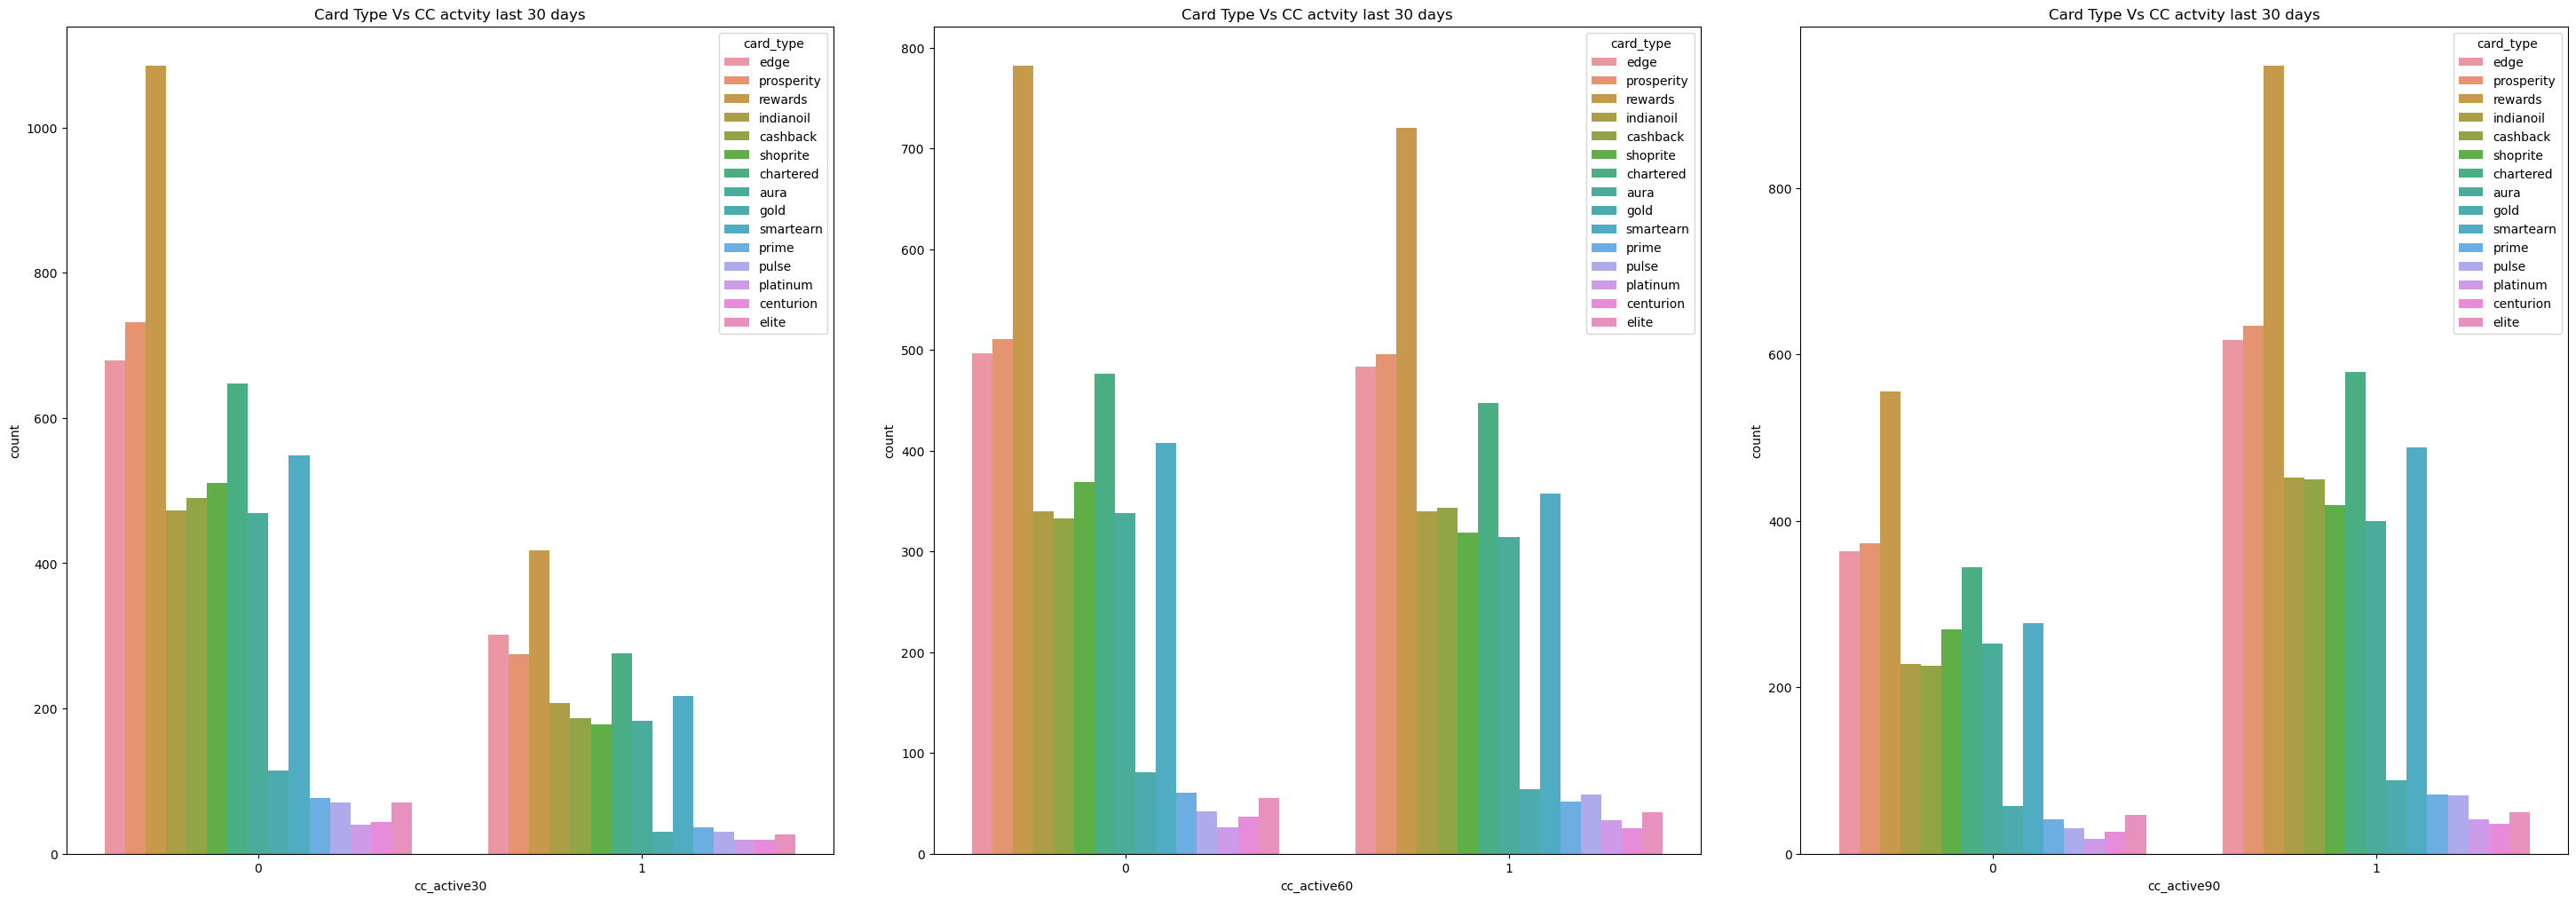

In [173]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(30,11)
fig.tight_layout(pad=5.0)
sns.countplot(data=df, x= "cc_active30", hue="card_type",ax=ax[0]).set(title='Card Type Vs CC actvity last 30 days')
sns.countplot(data=df, x= "cc_active60", hue="card_type",ax=ax[1]).set(title='Card Type Vs CC actvity last 30 days')
sns.countplot(data=df, x= "cc_active90", hue="card_type",ax=ax[2]).set(title='Card Type Vs CC actvity last 30 days')

[Text(0.5, 1.0, ' Transactor_revolver Vs Activity 12th month')]

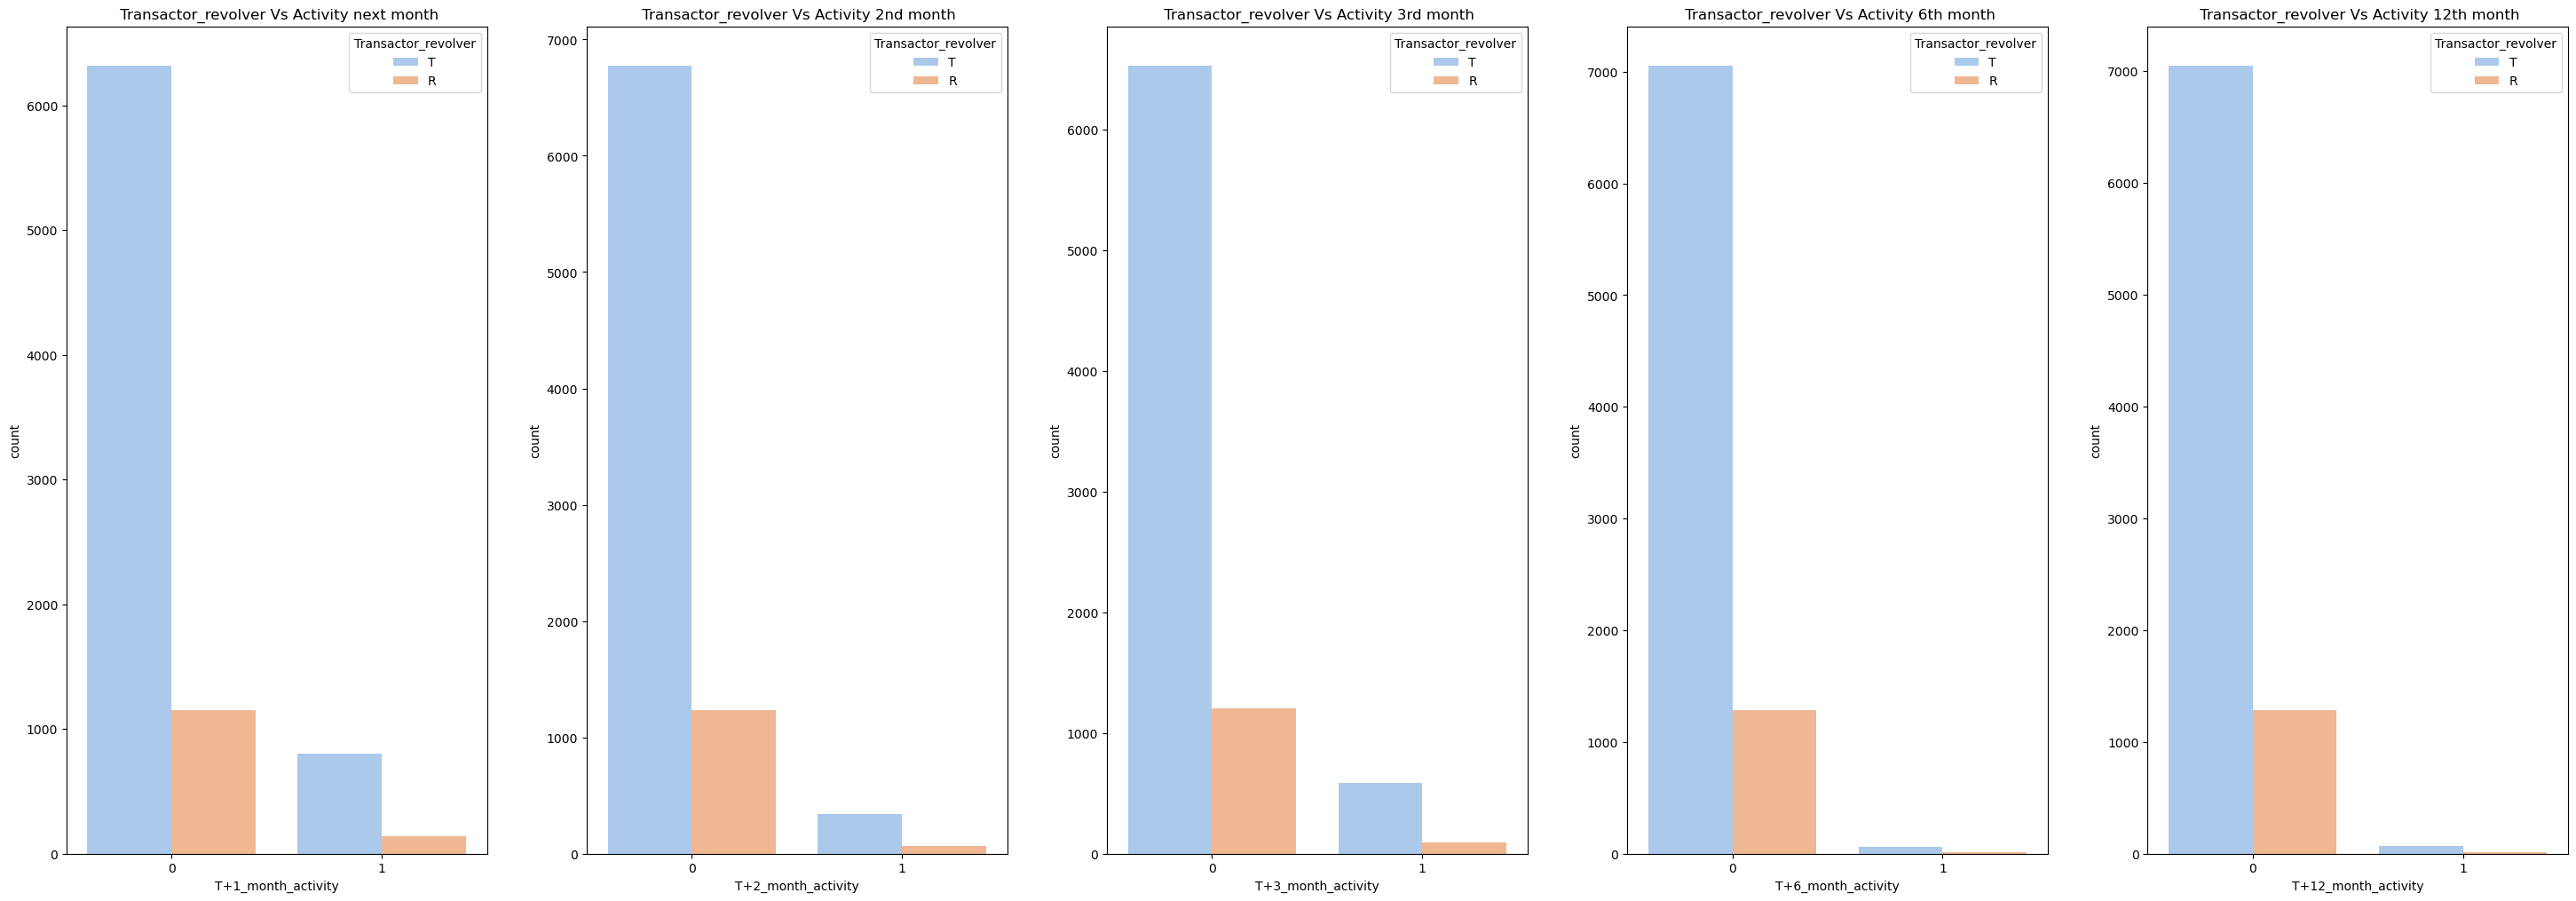

In [174]:
fig, ax = plt.subplots(1,5)
fig.set_size_inches(30,11)
fig.tight_layout(pad=5.0)
sns.countplot(data=df, x="T+1_month_activity", hue="Transactor_revolver",ax=ax[0],palette='pastel').set(title=' Transactor_revolver Vs Activity next month')
sns.countplot(data=df, x="T+2_month_activity", hue="Transactor_revolver",ax=ax[1],palette='pastel').set(title=' Transactor_revolver Vs Activity 2nd month')
sns.countplot(data=df, x="T+3_month_activity", hue="Transactor_revolver",ax=ax[2],palette='pastel').set(title=' Transactor_revolver Vs Activity 3rd month')
sns.countplot(data=df, x="T+6_month_activity", hue="Transactor_revolver",ax=ax[3],palette='pastel').set(title=' Transactor_revolver Vs Activity 6th month')
sns.countplot(data=df, x="T+12_month_activity",hue="Transactor_revolver",ax=ax[4],palette='pastel').set(title=' Transactor_revolver Vs Activity 12th month')

<AxesSubplot:xlabel='cc_active90', ylabel='count'>

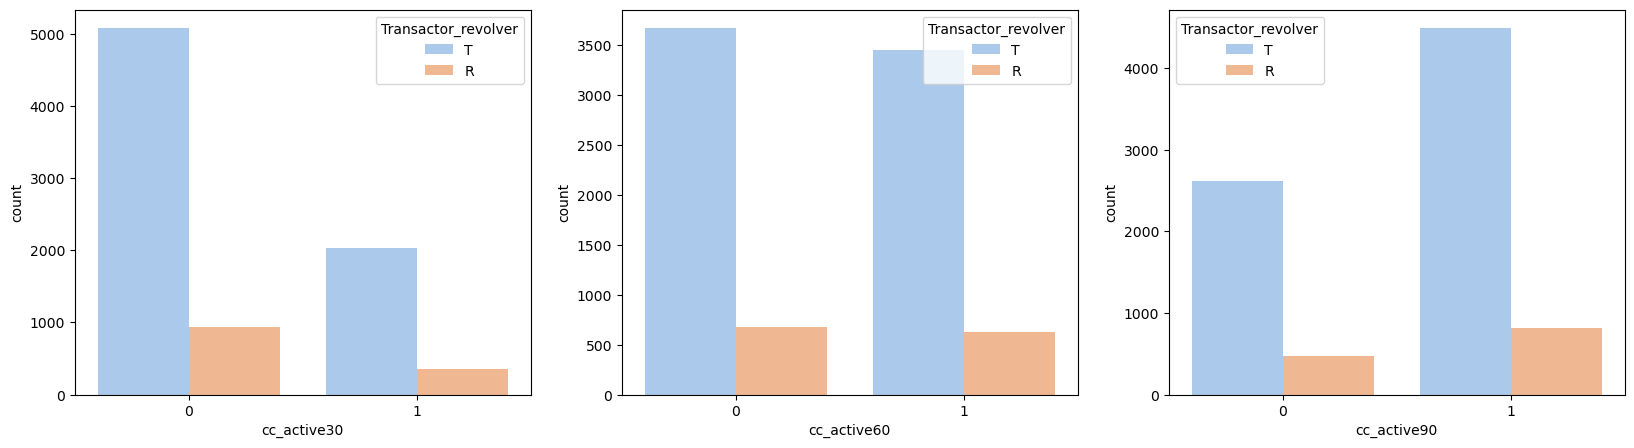

In [175]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
sns.countplot(data=df, hue="Transactor_revolver", x="cc_active30",ax=ax[0],palette='pastel')
sns.countplot(data=df, hue="Transactor_revolver", x="cc_active60",ax=ax[1],palette='pastel')
sns.countplot(data=df, hue="Transactor_revolver", x="cc_active90",ax=ax[2],palette='pastel')

###### Multi Variate Analysis

In [340]:
df.groupby('Occupation_at_source')[['cc_limit','avg_spends_l3m']].mean()

cc_limit  avg_spends_l3m
Occupation_at_source                               
0                     750881.226054   102053.823755
Housewife              95104.166667    27425.973958
Retired                95959.595960    28574.860422
Salaried              236510.974987    48890.819551
Self Employed         321816.091954    58797.316322
Student               262190.016103    49409.251208

In [341]:
df.groupby('card_type')[['cc_limit','avg_spends_l3m']].mean()

cc_limit  avg_spends_l3m
card_type                                
aura        106411.042945    31580.196319
cashback    106094.674556    30049.690828
centurion   421612.903226    82440.564516
chartered   466283.856988    77330.923077
edge        468806.122449    78981.873469
elite       463854.166667    76668.229167
gold        245517.241379    46164.641379
indianoil   108161.764706    32356.322059
platinum    439661.016949    73599.711864
prime       446517.857143    80403.357143
prosperity  465660.377358    75789.428004
pulse       472475.247525    69031.188119
rewards     111517.976032    31516.928096
shoprite    107732.558140    30667.816860
smartearn   106509.803922    29384.892810

[Text(0.5, 1.0, 'Transactor vs Average spends Vs Credit Card Limit')]

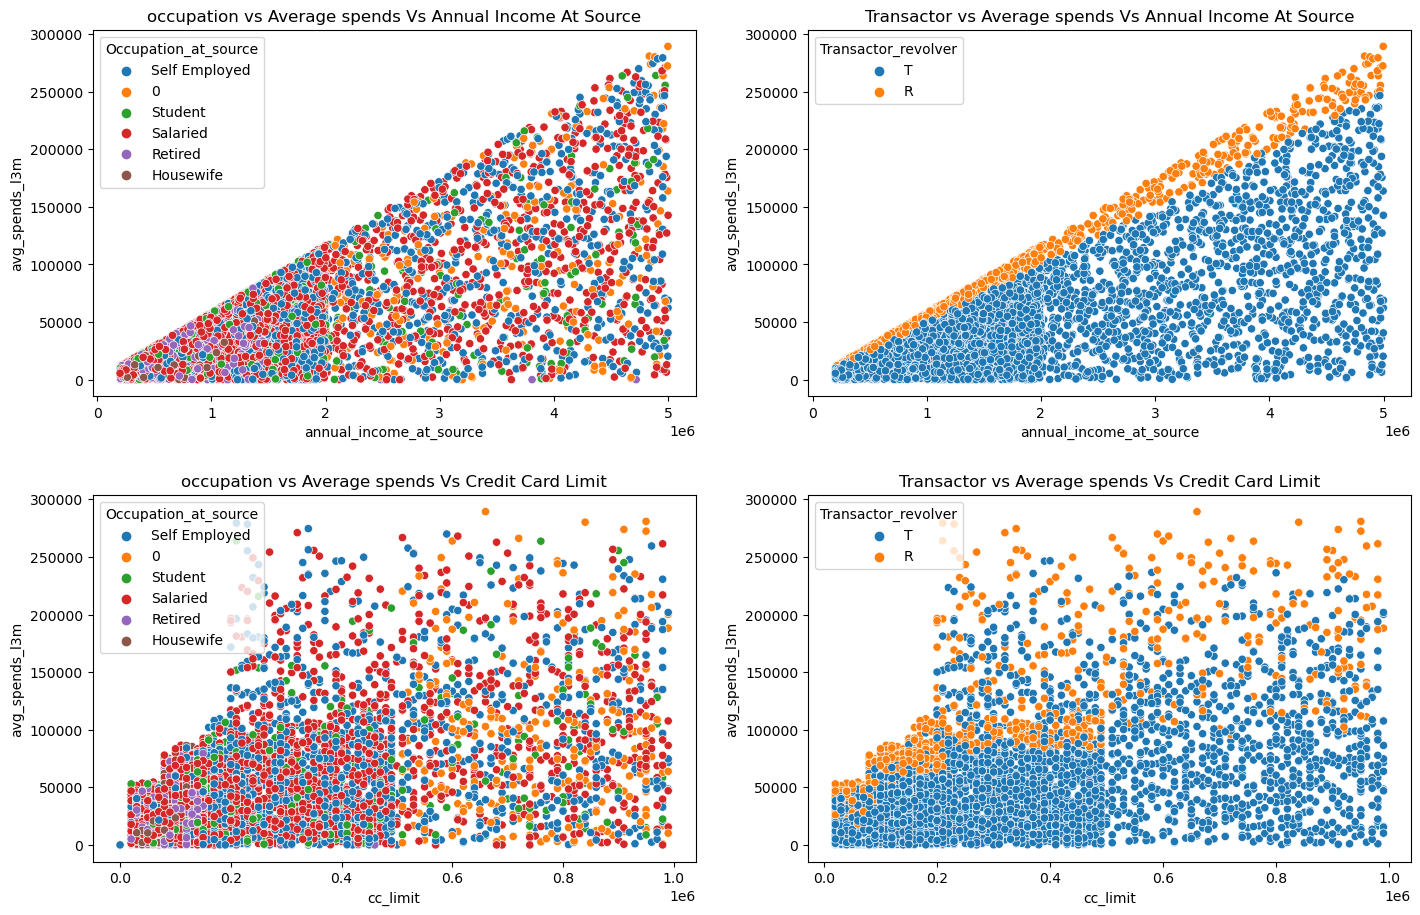

In [338]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,10)
fig.tight_layout(pad=5.0);
sns.scatterplot(data=df,x='annual_income_at_source',y='avg_spends_l3m',hue='Occupation_at_source',ax=ax[0][0]).set(title='occupation vs Average spends Vs Annual Income At Source')
sns.scatterplot(data=df,x='annual_income_at_source',y='avg_spends_l3m',hue='Transactor_revolver',ax=ax[0][1]).set(title='Transactor vs Average spends Vs Annual Income At Source')
sns.scatterplot(data=df,x='cc_limit',y='avg_spends_l3m',hue='Occupation_at_source',ax=ax[1][0]).set(title='occupation vs Average spends Vs Credit Card Limit')
sns.scatterplot(data=df,x='cc_limit',y='avg_spends_l3m',hue='Transactor_revolver',ax=ax[1][1]).set(title='Transactor vs Average spends Vs Credit Card Limit')

[Text(0.5, 1.0, 'Card type vs Average spends Vs Credit Card Limit')]

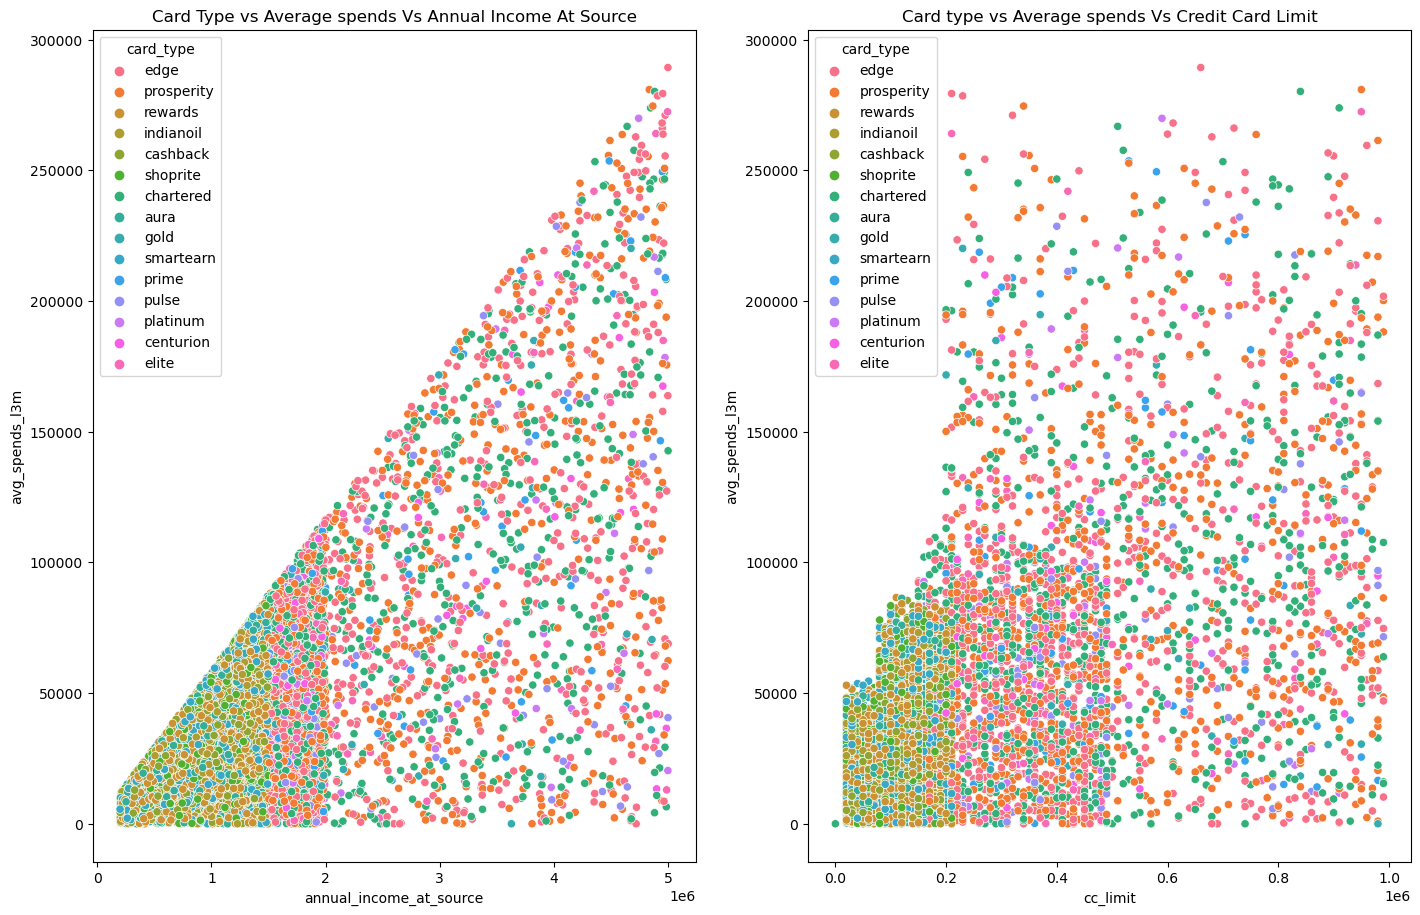

In [339]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,10)
fig.tight_layout(pad=5.0);
sns.scatterplot(data=df,x='annual_income_at_source',y='avg_spends_l3m',hue='card_type',ax=ax[0]).set(title='Card Type vs Average spends Vs Annual Income At Source')
sns.scatterplot(data=df,x='cc_limit',y='avg_spends_l3m',hue='card_type',ax=ax[1]).set(title='Card type vs Average spends Vs Credit Card Limit')
